<a href="https://colab.research.google.com/github/reduquette/babbling_language_id/blob/master/feature_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Installations

In [ ]:
!pip install disvoice_glottal
!pip install phonet
!pip install pysptk
!pip install kaldi_io



     |████████████████████████████████| 8.1MB 8.8MB/s 
     |████████████████████████████████| 419kB 40.2MB/s 
  Created wheel for phonet: filename=phonet-0.3.6-cp36-none-any.whl size=8085074 sha256=87491367c2c92238635d93c96d1085d6ae24b5c58a25be32158dee4248542a0d
  Stored in directory: /root/.cache/pip/wheels/b0/a9/9a/443785305c067f9555b2629925c96c6b9d8a16639fe761d5f0
  Created wheel for pysptk: filename=pysptk-0.1.18-cp36-cp36m-linux_x86_64.whl size=950133 sha256=196c88665f31850ba5c40f73c6dcad209c8486bcb6b5ee34f3e108b166fc5f59
  Stored in directory: /root/.cache/pip/wheels/c7/96/d2/a163240019c59504402fab713af259026af81a99dea943404a
  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=0354521e7be46fd6e4ec4eb0e796ae5f7912872ffa35a0ffad5f91fc3c43906a
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built phonet pysptk python-speech-features


In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import keras 
import numpy as np 
from keras import models, layers
import tensorflow as tf
import librosa 
import matplotlib.pyplot as plt
import wave
import sys
import os
import librosa.display
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from sklearn.model_selection import train_test_split


Mounted at /content/drive


## Testing the glottal import 
matrix is formed with 36 features formed with (9 descriptors) x (4 functionals: mean, std, skewness, kurtosis)


In [ ]:
from disvoice_glottal.glottal import Glottal

################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [ ]:
glottal=Glottal()
file_audio = '/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2930408_2932503.wav'

# You have to say fmt="npy" and you need to set static to False
features=glottal.extract_features_file(file_audio, static=False, plots=False, fmt="npy")
print(features.shape)
print(features.flatten())

(19, 9)
[ 5.74410996e-03  1.25697075e-03  9.03574582e-04  6.46673073e-01
  1.63249480e+00  3.33930612e+00  5.31265371e+00 -2.55139371e+01
  6.39311642e+01  4.83702827e-03  1.01055839e-03  1.02019598e-03
  1.79368312e-01  1.59505382e-01  5.02241550e+00  6.00499758e+00
 -2.21436021e+01  6.69401796e+01  1.43082458e-02  4.48991460e-03
  3.87667803e-03  1.43063167e-01  1.11857095e-01  1.83508394e+00
  7.05196786e+00 -1.21124916e+02  6.56921046e+02  1.71462010e-03
  3.11705510e-03  1.53969327e-03  3.64382555e-01  1.50928392e-01
  2.51002339e+00  1.29069934e+01  1.19621704e+01  3.83986160e+02
  1.38725361e-04  6.82645544e-03  3.92943225e-03  3.59758015e-01
  1.47823280e-01 -3.77029577e-01  1.34778767e+01 -1.26425320e+00
  6.19502703e+01  1.01785072e-04  3.36884382e-03  1.32748868e-03
  1.94048704e-01  5.04150226e-02 -3.54869775e+00  1.48808941e+01
 -1.36269746e+01  1.33952832e+02  1.80069488e-04  3.85438546e-03
  2.10606869e-03  2.32368969e-01  1.12883778e-01 -4.37585025e+00
  1.33614069e+01 

# Testing Prosody Features

> Following same procedure as Glottal



In [ ]:
!pip install disvoice_prosody

In [ ]:
from disvoice_prosody.prosody import Prosody
prosody=Prosody()

In [ ]:
file_audio = '/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2930408_2932503.wav'

# Copied the setup from the glottal feature extraction
prFeatures=prosody.extract_features_file(file_audio, static=False, plots=False, fmt="npy")
print(prFeatures.shape)
print(prFeatures.flatten())

(4, 13)
[ 2.20000000e-01 -5.46238674e-04  3.31361382e-02 -6.92326212e-01
  5.66254874e+00 -1.36119049e+01  2.31733554e+02  1.10413311e-04
 -7.31196696e-03  1.57133665e-01 -1.29972621e+00  4.33570118e+00
 -3.09499647e+01  8.20000000e-01 -1.14627803e-07  2.08096862e-05
 -1.38392160e-03  6.20856429e-02 -2.36547878e+00  2.24871820e+02
  8.10894472e-09 -6.34455734e-06  9.21288770e-04 -4.66714362e-02
  6.19657413e-01 -1.07875204e+01  8.00000000e-02  2.75666115e-02
 -5.67666807e-01  3.76755287e+00 -7.67837047e+00 -2.05532849e+00
  1.90291806e+02  3.73547064e-03 -9.99375036e-02  6.07891735e-01
 -1.33039079e+00 -4.70468623e-02 -1.76789285e+01  6.00000000e-02
  6.43793742e-02 -9.82067744e-01  5.09233475e+00 -1.01138414e+01
  1.15185674e+00  2.01014267e+02  7.61638169e-03 -1.79296260e-02
 -1.44476324e-01 -1.60899750e-01  6.42353080e-01 -6.92660066e+00]


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


# Testing Phonological Features

In [ ]:
!pip install disvoice_phonological

In [ ]:
from disvoice_phonological.phonological import Phonological
phono=Phonological()

In [ ]:
file_audio = '/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2930408_2932503.wav'

# Copied the setup from the glottal feature extraction
phFeatures=phono.extract_features_file(file_audio, static=False, plots=False, fmt="npy")
print(phFeatures.shape)
print(phFeatures.flatten())

(208, 18)
(208, 18)
[ 0.17673934  0.21217967  0.59177245 ... -0.1289537   0.54255223
  4.64292454]


In [ ]:
glottal=Glottal()
file_audio = '/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_92741_92994.wav'
features=glottal.extract_features_file(file_audio, static=False, plots=True, fmt="npy")
print('Brents features:',features)

file_audio = '/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_92741_92994.wav'
features=glottal.extract_features_file(file_audio, static=False, plots=False, fmt="npy")

file_audio = '/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav'
#features=glottal.extract_features_file(file_audio, 'static', plots=True, fmt="numpy")


#1D array
featuretarget = np.empty(tuple([300]))
#This will be a 2D array. Each row represents a kid
glottalfeatures = np.empty(tuple([15,300]))

train_audio_path = '/content/drive/My Drive/NLP Final'
f = 'MP4_Lyon_Marie_10023b_371915_376273.wav'
featuretarget = np.append(featuretarget,'F')
file_audio= train_audio_path + '/smallfrench/' + f 
print(file_audio)
features1= glottal.extract_features_file(file_audio, static=False, plots=True, fmt="npy")
print('Maries features: ',features1)
#glottalfeatures = np.append(glottalfeatures, features1)

#print(glottalfeatures) 

# Spectrograms

samples [-0.02442905 -0.0368249  -0.02620145 ... -0.03050421 -0.0366254
 -0.03785028]
sample rate 22050


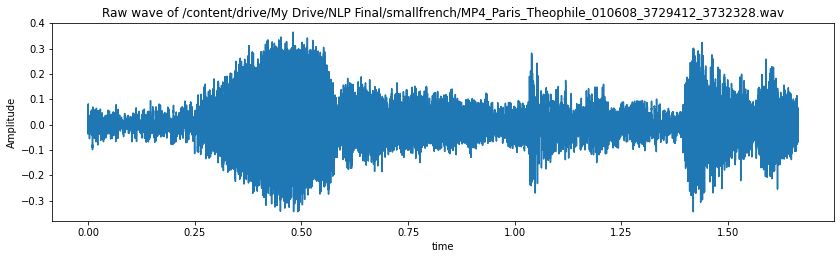

In [ ]:
#test opening and plotting a file 
train_audio_path = '/content/drive/My Drive/NLP Final/'

# Use Librosa to read in the wav file.
# samples, sample_rate = librosa.load(train_audio_path+ 'smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav', sr = 16000)
samples, sample_rate = librosa.load(train_audio_path+ 'smallfrench/MP4_Paris_Theophile_010608_2688038_2689702.wav')

print('samples', samples)
print('sample rate', sample_rate)

# Plot the wav file.
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path + 'smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)

Text(0.5, 1.0, 'Mel spectrogram')

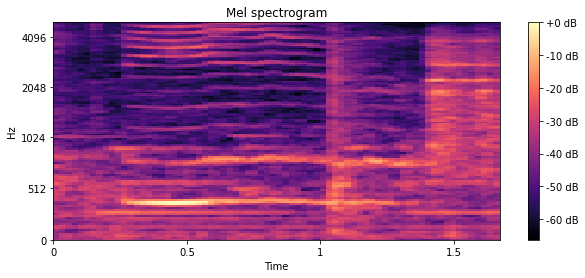

In [ ]:
### Test with one file
spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
audio_len = len(samples) / sample_rate

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectro, ref=np.max), y_axis='mel', fmax=5000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

# plt.figure(figsize=(3.841, 7.195), dpi=100)
# ( your code ...)
# plt.savefig('myfig.png', dpi=1000)
#need to save spectrograms with appropriate resolution

In [ ]:
#SPLITTING THESE UP INTO SEPARATE GROUPS SO WE SEPARATELY RUN INIT, ENGLISH, FRENCH

# FIRST WE NEED TO PAD - MAKE INPUTS SAME LENGTH
# THEN WE NEED TO MASK - BASICALLY TELL THE MODEL THAT 0s AREN'T REAL DATA
label1 = 'smallenglish'
label2 =  'smallfrench'
all_wave = []
all_label = []
english_files = []
french_files = []
all_pad_spectro = []

count = 0
maxLen = 0


## ENGLISH
for f in os.listdir(train_audio_path + label1):
  #print(f)
  if (f.endswith('.wav')):
    #extract audio 
    samples, sample_rate = librosa.load(train_audio_path + '/' + label1 + '/' + f, sr = 16000)
    try:
      #extract spectrogram
      spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
      
      #wait until spectro is successful to add file name to list
      english_files.append(f)
      count += 1

      #pad spectrogram
      padded_spectro = tf.keras.preprocessing.sequence.pad_sequences(spectro, padding='post', maxlen = 157, dtype = 'float')

      #used to determine maximum length of our audio files: not needed to run 
      # if (spectro.shape[1] > maxLen):
      #   maxLen = spectro.shape[1]

      all_pad_spectro.append(padded_spectro)
      all_wave.append(samples)
      all_label.append(label1)
    except:
      print('exception:', f)
    
    if (count%100 == 0):
      print(count)

    if (count == 1000):
      break


# print('maxLen', maxLen)


100
exception: Davis_Rebecca_010417_5154408_5157408.wav
exception: Davis_Rebecca_010404_6258893_6261893.wav
200
exception: Davis_Rebecca_010404_7795542_7796656.wav
exception: Davis_Rebecca_010327_4805068_4808068.wav
exception: Davis_Rebecca_010316_4705701_4707820.wav
300
exception: Davis_Rebecca_010327_4762670_4765670.wav
400
exception: Davis_Rebecca_010414_5172141_5173571.wav
exception: Davis_Rebecca_010414_4503874_4506874.wav
500
exception: Davis_Rebecca_010417_3509650_3512650.wav
exception: Davis_Rebecca_010327_5946521_5949521.wav
600
exception: Davis_Rebecca_010316_5647823_5650823.wav
700
exception: Davis_Rebecca_010414_2276204_2279204.wav
800
exception: Davis_Rebecca_010404_7393825_7396825.wav
900
exception: Davis_Rebecca_010327_5288232_5290999.wav
1000


In [ ]:
count = 0
maxLen2 = 0

for f in os.listdir(train_audio_path + label2):

  if (f.endswith('.wav')):
    #extract audio
    samples, sample_rate = librosa.load(train_audio_path + '/' + label2 + '/' + f, sr = 16000)
    try:
      #create spectrogram
      spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
      
      #don't add until spectro is successful
      french_files.append(f)
      count += 1

      #pad spectrograms to the longest shape
      padded_spectro = tf.keras.preprocessing.sequence.pad_sequences(spectro, padding='post', maxlen = 157, dtype = 'float')
      
      all_pad_spectro.append(padded_spectro)
      all_wave.append(samples)
      all_label.append(label2)

      if (spectro.shape[1] > maxLen2):
        maxLen2 = spectro.shape[1]
    except:
      print('exception:', f)
    if (count%100 == 0):
      print(count)
    if (count == 1000):
      break


exception: MP4_Paris_Madeleine_010005_1195702_1199748.wav
exception: MP4_Paris_Madeleine_010005_1211312_1215185.wav
exception: MP4_Paris_Madeleine_010005_2454484_2458884.wav
100
exception: MP4_Paris_Madeleine_010005_2692698_2697254.wav
exception: KernFrench_Emma_010103_1840640_1842360.wav
200
exception: MP4_Paris_Madeleine_010005_1299059_1303004.wav
300
exception: MP4_Paris_Julie_001118_2458360_2460804.wav
exception: KernFrench_Baptiste_001101_3151040_3154040.wav
exception: MP4_Paris_Julie_001118_962498_963978.wav
exception: MP4_Paris_Julie_001118_1197450_1199895.wav
400
exception: MP4_Paris_Julie_001118_1420021_1424311.wav
exception: KernFrench_Emma_010103_3022760_3023720.wav
500
exception: MP4_Paris_Julie_001118_593448_596522.wav
exception: KernFrench_Baptiste_000719_2500200_2503200.wav
exception: MP4_Paris_Julie_001118_729052_730026.wav
600
exception: MP4_Paris_Julie_001118_551192_555580.wav
exception: KernFrench_Baptiste_001101_3018280_3018960.wav
exception: KernFrench_Baptiste_001

# Extracting Features


(https://github.com/jcvasquezc/DisVoice/blob/master/notebooks_examples/glottal_features.ipynb) 

**Prosody Features: (13 features)**

**Phonological Features: (18 features/descriptors)**

**Glottal Features (9 values extracted)**

**# Now, extracting all features at same time**

**Flattening each feature array, adding to master feature array **

In [ ]:
train_audio_path = '/content/drive/My Drive/NLP Final/'

In [ ]:

labels=[]
#labels=np.append(labels, np.zeros(1000))
#labels=np.append(labels, np.ones(1000))
print(len(labels))




0


In [ ]:
label1 = 'smallenglish/'
count=0
features=[]
eng_files100=[]
eng_glottal=[]

for f in os.listdir(train_audio_path + label1):
  
  eng_files100.append(f)
  feat=[]
  if (f.endswith('.wav')):    
    path=train_audio_path+label1+f

    print(path)
    """
    try:
      glot= glottal.extract_features_file(file_audio, static=False, plots=False, fmt="npy")
      feat.append(glot.flatten())
    except:
      glot=np.zeros(10)
      feat.append(glot)
    """

    try: 
      pros=prosody.extract_features_file(path, static=False, plots=False, fmt="npy")
      feat.append(pros.flatten())
      
    except:
      print('fail')
      pros=np.zeros(18)
      feat.append(pros)
    
    try: 
      phon=phono.extract_features_file(path, static=False, plots=False, fmt="npy")
      feat.append(phon.flatten())
    except:
      phon=np.zeros(10)
      feat.append(phon)
    
  labels.append(0)
  features.append(feat)
  count+=1
  if (count%1000==1):
    print(count)
print(count)


/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010410_1769000_1771400.wav
fail
1
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_688561_689093.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_530976_532412.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_553648_556648.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3352256_3355146.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1750021_1753021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_678948_681948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1335136_1336704.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3216691_3217500.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_3292468_3295016.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_373957_375292.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1047842_1050642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1891589_1894589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_628443_630381.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2658836_2661878.wav
(303, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_7146_7704.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2991656_2992172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_225921_228067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_1699373_1702373.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1817863_1818342.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_891564_894564.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1687981_1689149.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_154503_154967.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_254435_257435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010613_2331675_2334675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(262, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1162590_1163622.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1555348_1559568.wav
(421, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_3494658_3497550.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_917836_920928.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_300034_304242.wav
(419, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1893184_1896184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1075461_1078461.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_983723_985837.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4785698_4788698.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2299250_2302250.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_1807777_1809657.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_1023715_1024971.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4209881_4211514.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823d_108062_109070.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3021622_3022563.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Goad_Julia_10517_5179_6645.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_880215_884703.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(447, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_150371_153371.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_104001_105092.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_4296007_4297826.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_4518628_4521110.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_92941_95422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4767JC_64044_65565.wav
fail
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2238429_2239017.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_569624_569932.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_2497070_2500070.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_1923151_1924682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Dav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1196088_1198589.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_436308_437876.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_814200_814780.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_452776_453686.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_973629_975437.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1900764_1904332.wav
(355, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1178662_1180701.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_474596_476825.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_296101_299101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5977QJ_202196_205928.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_45059_48031.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2626565_2629595.wav
(302, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_154093_155009.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3598381_3601381.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_7177853_7179134.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_576388_577229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_3464001_3467001.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_1607453_1610453.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_1730789_1733789.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_1765254_1766049.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_2968040_2969155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Prov

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_107378_110378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4760889_4763889.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_562896_563280.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2772552_2775552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_1413681_1416681.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_1479415_1481638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1617837_1620837.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_550117_551907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1140647_1141828.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3131762_3134762.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soder

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(442, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1400464_1401950.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3427666_3430100.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_1487087_1487471.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1580078_1583661.wav
(357, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1929626_1930710.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1493487_1495140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_3020890_3023890.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_69182_73719.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(452, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2463586_2464098.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_1250138_1253138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_1762645_1765645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_5131632_5134632.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_1062335_1063007.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_529373_531314.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3495397_3496082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_672134_673202.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2372706_2374754.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1275523_1278523.wav
fail
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(359, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010527_349290_352290.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3006830_3008865.wav
fail
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1828445_1830250.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2096290_2100395.wav
(409, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_7059313_7062313.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1734065_1737065.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010319_486180_489180.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3217401_3218547.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4144279_4145881.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2280958_2281484.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1363163_1366163.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2241238_2244286.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_2855899_2858899.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4273WC_808468_811459.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410c_69002_69420.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5154408_5157408.wav


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_3044382_3046611.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_538696_541510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2008866_2011769.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_124565_127408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_919139_922139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_957684_958049.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_3143440_3144655.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2704922_2706985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_812497_813582.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_757157_758155.wav
fail
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebec

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(367, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1807480_1808044.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1328196_1328915.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3142210_3144221.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2181132_2184132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_3094303_3094687.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_848094_848846.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1794291_1797291.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_123318_123934.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3701972_3704283.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_1548774_1550422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2483305_2485561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_1566059_1569059.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6258893_6261893.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_645913_646937.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_1297660_1300660.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_940567_941332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_1986731_1989731.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_1255357_1256170.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6709555_6712555.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3192411_3196095.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2250649_2253649.wav
fail
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_2680162_2684162.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_3569489_3572489.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1222900_1224435.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_4628678_4631678.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_380604_382652.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_78272_78960.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_3256228_3259228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_626577_627896.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2099878_2102688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_692944_693745.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_7795542_7796656.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2560632_2562722.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_1688430_1690876.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4834375_4836010.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_149558_150910.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6209999_6212999.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_118397_120509.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_577844_578564.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_1493979_1496979.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4182669_4183412.wav
fail
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3684132_3687132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2078642_2081642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1733904_1736904.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_654725_655596.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3703000_3704980.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1191743_1194743.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_13718_16718.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2650240_2653240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1638052_1639510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3646820_3647401.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_599839_602839.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_2668553_2671553.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3555463_3555714.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_917249_920249.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010212_3553360_3556360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010514_115204_116737

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_5968_6606.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4096314_4099283.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_2083886_2086886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_429118_430174.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_984555_985228.wav
fail
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_366488_369172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4531721_4533457.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1927115_1929095.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010527_819261_822261.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_010215_1226840_1228003.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_2565149_2568149.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_871056_871728.wav
fail
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3344255_3345813.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3391552_3394552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1563192_1565038.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_2489320_2492320.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4706773_4709773.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2829497_2830241.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_1416002_1419002.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1958017_1958950.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2954206_2954464.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_387461_387671.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_702895_706496.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_1180302_1182110.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_4805068_4808068.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_2945731_2947163.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2950005_2951712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_179187_181068.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4110656_4114653.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(398, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_254956_257532.wav
fail
(256, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5794ES_639347_642738.wav
fail
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_1666730_1668880.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_730567_733567.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_568418_571418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_895418_895878.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010229_1346000_1346597.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_4705701_4707820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001020_3374420_3377420.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_118836_121836.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_933030_934278.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_3129921_3132921.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2962254_2965254.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_9438

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_248574_251574.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010219_1669360_1672360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1101932_1103584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5563DB_177836_181096.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_1966703_1969598.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_82578_85578.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_562724_563577.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_2072995_2077378.wav
(437, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_5463559_5466559.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_815658_820366.wav
(469, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_151533_153870.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_755045_757900.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_2274974_2277974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_1121312_1124312.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1894423_1897423.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_1331652_1334652.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_2430882_2433882.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010410_2196755_2199700.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3387000_3390591.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2215092_2216007.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3550734_3553734.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2575103_2577044.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hann

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_509883_512855.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5196140_5199140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2960700_2961024.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_3123958_3124816.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_681527_682369.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_5317_5654.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010319_972046_975046.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5440JJ_344507_347708.wav
(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3490959_3491378.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010514_147083_148337.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5602194_5604423.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_1004155_1007663.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(349, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1411354_1412634.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_5757203_5760203.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010621_518096_519477.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3400341_3402867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5039MB_730929_732369.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_414006_414749.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1718187_1718592.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_4878904_4881904.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_3096928_3099659.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1907301_1907629.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(433, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_630197_632683.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1939993_1943387.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7236363_7238964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_3702251_3703539.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5965PC_771474_773266.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3352921_3353628.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001124_2767899_2770899.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_847467_847995.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5311695_5313635.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4520500_4522646.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_1802627_1805627.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2638208_2638823.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3940478_3943480.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000701_2709497_2712497.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_2911440_2912183.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2150185_2152066.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_593517_594365.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_3655664_3658664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_281294_281694.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_968265_970230.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_2278718_2280143.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2707810_2708694.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2193371_2196076.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_565837_566877.wav
(103, 18)
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_2026682_2027864.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_481111_482583.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2460620_2463542.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_219003_220203.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001119_2293069_2296069.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_610306_612433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_31734_34734.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5449NG_539935_541166.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_915654_918654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_1138208_1138881.wav
fail
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_581995_582732.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010427_283781_286716.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_1441387_1441898.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_305219_309219.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(399, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_1190703_1192415.wav
fail
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_505210_506392.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_3364600_3366708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_1010913_1011553.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1457926_1458808.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2514228_2517228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010219_2760575_2763575.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2325038_2328038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_2970310_2972616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_1350496_1354496.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Dav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(240, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_985561_986748.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_1589615_1591279.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_1457585_1460585.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010008_1283244_1286244.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_458255_460364.wav
fail
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_143063_143556.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_901189_902437.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_294298_294954.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_757589_759158.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_833326_836573.wav
(323, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6825MT_426587_429476.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_3138546_3141534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_324119_325198.wav
fail
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_559645_562645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5172141_5173571.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_627643_628299.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1317830_1320830.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_4503874_4506874.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_1235370_1238370.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1732534_1735534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2343522_2346568.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6054016_6056450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_564872_565488.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000716_2212000_2212715.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_182071_182989.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2742704_2745704.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1975330_1976272.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_587215_590215.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_4440031_4443031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_2453625_2456625.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_199439_201585.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_494332_497332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2237787_2238684.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_1973486_1974941.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2320222_2323222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_149913_152913.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_1223737_1228574.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1547940_1549222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_2211376_2212800.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_2627894_2630894.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1075905_1078878.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_2561850_2564850.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2482787_2485768.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_2594707_2597707.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2116331_2119331.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1011028_1012561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_1526003_1529003.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_4195491_4197900.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1186688_1189688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_1793933_1796412.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4629AB_343303_346921.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3210975_3213975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_3056231_3057024.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_530332_530657.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_1380178_1383820.wav
(363, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_450138_451194.wav
(104, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(483, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3258449_3258629.wav
(17, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_457461_460461.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_310873_312742.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823d_645540_647236.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_207344_207971.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_5946521_5949521.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2814366_2817366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_142720_143011.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2647330_2650330.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_868726_871726.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstro

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(206, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000828_545776_548776.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2358438_2361925.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_1458128_1460120.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3031440_3032506.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2431226_2434226.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_947445_949000.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2538966_2539347.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_2960383_2963383.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_773715_776818.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1093959_1096414.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4170132_4171023.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010312_4092363_4093200.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1077250_1078610.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_824532_826460.wav
fail
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1823037_1825162.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1661596_1662147.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_664487_665756.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1907464_1907901.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_1944168_1948168.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_1260735_1263735.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_152997_154229.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_780184_783184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_266561_267190.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2036437_2039437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2792918_2793245.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5057MS_96102_98907.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1569049_1571404.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5482DF_136807_139841.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(302, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_276656_278351.wav
fail
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1409143_1412535.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_333843_336778.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_3949193_3951480.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_140414_141086.wav
fail
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_624850_625810.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1584548_1587056.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000611_245441_249794.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1390620_1393620.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2337823_2341698.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_999143_1001016.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4251628_4254628.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7222MD_630696_632182.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_778010_781010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_280647_281111.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2072580_2074098.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2131068_2134068.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2755471_2758471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1489356_1490784.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1877105_1880105.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/New

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_1424398_1427398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1429421_1432523.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_1135141_1138141.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_3619679_3621959.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_1729226_1730234.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1049696_1052696.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_94617_97617.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_2613848_2616848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_978144_981144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_875963_878963.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4474009_4477009.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_2983611_2987600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_2050221_2052381.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3794102_3794520.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1945163_1947517.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_491013_494013.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1230526_1231742.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3402885_3404213.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_2509609_2512609.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001014_184258_185200.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604b_342107_343825.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5694MC_629315_632863.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3823810_3826941.wav
(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_3518116_3519491.wav
(136, 18)
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_1642057_1645057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1382711_1385711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3097697_3099387.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010008_3148920_3149920.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8571807_8574807.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_506476_509476.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1364062_1364405.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1289969_1292969.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_1978299_1981299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001013_469293_472293.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebec

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(461, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_280457_281209.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_439169_442169.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_403431_406071.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_3269370_3273250.wav
(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_966595_969635.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3938280_3940478.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2394409_2395024.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1180870_1182231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_46685_46987.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_3123795_3126795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_34539_35707.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2719986_2722986.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_2542097_2543697.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1313072_1314367.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4858CM_79840_81106.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_615636_616287.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_00101

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(403, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2444891_2447248.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_357761_358513.wav
fail
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_86740_89740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1360014_1360497.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_1027307_1027876.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1048704_1049082.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2655891_2658340.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011a_225385_226425.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_2181608_2184608.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1526401_1527473.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805a_86195_87539.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_336011_338043.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_1282690_1285359.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3083233_3086215.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_1315658_1318144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010229_3638703_3639417.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2497820_2500820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_554025_557325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1067710_1068421.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6962107_6965107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_160456_162436.wav
(197, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3093044_3093133.wav
fail
(7, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3321901_3323463.wav
fail
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_4191331_4193774.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_370010_373010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2697416_2700416.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_939683_942683.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1859821_1860329.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1624929_1627536.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_2246328_2249328.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001108_3397862_3400862.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_587179_587591.wav
fail
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3547817_3549924.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_3855483_3857964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001105_1366296_1370296.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_577263_580263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_2622032_2624048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1425716_1426221.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1094526_1097526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_0106

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(373, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2984890_2985246.wav
fail
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1066068_1066247.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_2172434_2174866.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2943718_2943933.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_2283649_2286649.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_547929_548698.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_1801447_1802097.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2994961_2996165.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010111_501950_503560.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_2611343_2614118.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2357422_2357983.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2566399_2569380.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_2815838_2817891.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_1551714_1552612.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2727415_2729975.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_362714_365714.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1269695_1272695.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_876293_876959.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010621_150219_151194.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_1538654_1540562.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_193848_196320.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3766575_3771248.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_213223_214864.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_32850_34626.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2568153_2568310.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_971043_971519.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_1593092_1593652.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_841685_843755.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_100680_103353.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000922_759701_760900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2950987_2952602.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_3160636_3163636.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_688007_689820.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_1127219_1128784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1594815_1597148.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/Da

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(381, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_55976_56878.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_58839_60375.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_1537822_1538657.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_1280961_1285123.wav
(415, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2693565_2696565.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_574913_576260.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f2_010005_748283_748990.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_615247_618247.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6598JM_334367_338090.wav
(371, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2323925_2324160.wav
fail
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1699048_1702048.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


fail
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_3502500_3505500.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_994211_997211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_875135_878135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_540338_543338.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_1484498_1487498.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_4470946_4472075.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5482DF_716754_721750.wav
(498, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3880074_3883074.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4664AM_349098_350835.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_3077992_3080187.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_0101

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(8, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_723796_726796.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1957691_1959902.wav
fail
(220, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_785999_787607.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_805699_806442.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_430765_431184.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_3083641_3087835.wav
(418, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_3008941_3009541.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1747501_1750080.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_1527712_1530712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_581413_585885.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(446, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1339082_1340867.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3239853_3242853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_2483843_2487901.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(404, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010015_2704298_2707279.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_610152_612230.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_102559_103055.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_841158_844158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1675300_1676940.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_65000_67814.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_5216809_5219371.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000714_2517480_2520480.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2820299_2821497.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7252PD_177441_179027.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_2344238_2346710.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_623196_624398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2066008_2069008.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_45901_49500.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_338513_339848.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_1142705_1145705.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2945517_2948517.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_535296_537442.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_5288232_5290999.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_354925_355861.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_686756_688985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1035111_1038111.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7236FB_311499_314388.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_325288_328288.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_760118_761126.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3188663_3188865.wav
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_3202347_3205347.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2344617_2348617.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Na

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1367910_1369210.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_5312471_5315471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_4791174_4794174.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6630TM_564060_567683.wav
(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_470622_472898.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_322857_325817.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_638900_639561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1618494_1621494.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_781109_782133.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_225670_226346.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_352706_354066.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4123758_4126758.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3628750_3631938.wav
(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3304219_3307219.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719d_279599_280383.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_4204769_4206803.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_2213739_2216739.wav
fail
1001
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(377, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2690958_2693958.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1557014_1557418.wav
fail
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_1782446_1785259.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_1177263_1180263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_1503406_1506406.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2920099_2923099.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_2123196_2126196.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3513575_3514928.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_81027_81939.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1956749_1959749.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ro

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_479371_481733.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_4084264_4087264.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_177714_180714.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_2507990_2510990.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1253107_1254007.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_33978_36105.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_1588731_1591731.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_1439474_1442474.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_385117_388117.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_101296_102993.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowa

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(399, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000819_3003838_3004779.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010119_1541627_1543417.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2111930_2114930.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2251336_2253464.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_1189276_1190265.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2314105_2314539.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_1133432_1134198.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1929633_1932633.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3156620_3159620.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6206MP_268554_271185.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5266EC_203676_207102.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1845086_1846073.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_1662503_1665503.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3542515_3544460.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_801724_803191.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2919119_2919531.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(459, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4994182_4997182.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_3844642_3847642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_2105393_2108393.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7171218_7174218.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3638855_3641530.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_4799060_4802060.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7830160_7833160.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_4296880_4299880.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4269LP_332633_335985.wav
fail
(334, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_129153_134041.wav
(487, 18)
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(261, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_3123901_3124840.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_4163602_4163864.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1441333_1444333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_407277_408301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1244290_1246352.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_748573_750286.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1415579_1416860.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_679361_682361.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001022_2445682_2448503.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_836454_839454.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_329753_329891.wav
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3362945_3363226.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_622520_625520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_1509437_1512437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_95248_97376.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_2333752_2336752.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_662793_665793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_367554_370554.w

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(121, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1839046_1840582.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1800231_1802475.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6630TM_106709_107619.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_655749_658749.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_4001033_4004711.wav
(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6630TM_115542_117938.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1094890_1097890.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_132751_137598.wav
(483, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010014_2656592_2659592.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2185915_2187161.wav
(123, 18)
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_3443505_3446505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1745376_1746376.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2221281_2222971.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2534365_2538126.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(375, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7162MB_417549_421924.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(436, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_3807464_3808556.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4405330_4407275.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_2987308_2991625.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(430, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2907476_2908651.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5346GG_400581_405122.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(453, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_574893_577523.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(262, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010319_2822238_2825238.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_1413203_1416203.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_171631_174631.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001021_2323719_2326191.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_904896_907789.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2824976_2826651.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_4370255_4370889.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1659152_1659237.wav
fail
(7, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4629AB_149043_150521.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5965PC_629266_632676.wav
(340, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2617180_2618596.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_4379082_4382082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_3171290_3174290.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_245637_248637.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1014905_1018691.wav
(377, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3479765_3482765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5193HB_69102_71904.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001119_166759_169759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1465032_1468032.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_198600_199720.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1388142_1391142.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/B

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4327705_4331140.wav
(342, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_719696_720346.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_497060_499123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_1398103_1400183.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_2084846_2087844.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_513379_516379.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_1802628_1803604.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_2282820_2283844.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_2171540_2174540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_3068323_3071323.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_1309225_1310313.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_372796_374172.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_212594_213426.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_854857_855113.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2067879_2069502.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_2170444_2173020.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(256, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2632810_2633440.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_574775_577459.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_2345082_2348082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1903796_1904371.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2903798_2904460.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_462053_465053.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2423001_2424669.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010427_935153_939558.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(439, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_674085_675850.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_755366_757395.wav
(201, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1784942_1786534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4330292_4333292.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_1921386_1924386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_3124865_3127865.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2189582_2192582.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4650KS_750511_752683.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_6139278_6142076.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_724422_725479.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1798369_1798793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_3707706_3708458.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4270020_4270520.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2268667_2271667.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5777FC_815629_816660.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1488820_1490051.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_118865_119979.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2257913_2260913.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_2844174_2847174.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2207132_2208477.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010229_602777_603417.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_2212587_2215587.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1216770_1217858.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2449443_2451783.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1329585_1330307.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(275, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2834102_2835803.wav
(169, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_66257_67473.wav
fail
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_310274_312580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_2252890_2255824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2942187_2945149.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3529055_3532055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_1569623_1572623.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8770624_8771989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1359980_1362980.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2415058_2415522.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001005_367901_369442.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_5134049_5138549.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1917244_1918936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2445211_2448110.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_243603_244563.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_2637135_2640135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2883436_2886436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1048369_1049159.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5524705_5527705.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1423250_1424736.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2695921_2697855.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3911820_3914820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3549744_3552744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_3353980_3354789.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_2217719_2218931.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2141882_2144882.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2911211_2914211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_738013_738397.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_1288847_1289044.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_691836_693978.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_1065941_1068941.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1201662_1202366.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_337489_340489.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3458319_3458521.wav
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_P

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010122_673842_676842.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_2830966_2833966.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3341797_3344436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_580948_583948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5303CW_413174_414205.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1336801_1339801.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_3236006_3239006.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_823332_824133.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_1533806_1536806.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_533654_536654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(407, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000708_1804332_1807332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_479498_481543.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_836162_839162.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_275728_276100.wav
fail
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3615218_3616945.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_458955_459910.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_266917_270195.wav
fail
(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2064378_2066676.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4658955_4661639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_16390_16888.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_334341_337903.wav
(355, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1398180_1401451.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_337302_337936.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4273WC_394870_396782.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5266EC_19918_21919.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_3422148_3425148.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_1065751_1069751.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2175087_2178087.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_4550426_4553193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001022_1772594_1775431.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_2299735_2301867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6206MP_44899_48964.wav
(405, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_4426511_4427163.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2365602_2366693.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4459044_4460613.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010514_264754_265810.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1126050_1128221.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_3937243_3938933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_139740_142740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_2120972_2123972.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_243185_245393.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_3263053_3265436.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRa

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(395, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_907937_909545.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1093515_1096515.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1155173_1156084.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_71542_72535.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1640517_1641501.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4000796_4003397.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_2768012_2770569.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7061AS_725006_727715.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708b_472425_473768.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_2369140_2369732.wav
(58, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2759841_2763770.wav
fail
(391, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_7119781_7121146.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_2717440_2720576.wav
(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3182034_3182548.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1382417_1385417.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_824948_827096.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_680724_681014.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1326700_1329700.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_4256115_4257888.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_935426_938426.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_553586_556114.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_3528601_3531601.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_282099_284595.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_93836_95659.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010212_488599_491599.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_837394_840394.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_375889_376550.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2399122_2400954.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1478614_1480310.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1301630_1302105.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_1573784_1577784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_2678808_2679865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_71784_74784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_205011_205971.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_4508445_4509931.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_690348_691948.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_3451488_3452112.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_896966_899194.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_1424697_1427697.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000922_3004497_3007497.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_4669076_4670440.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_236916_239858.wav
(293, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_830680_835255.wav
(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_3261788_3263548.wav
(175, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4825GG_437951_439993.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_286111_287680.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_3667518_3671518.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_746573_751413.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(483, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1160886_1162576.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_546821_547460.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_511099_514099.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1389057_1389351.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3184168_3188661.wav
(448, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2260719_2263043.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_519294_521145.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_54412_56327.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_156686_157950.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1303055_1306571.wav
(350, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1338173_1340638.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_675444_677756.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_16308_19130.wav
(281, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2657106_2658403.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010225_1741636_1742354.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_119121_120585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_2090574_2091614.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_475300_475705.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_2506868_2509868.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1940287_1942219.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_3006568_3007880.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2949235_2950188.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_2647867_2650867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2939986_2941664.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1787508_1789558.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000917_2749698_2751912.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_10331_12491.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2047197_2050131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_2650160_2652682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2988228_2991228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_434638_437638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1012842_1015773.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_1175358_1178358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_872237_875237.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_4362304_4363067.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000814

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_113750_116750.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3063756_3064586.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_7164_7387.wav
fail
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3615503_3617975.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_2907154_2909987.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_2212106_2216446.wav
(433, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5546373_5549373.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1852057_1852965.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3679181_3681228.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2940106_2943106.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(228, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_3384486_3384935.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2191697_2194697.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_1543028_1543483.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1512891_1515891.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_279957_282957.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_70836_72387.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1945034_1946623.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3407480_3410945.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(345, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1822820_1825820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_2572134_2575134.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_1446070_1449070.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_68739_69157.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_2655680_2656813.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1484667_1487667.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1606431_1609032.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_4167759_4168966.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1478271_1479378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_205840_206705.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011a_30638_31710.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1803995_1805647.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1931061_1935636.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_14248_16568.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_2509260_2512260.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1731650_1733370.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_2237395_2237847.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_1133677_1136677.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_596259_596475.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_1232543_1234311.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3621454_3622439.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2566441_2568465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_283824_285499.wav
(166, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2889522_2891859.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3639827_3640218.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_2526242_2527696.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2115765_2118765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1540927_1543927.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2101859_2104859.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4712438_4715438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5593SH_727830_732614.wav
(477, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_332522_335522.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_1125406_1128406.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_01052

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_16225_17090.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2289619_2291369.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1786986_1791290.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(429, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_786093_789093.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_1258455_1261455.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1052824_1055824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_3207033_3208610.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_1824088_1824459.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_2005898_2008898.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_822103_823020.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_1075705_1078705.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_532233_534972.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5733LE_132671_137199.wav
(451, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(409, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2036658_2039298.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_989792_990854.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_3088469_3090245.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2539795_2542795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_1285595_1285765.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010008_1525173_1528173.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_1335036_1337093.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_136267_139267.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1828204_1829872.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1139440_1139838.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_3093385_3096158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_3195702_3198702.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3287028_3290028.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4850629_4852629.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3106055_3109055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1002400_1005400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_21001_21883.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_23102

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_886761_889581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3671847_3674847.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_807582_810582.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4128221_4129573.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3578803_3579062.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7099EH_124913_125924.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_4155394_4158394.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_3636710_3639765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_900603_901312.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4119303_4122303.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_1353988_1356988.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2286063_2287327.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_3365172_3368172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_1423090_1426090.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_5148772_5151772.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4452CM_632485_635637.wav
(314, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_564172_567172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5482DF_69406_70322.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3081826_3082584.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_1583709_1584514.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1544809_1547732.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_413930_416596.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_307843_310843.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2378821_2381821.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_436863_439863.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_569000_569882.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_16291_18156.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3609423_3613648.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(421, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_210363_213223.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3136104_3139104.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1078878_1082561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(367, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_583546_586546.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3578961_3580015.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_1850248_1853248.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1100759_1101303.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_1401083_1402741.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5593SH_43217_47281.wav
(405, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_3110501_3111740.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_1963123_1964163.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1703272_1703759.wav
fail
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_174829_177829.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_44739_45702.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_272057_275057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4083034_4086034.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_969956_972956.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_1331284_1331842.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_1439894_1440723.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1865528_1866580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1576837_1577425.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_275396_278053.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_721570_724570.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_187735_189082.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2551103_2553836.wav
(272, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2305483_2306272.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_20452_21235.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_1206970_1208020.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_577235_577896.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_22499_23312.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2561394_2564394.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_1813116_1816116.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1123774_1126774.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_1181393_1184393.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3044850_3045375.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_3068425_3070286.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_1856203_1859203.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2092214_2092620.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_571262_574262.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_2540439_2543439.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_2178131_2181131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001021_2339317_2342317.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6826776_6829294.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1531987_1534987.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119b_3077192_3080400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_1399054_1402054.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_746460_749460.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1750671_1753568.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3435858_3438128.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_1224976_1225656.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5878SC_74925_76699.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6510LC_415882_419824.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(393, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2920112_2920906.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1399946_1402800.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001017_2216940_2219940.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2975557_2977939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_1550531_1552696.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2087436_2088943.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_2584543_2587543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2902185_2905185.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3270128_3272481.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3260944_3263944.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623a_995619_996371.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2478663_2481663.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1078079_1078874.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_595891_596814.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_877860_878340.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2539818_2540946.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010129_3391497_3392474.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_109111_109703.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001014_1449879_1452879.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1664610_1667651.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_1697181_1698915.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4087711_4088265.wav
(54, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(400, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_2934686_2937686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_1027784_1030393.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_3398759_3400215.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1595845_1596757.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1825908_1827138.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4439858_4442665.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_667238_669318.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2587761_2588850.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2228009_2230315.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_968528_969766.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2999534_3002534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1568814_1571781.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_282263_285263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2959201_2959524.wav
(31, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4453322_4456322.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_1807386_1810386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2654085_2654900.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_442535_443192.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6454MB_543312_546233.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_2951950_2954436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1337638_1338283.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_1412568_1415568.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_892301_895301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_797096_800096.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Pr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600b_382287_382925.wav
fail
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_2600662_2603051.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_546367_549367.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1412169_1415169.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6630TM_104108_105511.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_372327_373035.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3575751_3578751.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7013VD_501288_502007.wav
fail
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_3161912_3164912.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_1619805_1621663.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5449NG_649830_650200.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2441696_2443385.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000806_2181478_2183351.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1178771_1179148.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_3717606_3720606.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_3042780_3043780.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_269730_270722.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_1796688_1799688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_3408423_3410385.wav
fail
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1315978_1316952.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2206378_2209378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_2760689_2763689.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_2668097_2671078.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_961942_962431.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_25664_26650.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000819_3318197_3321197.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4619WZ_898077_902604.wav
(451, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_1980540_1983540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_511483_512083.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_2510648_2511571.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Pro

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(285, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_1451616_1454616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_3011318_3012126.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_1167943_1170943.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_5822901_5825901.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1252563_1254826.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_906800_907287.wav
fail
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_115523_117488.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2399135_2402135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2261326_2264326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3832731_3833578.wav
(83, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_1101952_1104303.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_4352378_4354112.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_464655_466512.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_852486_857094.wav
(459, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_1173458_1174062.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_1321793_1324793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1815580_1820083.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(449, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1618793_1621793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_2485039_2488039.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1232120_1233700.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_3039840_3041035.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_2845521_2848521.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_2409762_2410740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1327268_1328557.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_2459325_2462325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5520178_5523178.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001026_2437055_2440055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Pet

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_3282638_3285638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2645556_2648556.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1077578_1078426.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_2068463_2071010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_285211_287551.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_428010_428777.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4767JC_142511_146645.wav
(412, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_658767_661581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_5380382_5383233.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_1129285_1131680.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Geo

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_3507188_3510188.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2208395_2211786.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_39501_39965.wav
fail
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2337986_2340986.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3107325_3110325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726a_963514_964522.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_585010_586036.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_750755_753755.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_98855_99557.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_1264523_1265355.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_2446601_2449601.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1937260_1940260.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5303CW_303037_305472.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2712558_2712843.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2285422_2288422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_2194182_2197182.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_329049_329881.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1420050_1423050.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4026119_4029826.wav
(369, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5309723_5312723.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2709099_2712099.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010613_1426550_1429600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4446675_4449675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_404207_404975.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_280464_282526.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_2038435_2041435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1046929_1047731.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_423433_424865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_93033_94425.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5155514_5157167.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_634380_637380.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5734550_5736945.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_262313_265313.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5794ES_644773_645728.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2733985_2736367.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_503082_503918.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4384966_4387966.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_300493_301105.wav
fail
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_545636_547001.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_254046_257046.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_439077_442077.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_3555569_3558383.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010304_2938344_2938925.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2027952_2030952.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_887891_889911.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(201, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4814BS_649356_653464.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_572676_573483.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5013LA_641300_644998.wav
(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3273265_3276910.wav
(363, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1580502_1581291.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_36772_37348.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_2790888_2792145.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2719027_2722027.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_4692525_4695375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7099EH_626127_628281.wav
(214, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_131205_133336.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_m2_010111_1792273_1792650.wav
fail
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_1069260_1070651.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_2313750_2316750.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_1542904_1543578.wav
(66, 18)
2001
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_1719812_1722812.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1249600_1250261.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_977885_980885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_2488799_2489900.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_4051589_4054589.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1861783_1864295.wav
(250, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3698246_3700720.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_1056118_1058934.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1371294_1372960.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2580745_2582105.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1349731_1351356.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010122_593667_596667.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4472381_4474785.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001003_2349800_2352288.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_623405_623960.wav
fail
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_5722335_5725335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_888702_889875.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_692425_693593.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1810082_1811067.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_9465_9981.wav
fail
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2904493_2907493.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1253721_1255260.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_272586_274371.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_643433_643721.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2272188_2275188.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_321009_323487.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_715217_716076.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_958986_961986.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3858542_3861542.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_3155140_3158140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_2624857_2625529.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5266EC_272601_277354.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(474, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_851196_854872.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_989562_992562.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_656219_659219.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2578598_2579835.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_440737_443737.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2732620_2734982.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_795649_796159.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4549117_4550686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_325292_325588.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2304381_2305343.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_1677825_1680825.wav
fail
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001026_2085229_2088229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_3083227_3086227.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_347087_350087.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_1607683_1608255.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2474880_2477180.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1418243_1419288.wav
fail
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010604_1968848_1971848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1962566_1965566.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_40629_41952.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_154354_155573.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_796646_799646.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_110096_110961.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3190707_3193707.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1271799_1272855.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3112019_3112270.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327b_200807_201527.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1251116_1251818.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_3092923_3095923.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_49588_51343.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_382811_385811.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_1035770_1037305.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1085506_1086381.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001108_482472_482900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_4225330_4226611.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1659354_1662354.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_827356_829146.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_221985_224257.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(226, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_565124_566239.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_2803808_2806221.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_165895_168326.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_2270386_2273386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_2938790_2941250.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5571FW_384754_387104.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010118_1349150_1349577.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_2403477_2406477.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_654399_657399.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3635037_3638037.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_606312_607912.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_3425941_3426140.wav
fail
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_1871853_1874853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_1822594_1823421.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1480299_1483299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_R

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_441819_444819.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1102296_1102911.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5052545_5055545.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_3521184_3524184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1820298_1821763.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1045507_1047335.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_151898_154196.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_2123747_2126454.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_503872_506128.wav
(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_000919_517054_518024.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_S

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_2317651_2319923.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_960708_963103.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_165839_166351.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_2460517_2462399.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1702536_1705536.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4858CM_77919_79840.wav
fail
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_77055_78847.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_133320_134092.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001105_1981828_1984828.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_913569_914529.wav
(95, 18)
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1529027_1532027.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_676162_679162.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_2137595_2140595.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_834611_838180.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(355, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_732032_732439.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5474ES_421849_424960.wav
fail
(310, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_986550_987850.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2444456_2445210.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7013VD_219819_221915.wav
fail
(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_238200_239247.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_217349_218974.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_3062972_3063555.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1328580_1331580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1934918_1936770.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000716_66146_68688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_26162_26528.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2287686_2290686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1202626_1203523.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1342621_1343153.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_519329_522329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_2696446_2696670.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_417815_420477.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010121_250440_250721.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_2932438_2935438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_479908_480709.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2675568_2677343.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Bre

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_523156_526156.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_304840_305823.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1754631_1757325.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2231958_2233750.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_401189_404189.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_1448513_1449948.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7249576_7252576.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_851705_854177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_3160472_3163286.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000917_1150254_1153254.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_852951_854565.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2364305_2366107.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_1555320_1557875.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1167056_1170056.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010229_1456717_1457007.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2425114_2428114.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6925622_6928622.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_139558_142558.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2038713_2041713.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1741751_1743281.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_756827_758517.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_508481_510698.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_671826_673058.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1256608_1259608.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_2840254_2842592.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_177106_177570.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_2024443_2027443.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_400607_401559.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1220054_1224554.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3649223_3649989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001000_1166171_1169124.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_1083881_1086881.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rach

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3450098_3453098.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3800803_3801166.wav
fail
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_218819_221819.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_881323_884323.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1595071_1598071.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1823822_1824362.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_1481160_1482510.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7061AS_866369_869558.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_167651_170651.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_3131641_3134641.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_863845_864704.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000820_1410033_1411823.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_13585_16291.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_3046282_3049282.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2019641_2022345.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1321912_1322837.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_472633_474879.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010421_1831611_1834000.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Camero

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_2113176_2113544.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3049949_3050126.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1471245_1472810.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_2848716_2851716.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_623196_626196.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_1318901_1319524.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_1558586_1563236.wav
(464, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_662537_663082.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_1958144_1961144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2941447_2942919.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_981856_983510.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3861965_3865093.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001010_1628332_1631332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1726817_1728081.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_1252385_1253941.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1157327_1159063.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010628_88756_89673.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_394804_397438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_3309286_3312286.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_38943_40905.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_3988575_3991575.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_3161000_3162146.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1130108_1133030.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_1075110_1078091.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2064051_2065395.wav
fail
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_3070063_3072111.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_228471_231471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001003_1453250_1456198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2063500_2064398.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_615820_616896.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3532218_3533393.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4300012_4303012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2126664_2128121.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_2958865_2961865.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_96996_99588.wav
(258, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2526183_2529183.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_3300138_3303138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_301511_302358.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3701184_3701565.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_1789202_1790562.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_941258_944258.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5266EC_974540_977428.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_1285956_1286915.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4629AB_366093_366917.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1081653_1082196.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5013LA_688620_691985.wav
(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_2347280_2350280.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1992343_1992859.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_717623_720647.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(301, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1899058_1902058.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_506653_511358.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(469, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7162MB_868741_870698.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_121197_122957.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_1170085_1172236.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_553493_554533.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4854MP_912534_914475.wav
fail
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_151590_154590.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_3094895_3098523.wav
(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_802096_802400.wav
fail
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2498191_2501191.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3400320_3403320.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_4381058_4383021.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_447574_448374.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_1905171_1908152.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(244, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_765847_767557.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_1021524_1024524.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2342003_2342715.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_546033_547327.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_4171815_4172144.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_137180_138556.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_2845703_2848703.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2836391_2839081.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4629AB_11266_16174.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(489, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5244SE_458179_459684.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_840100_843072.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_166626_167172.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_706649_707065.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_3329629_3329745.wav
(10, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_708077_709209.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_555642_557238.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_938380_939071.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_611608_612943.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_2733055_2734916.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_234205_237205.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6751996_6754475.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4510108_4512543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1286119_1289119.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1312628_1315687.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_924535_927535.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3033926_3035036.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_238233_241233.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1627520_1628635.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_412481_415481.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2894364_2894925.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_150985_152113.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1664898_1667508.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_751009_752969.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_321656_323165.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_765852_768284.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_433688_434792.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2092521_2093376.wav
(84, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_3111985_3114985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000722_3088509_3091509.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5473243_5476243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_2047456_2051456.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3437603_3440584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1745037_1746442.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_1540176_1543381.wav
(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3106754_3107580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_254108_255308.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7505312_7508312.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_242670_245670.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_126934_129934.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_1123185_1126185.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_644111_645650.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_602687_604735.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1966974_1968764.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_951193_951831.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5739713_5742518.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2818892_2820465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_3481403_3484403.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1328444_1331444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_3031415_3034415.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_250405_253405.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_54613_55606.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_388833_391881.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_604621_607621.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3679933_3682933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1525266_1527207.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_2499562_2502284.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_316677_319677.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2312327_2312565.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_556098_559398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_1207578_1208678.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_2314181_2317181.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3717853_3718771.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_1037644_1040644.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Dav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(393, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1938080_1939889.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_972734_975552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_1979287_1982287.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3931839_3932096.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3866896_3867977.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_1021122_1024122.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001124_2434675_2437675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_1188751_1190479.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8798627_8801627.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_537481_540481.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_00

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_559136_560924.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_745709_747181.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1506243_1509243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2089351_2090823.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_388370_389478.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_232973_235973.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_2550587_2552611.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_3108100_3109856.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_135846_136969.wav
fail
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_360097_363097.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1778336_1781336.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_2512845_2515845.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_228294_230325.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1727926_1729033.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5073AC_821967_825682.wav
fail
(370, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_2023125_2024341.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6513380_6515321.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1524717_1525463.wav
fail
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3491595_3494595.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_2967310_2970310.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1790719_1792408.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(332, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3582860_3584910.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_737120_737792.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2123514_2126514.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_814971_817971.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5571FW_824401_825599.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_328688_331688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000803_730342_733342.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2033399_2036399.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2231160_2232465.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3251626_3252020.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1953231_1955445.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2708413_2711413.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_1680181_1680677.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_486918_489918.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1602408_1605408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708a_4768_5856.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_383435_384715.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000829_1835045_1835381.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_378141_382076.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(392, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1159428_1159725.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2493781_2493929.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_1411570_1414570.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4231683_4233280.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2882322_2885322.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2010871_2013871.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2904460_2905313.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_2290371_2291401.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_1697375_1697740.wav
fail
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_528353_529208.wav
(84, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2536463_2539301.wav
(282, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000814_1072174_1074139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010111_496186_498843.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1122415_1124248.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2139024_2142024.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7000582_7003582.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3657558_3658933.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1212613_1213965.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3763650_3767723.wav
(406, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_174126_175311.wav
(117, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_726249_729249.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2940182_2940335.wav
(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2292611_2293032.wav
fail
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3028913_3029745.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_143293_146293.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1183316_1184041.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_3082053_3085053.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_801645_803255.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1001165_1005565.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_224721_227721.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Da

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2584373_2588046.wav
fail
(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_3727032_3729716.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1858579_1861579.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_634267_635115.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6826LD_776665_780290.wav
fail
(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_989353_989993.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2482576_2485576.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1828194_1828861.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_156912_159912.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_3539547_3542360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4473983_4474374.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_250913_252278.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1139702_1140709.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_234435_237435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5996043_5999043.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600b_159696_160520.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_338881_339921.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_516137_519137.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_384306_387176.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1554865_1558065.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1911239_1914239.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3664830_3666458.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_4893327_4896327.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2056567_2057006.wav
fail
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4404530_4407530.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000829_2328915_2329331.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_3086286_3086803.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_116320_117024.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6381388_6384388.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_327857_330857.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_3333376_3335065.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2298980_2301037.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_2721531_2724531.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_369720_372720.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1281046_1281291.wav
fail
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2160924_2161869.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3980215_3983215.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2720285_2722845.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_3646132_3648627.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_2700472_2702449.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2329115_2332661.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_44896_46256.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_758202_761158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_289555_291263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_130826_133826.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_6463410_6466410.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_1252893_1253994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1414416_1417416.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1344450_1347450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3439502_3440547.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_837759_839161.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_381521_382090.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1530

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1308661_1309957.wav
fail
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_1743732_1746543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1670096_1673096.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_3030427_3033427.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4903LS_371398_373377.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5837JK_72059_73980.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_1686224_1689224.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_932573_934860.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_3191056_3194405.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(333, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1840701_1843139.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_501870_503995.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1242250_1243639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_69252_72252.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_3536934_3539934.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1253931_1256931.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7015358_7018358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3508834_3509506.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6818AP_122054_125924.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_1951943_1953766.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_366393_366743.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_4453654_4455164.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_527016_528369.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_105872_106672.wav
fail
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_2353854_2356854.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3267868_3270868.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7099EH_590843_591791.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1462123_1463400.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3119175_3121368.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2312881_2315881.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010019_255830_258830.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2105748_2108748.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2828321_2831135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_628877_629830.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_537379_540451.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010125_439437_442437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_63397_63589.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_191396_194358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_389251_392251.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_653770_657441.wav
(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2971847_2971915.wav
(5, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_2654026_2657026.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2160711_2162045.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001124_3278886_3282886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1569478_1571600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_1579613_1582613.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7099EH_589645_590843.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_360145_362695.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_000919_3402539_3405539.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_592969_595969.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_1027143_1028750.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_2807064_2811064.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1533008_1533397.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_223579_224817.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4452CM_819744_821424.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_3988565_3993480.wav
(490, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_1692465_1695465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_1288151_1288877.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010621_393783_394561.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_575886_576547.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_375208_378208.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5100342_5103342.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010125_192214_192741.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1837989_1839100.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_1405828_1406860.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Pr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_475204_475879.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_1188632_1190900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_1175497_1178924.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010405_2117958_2120900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_473821_474691.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_804311_808811.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_2069900_2072900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4813128_4816128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_2478812_2481374.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_1721661_1724768.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_436358_437093.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_310461_314773.wav
(430, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2779565_2780263.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001022_24366_27366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_500799_502068.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_864933_867664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2878290_2882025.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2594071_2594354.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4508622_4511306.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_106287_109101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2892678_2894201.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_2182177_2185177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1800648_1802456.wav
fail
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2306928_2309928.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_933347_933875.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2774046_2776647.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7216910_7219017.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_1271628_1274628.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2217241_2217551.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_565115_567520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_371461_372533.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_1331224_1334224.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001023_3317688_3320688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_L

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1413588_1414007.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1766495_1769057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_2734581_2738788.wav
(419, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010418_1019525_1020299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2402008_2406368.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(435, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_1336236_1338581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_543877_546877.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_432113_432689.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2508994_2511994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5928RL_271292_273150.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_719042_720834.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3952957_3953128.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6691MW_273819_274825.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_1072801_1073285.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3059777_3064773.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1478660_1479101.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1936714_1937738.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_1862515_1866636.wav
(411, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_175716_175882.wav
(15, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_386907_388777.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_1335326_1337561.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010206_671420_672123.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1418652_1421057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1083069_1085442.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_634071_634437.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_306147_309147.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2812364_2813389.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_452889_453516.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1152771_1153605.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2315393_2316090.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_4484023_4487591.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(355, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_66820_67493.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_1450272_1453272.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3597578_3598117.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_535981_537218.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1773026_1774835.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010024_2878823_2879510.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_473619_474691.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2025001_2026590.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_316114_317114.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_777489_779454.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5661AP_354393_358809.wav
(440, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_2916290_2918418.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_406830_407910.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_2542245_2544875.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1307028_1310028.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2152079_2153618.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2611677_2613785.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_3305742_3307429.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_1799937_1800744.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_905022_906470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2287587_2290587.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_173671_174663.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1746545_1748993.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2007214_2008075.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_6343295_6345358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7013VD_299899_301468.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_1725426_1730238.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(480, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1556235_1556405.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_712748_713262.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4262391_4262922.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_114531_115450.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_628214_629027.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_001107_3127013_3127963.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1177706_1178710.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_824232_827232.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_3032717_3032935.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2630662_2633662.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1896220_1898646.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2894101_2897101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1548211_1550120.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2823162_2827162.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2717620_2717975.wav
fail
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_3037553_3040375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3377813_3378276.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2774646_2775989.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_3526649_3527241.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2522092_2525092.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1048333_1051333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_388488_389304.wav
fail
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1453980_1456980.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_111690_113798.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_265654_268654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_424195_424475.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_88368_89024.wav
fail
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Bren

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(353, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_5033124_5036124.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3625501_3628620.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_314638_317638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2849248_2851131.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_2526905_2528383.wav
fail
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1302812_1304002.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_88787_89983.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2113718_2116718.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3082149_3084725.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5398066_5401066.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_721449_721765.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_3036156_3037209.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2614222_2616798.wav
(256, 18)
3001
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3211915_3212395.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4304055_4307055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_654838_655556.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001124_2745712_2748712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_2011375_2014375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2894926_2896641.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2543300_2544949.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3560476_3563058.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_2291568_2292640.wav
(106, 18)
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2708286_2709855.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_963296_966123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_729381_732508.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3096946_3097755.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_2021450_2025908.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(444, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_581057_581974.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1977567_1979297.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_429357_430221.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_190659_192389.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_1479016_1479712.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_504996_507885.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5707RT_618729_621127.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1553452_1553793.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2858452_2858711.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000714_1818066_1820696.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1703936_1706936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2336610_2338848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_422229_424879.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_413104_414091.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1665793_1669148.wav
(334, 18)
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(351, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000701_1986238_1988536.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2028001_2028367.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3626013_3626695.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_1505784_1508784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1829059_1829535.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3479190_3479459.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_3129383_3130821.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_2671411_2673035.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_773051_775331.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_1499992_1502992.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_2714502_2716466.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2841147_2844147.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_134103_136267.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6630TM_226877_230136.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001013_1962061_1963085.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_2971881_2974881.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010008_3633087_3634323.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_1110829_1110918.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(7, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2514898_2516186.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5482DF_426380_429858.wav
(346, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010616b_226734_227582.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5452280_5455280.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_719260_720428.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_760581_762795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_97299_100299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1337315_1339845.wav
(252, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1739966_1741030.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1512136_1513599.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5266EC_253425_256483.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3579853_3582853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_717776_718826.wav
(104, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1335026_1335448.wav
fail
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2423719_2426177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_2601639_2604639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_155286_156195.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_134918_136255.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1205648_1206968.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_3044729_3045675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4533879_4536879.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_3037253_3037507.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1726535_1728129.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7650260_7653260.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_1576981_1577909.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1908441_1910275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_870000_872695.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_215060_216129.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_2654293_2657293.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1463494_1468022.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_302208_304850.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010407_2084630_2087078.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1241765_1244765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_405927_408927.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1999037_2002037.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_828208_829427.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_849045_852045.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1978546_1980835.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_1950846_1953241.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_3020975_3024975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_1701525_1704525.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3451128_3454128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3456575_3457347.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2603810_2606810.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_13597_16597.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1224554_1226414.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_7540

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4664AM_151772_154908.wav
(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5733LE_154318_155454.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_1982453_1985453.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_1810285_1813223.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7553JT_422996_424582.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1049300_1050843.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_191434_192058.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5543EF_669002_671434.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1483012_1486012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_3807761_3808084.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_732108_732828.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_188388_189143.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1905588_1905825.wav
fail
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7013VD_406691_411233.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(453, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_865986_867926.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_3573571_3574631.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5965PC_175130_175430.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001021_711118_714118.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_4091893_4094893.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1473551_1476241.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2294841_2297152.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_552348_556233.wav
(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_1311460_1314460.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_1777780_1780780.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1314123_1318455.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_333800_334172.wav
fail
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7538974_7541974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_604435_607435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_1639596_1642596.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_487908_490908.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_178881_181687.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_010118_1141280_1141980.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1603621_1605429.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_2108674_2111674.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_691890_694890.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_2973975_2976975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_674767_674985.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_1276107_1280107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_2102585_2105964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_780524_781499.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_3161474_3164474.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_254368_257368.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5965PC_119235_121381.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010122_970132_973132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_1121780_1124780.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_2982375_2985375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_1635339_1638339.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010219_2580345_2583345.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_1585262_1588262.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_1809230_1812230.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_582961_585486.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4005670_4005986.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_469054_470974.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_00

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3584826_3585724.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_3045592_3048592.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_144627_145651.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2927091_2928389.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_3284964_3288020.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1389077_1389907.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_4094674_4094902.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2448711_2451692.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_3353884_3356731.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_990400_993400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4664AM_864706_867906.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2684492_2687492.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_2477930_2479245.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_1750509_1751699.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1374342_1378342.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_285533_288533.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_2435783_2438261.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010523_33431_36431.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4724LM_582670_586097.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_971231_974231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_1403722_1406722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010613_930910_933382.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6778846_6781846.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1540689_1542903.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_3137086_3140086.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_357815_358814.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_996413_997725.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010028_238744_241744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5694MC_109764_113192.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_962893_965893.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_2983384_2986384.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2977178_2978971.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_726591_727264.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2668814_2669136.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010308_1793704_1794435.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_2889855_2892546.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_560889_562933.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1036708_1039708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_1652271_1653120.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3899095_3902095.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000819_37679_39552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_2772154_2775154.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_23687_23970.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2583106_2586106.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1654639_1657639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_1424452_1427424.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_1186952_1189952.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_687294_690294.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1853359_1855383.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1066069_1069069.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_6446001_6448935.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5543EF_425106_426562.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_1376785_1379785.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(397, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_173813_174469.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_3388538_3390034.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_3626316_3629216.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_3173493_3176493.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_374664_377664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_365497_368497.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_3951011_3954011.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_75715_76377.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_2909502_2911814.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1720347_1722365.wav
(200, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1525

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(270, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1997724_1998195.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_2189282_2189431.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3459624_3462624.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_2305958_2306718.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_3022451_3022867.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2422805_2425805.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_2090826_2094460.wav
(362, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_1493233_1494970.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_14907_17907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_44779_46195.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_809990_811128.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_312589_316589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_4888488_4891488.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_810115_813115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_804336_805543.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1138967_1140647.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_1234208_1237208.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_3196921_3199921.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_00

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_9055_12055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6462123_6464929.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1443982_1444504.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_95627_98257.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4847951_4850951.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2039298_2040580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1871838_1875923.wav
(407, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1193290_1193615.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1115429_1116629.wav
fail
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_5171064_5174064.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_3299971_3301311.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_2151211_2152750.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7013VD_387785_389320.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_174195_175920.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1670273_1671569.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_1762380_1763355.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_220051_220943.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1662203_1662429.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2352520_2353613.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_1856314_1859314.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_933701_936128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1478538_1482538.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6473688_6476688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1670065_1671762.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_332514_335411.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_603647_604514.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_35907_37044.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_1182275_1185275.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_4853301_4856301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_745926_747206.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2701787_2704787.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_1695937_1698937.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_56963_57126.wav
(15, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_168583_171263.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_799444_802444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_2590800_2593800.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_647060_647460.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Dav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2070081_2073611.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1763078_1765633.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1300867_1301691.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_720103_723103.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_137504_140504.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3403320_3405026.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_913149_914670.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_486687_487593.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_1799574_1802574.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_202666_205666.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_3086021_3089021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_732326_733141.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2322901_2323925.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_937993_941060.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(305, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7553JT_106706_107706.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1489432_1492199.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2051243_2054243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2228867_2228986.wav
(10, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1510600_1513600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_2125980_2128980.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2729771_2732251.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_831702_832447.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_3133904_3137904.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_1390675_1392499.wav
fail
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_1977016_1978346.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_2208645_2210751.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_575000_577330.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010319_372000_374955.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_877775_880775.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3000703_3001162.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5609DW_629481_631423.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2760201_2762651.wav
(244, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(315, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_462624_465624.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_488533_488943.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_644542_644939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_4963474_4966075.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1791004_1792223.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2788000_2788979.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_298535_301535.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1784963_1785388.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2611640_2615585.wav
(393, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1290192_1293192.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebe

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_192539_193479.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2952799_2954631.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_229893_231402.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_393113_393984.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_869913_872913.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000701_1822939_1825412.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_4529565_4532565.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_2806568_2807333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_1613655_1616655.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_1911092_1914092.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_1902651_1905651.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_688104_690888.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(277, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2863326_2864920.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2564902_2566243.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_1924759_1925642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2788505_2791505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_939233_940034.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1592143_1594021.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_2380155_2383155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000828_460000_462888.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_118983_121330.wav
fail
(233, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2522196_2522311.wav
fail
(10, 18)
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_215176_216024.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1935835_1936780.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2415291_2417853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_539308_541100.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_574107_576253.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2211856_2214765.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_422713_425713.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1639268_1641165.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010604_1549472_1550329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1942301_1945301.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2840034_2841549.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1565696_1566480.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2152530_2155530.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6236630_6239630.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_2113835_2118045.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(420, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2765671_2768671.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4311216_4313296.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_5353888_5356888.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001119_289206_292206.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5794ES_821146_822907.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_271520_274009.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_3319820_3321702.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2849187_2852187.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1037893_1038485.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_41781_42365.wav
fail
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_774668_775916.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1594753_1595316.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2962791_2964323.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_91546_94546.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_361477_363141.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_517032_520032.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_882204_883530.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3521710_3523892.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(217, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6975849_6978057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_319218_321037.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1049260_1051558.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010122_789977_790443.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_859248_862248.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_915756_916615.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_675229_678229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_533409_536409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_2778663_2780998.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_620613_621395.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Camer

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_265843_266795.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_1045353_1048353.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5949DL_140819_141922.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2077586_2081940.wav
(434, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_261580_264828.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(323, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2571786_2571918.wav
fail
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_956249_957673.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3355048_3357427.wav
(236, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_1200123_1201723.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_1654675_1657675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_425782_428782.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_3397401_3399965.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_447098_449640.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1184286_1184785.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_516461_516943.wav
(47, 18)
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_4933811_4935306.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001119_1989879_1992037.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_5055478_5058478.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_225827_226628.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1637697_1638785.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2171392_2173206.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1328066_1329099.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_864455_865499.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_2207537_2208310.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_3120000_3121707.wav
fail
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1432523_1434476.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_430930_432145.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3876428_3877209.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2603001_2605842.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_3039685_3042685.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5794ES_114133_116476.wav
fail
(233, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_2823554_2827554.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_9403003_9406003.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7162MB_181263_186131.wav
fail
(485, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_535386_538386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_1489775_1491914.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4421155_4424155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000917_2312147_2315147.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_200461_202440.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_535087_535656.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_341938_343266.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2085932_2087901.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_1903196_1904793.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1671990_1672902.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_729952_730835.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6424545_6427024.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_1140340_1143340.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_1858101_1859957.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_619503_622261.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1403687_1404128.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_767474_770474.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4128999_4131128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_1351722_1354341.wav
(260, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_3185519_3188289.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(373, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_620363_621515.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3693145_3694575.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2852437_2855437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1399603_1400263.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_819855_821039.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_3715898_3717589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_2028953_2032026.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_3010866_3013764.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1371567_1371967.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_919302_920852.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_415654_416885.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_12376_15376.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_361831_363031.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2569128_2570204.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2649986_2652451.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_440493_443493.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_3242581_3245581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000924_1107241_1109031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2693140_2696140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_2664100_2665300.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1092091_1093021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_894436_895331.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_2009125_2012125.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_144225_145406.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_3348641_3350175.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1511119_1513720.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_3174558_3176366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2456119_2459119.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010606_1305971_1306819.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_4658834_4661834.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2275133_2278133.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2588106_2588690.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_3936475_3939475.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3137740_3139788.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_152850_153446.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ge

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1819973_1822573.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1514386_1517386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_904621_909316.wav
(468, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6785KS_523146_524591.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000923a_1000742_1003742.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_112942_113685.wav
fail
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_623467_624431.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_4456526_4459526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_849803_852803.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_1765708_1767748.wav
(203, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_5120430_5123430.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_186420_189420.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5731039_5734039.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_635540_638540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_2208110_2211110.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_681172_682169.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1509978_1510808.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_1310376_1311825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1564381_1566936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_216856_219856.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_230810_2

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3994042_3994306.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_759462_762462.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3342596_3345596.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3549365_3549619.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1900498_1900908.wav
fail
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010115_2543200_2545987.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_795290_795946.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025a_1599900_1601266.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6539252_6541110.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2101350_2101721.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_565483_566580.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1298144_1300168.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5929LD_267538_268940.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1413288_1414431.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_961450_962924.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_424334_427334.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3494697_3495201.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_2000970_2003970.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_1868947_1871947.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_706257_709257.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1652585_1653572.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3682568_3684625.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_693104_695449.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1852864_1853978.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_992347_992755.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Da

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_3424895_3427773.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_49968_51152.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7236FB_653974_655543.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3189526_3192526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_2981534_2984534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1901672_1904672.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4185190_4185791.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2095122_2097035.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_2614261_2616988.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1462894_1464328.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010514_398235_398757.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010319_1967877_1970877.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010105_1784883_1787883.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_1084330_1086063.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_683510_686510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_496857_497745.wav
fail
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1829443_1830361.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1978214_1981879.wav
fail
(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_1364522_1367522.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_528369_531103.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_596461_598700.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_357108_360616.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(349, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4453997_4456997.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000902_364292_367292.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5449NG_114496_115504.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_902849_905220.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_174822_176274.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1220310_1220803.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_2219138_2222138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_342054_342361.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_1890873_1893873.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_1834353_1837353.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4866AC_285693_287110.wav
fail
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_3488878_3491878.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_1593836_1596148.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2420296_2423296.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_321985_322403.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1826954_1829954.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_4258009_4261009.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1703986_1704718.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4664AM_149517_152504.wav
fail
(297, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2665813_2669731.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(390, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010001_2597047_2600047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2016714_2017829.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_921279_922220.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1814376_1815907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3254789_3257789.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1619080_1620823.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1050142_1053142.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_2275288_2278685.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_403537_403955.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_263271_263874.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_210408_212349.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7660HK_431245_431978.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_804729_807729.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_584030_584932.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_342589_345589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6092782_6095782.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_46123_49123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_671180_674180.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1747139_1750139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2172321_2176095.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(376, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2448751_2450928.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_1438419_1439669.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_808946_809295.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_3169312_3171270.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_564163_564752.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2590567_2593567.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_000919_1554363_1557363.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_2384719_2387711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1758425_1759250.wav
fail
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2244156_2245291.wav
(112, 18)
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2569586_2572586.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3618033_3621033.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_2314583_2316561.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_753776_756776.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_286762_288889.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1043474_1044178.wav
fail
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_899897_902182.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_2274443_2277291.wav
(283, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3355599_3358599.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_1453626_1455031.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_884136_886045.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5571FW_337423_338044.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2932671_2935671.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_5229947_5232947.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2240511_2243511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_675569_677012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010122_2065936_2068936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4650KS_69897_71598.wav
(169, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_159297_159964.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_58763_61763.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2027286_2029325.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_14561_18366.wav
(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_17050_18980.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1916665_1917610.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623a_1493531_1495963.wav
fail
(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2781118_2783002.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_471447_472215.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_520783_523783.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4866AC_665096_667009.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000922_936792_939450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_2608375_2611375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1169440_1169904.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_448981_453766.wav
(477, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_870000_872117.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614b_126573_127885.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000924_1383241_1386241.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4734ES_58957_62610.wav
(364, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6227741_6230741.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_2495544_2497811.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/So

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_879861_880750.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4997LM_375723_376925.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1540048_1543048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_3748018_3750515.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_80207_80939.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_3145805_3146539.wav
fail
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_5535104_5536469.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1031226_1032202.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_604443_606755.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5865527_5868006.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_774561_774991.wav
fail
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_544241_547241.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_411382_414382.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_749797_752797.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_724753_728129.wav
(336, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1710725_1713725.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4858CM_411914_413076.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_363039_363370.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2568820_2569269.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4140000_4142149.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_727351_728541.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_49165_49949.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_931067_932530.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3586940_3589329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_2590990_2591488.wav
fail
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_2538198_2541198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2041051_2044051.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_379722_380698.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_2050408_2053408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2112467_2114116.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_4376177_4376670.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1690122_1690876.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_524711_527711.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_2237630_2240630.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1830292_1833292.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_597709_599634.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_278065_279006.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5224EZS_238988_243800.wav
(480, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_1408177_1411177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5977QJ_348434_352605.wav
(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_1676836_1679608.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(276, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3009346_3013210.wav
(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_3341488_3344284.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_1123753_1124793.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010121_2849752_2850061.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_294937_295947.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2567509_2568571.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_1867963_1870837.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4650KS_119230_119831.wav
fail
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2871850_2872561.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_4225968_4228968.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1088146_1089106.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1288826_1291565.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_3141844_3144844.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_2234507_2238507.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_725560_728560.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_821503_822606.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_737638_738950.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_3522967_3525967.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_913042_916042.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_623241_624774.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_674305_678581.wav
(426, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_3122427_3123958.wav
fail
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_942074_943970.wav
(188, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5209022_5211744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2675967_2678967.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_156825_159825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_59887_60700.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_2472105_2473021.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_143626_145588.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_2344942_2346952.wav
(200, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_2413404_2416404.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2914982_2917982.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_162889_163330.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3149922_3150167.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010514_947789_948335.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_1029445_1030106.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1239707_1240511.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1363711_1366334.wav
(261, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_1891511_1894511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1910275_1910815.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_1094721_1095446.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_3059784_3061975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2021309_2024309.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1896733_1899733.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2217827_2218594.wav
fail
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2654180_2655546.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2025895_2028459.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1831240_1834356.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_2179460_2182460.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_3448162_3449863.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3552953_3555013.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(205, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_3233500_3235594.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3041523_3044566.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_3132082_3134554.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3021999_3023953.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_1059294_1061022.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000721_403334_404616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010118_1888507_1889714.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_503106_506950.wav
(383, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_119974_122974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2005085_2006656.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_1914910_1915614.wav
fail
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_1787738_1790738.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_1309749_1312682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_624222_627222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3610731_3612038.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_3526048_3528346.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001014_417546_421180.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_964373_964570.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_336664_337291.wav
fail
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_337439_338367.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119a_2559667_2562667.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6454MB_547260_549126.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_1455344_1458344.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_67685_68311.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_2181595_2182703.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4664485_4667485.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2165329_2168060.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3663998_3666599.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_360869_361397.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2671988_2674988.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3206991_3208028.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_455438_456726.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1784136_1787108.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_2095892_2098892.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4244027_4245392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3117487_3120487.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_3148659_3151563.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2387920_2389775.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3587620_3589751.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_1238326_1241326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010626_3612382_3615382.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4958822_4961822.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kael

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(422, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3313288_3313646.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3556122_3556459.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_1237518_1240518.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1164647_1167647.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001001_624081_626636.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_657407_658175.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5482DF_156015_159435.wav
fail
(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_3022018_3024896.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2964000_2966278.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2188250_2189245.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_656796_658271.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_5261217_5263984.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_269101_269740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1432142_1432644.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_979181_982181.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1131114_1134114.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_1476555_1479498.wav
(293, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_257664_258512.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3745373_3747573.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6598JM_440452_442920.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_2576338_2579338.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5561AC_273601_277734.wav
fail
(412, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2245152_2248152.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1590274_1593274.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_1785367_1788367.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_682906_685906.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_183889_184888.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_2365295_2368345.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_162312_162792.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_609935_612248.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(314, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3641438_3642985.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3486415_3489229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_1321055_1321790.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2477463_2477735.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_554680_555199.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2385759_2387211.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_2963331_2967021.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1586370_1587106.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_3201943_3203452.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_674140_674530.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7444IJ_472079_476538.wav
(444, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1386988_1387382.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_859879_862879.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1328484_1331484.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_731572_731897.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3684625_3686583.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_2998696_3001696.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1262178_1263267.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1063102_1063968.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6598JM_163214_167011.wav
(378, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2032784_2035784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5878SC_418242_419995.wav
(174, 18)
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(392, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3472992_3475992.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_1235942_1237463.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_499943_503441.wav
(348, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_1682192_1685192.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_4046233_4049233.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_832888_835888.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_1675177_1679177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_1618550_1621520.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5991220_5994220.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_910278_913278.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1371423_1372445.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_58866_61037.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2368502_2371703.wav
(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6510LC_754841_757982.wav
(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5543EF_874009_875658.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_411740_412915.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2716098_2718028.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3019749_3021622.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_82573_83299.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5626261_5629261.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_50682_53682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_739293_741172.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_62185_63275.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_453867_456867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5798359_5800217.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4193027_4193631.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3698455_3700768.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_601596_605076.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_496026_497530.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_409210_409830.wav
fail
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2332047_2335047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_160310_162006.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_326976_329976.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1246808_1247400.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_568811_571811.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2326154_2328377.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(412, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3530382_3532490.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5623AT_397872_401318.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1735273_1738273.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_1210579_1211987.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_822734_824349.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_1571406_1572606.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2563077_2563779.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_233532_236532.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_3684506_3686070.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1441047_1442394.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4929MM_108782_110541.wav
fail
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2118765_2120400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_92032_93024.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_838195_839333.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7968957_7971957.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_461379_464379.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_1348145_1351145.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3420284_3423284.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_211580_214701.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_114850_115759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_2411410_2414410.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1396505_1399505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2594956_2596213.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_1149445_1152431.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_169238_170143.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3508012_3511012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_238591_240820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3547192_3547925.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_402956_404064.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3541299_3542573.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_376300_379288.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_27072_30072.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_2646558_2648603.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_2718010_2720498.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_1431964_1434964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_514963_515799.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1107595_1109947.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_575734_578734.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2293614_2294478.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_234250_235446.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_1180802_1183802.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1562507_1565507.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_82000_82780.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2481293_2484046.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_3180577_3183577.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1913843_1917113.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1720388_1721354.wav
fail
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1106484_1108435.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_730019_730956.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2134988_2137988.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7099EH_735814_737211.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_4685063_4687036.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4650KS_419584_420529.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2486638_2490130.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(348, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1821915_1824423.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_2462_3704.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_581590_582101.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4074418_4075904.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2492023_2494663.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_3385514_3388514.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3097996_3098837.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_553693_554425.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_550493_553493.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_872697_873521.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2597205_2600205.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_33990_34814.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_577744_580744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010626_2945699_2948699.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1021974_1024286.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_3603947_3606947.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5661AP_110879_114139.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_356617_359617.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_981035_983723.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5109850_5112079.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010422_2342025_2345025.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_1520368_1523368.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_1083841_1085281.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_994965_996695.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_810174_813174.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_1661530_1662343.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2414145_2415686.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_863590_866590.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_878343_881324.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_902400_905400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3049714_3050645.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_1380225_1383225.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_711056_714056.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_780374_781163.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_1652220_1653743.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5737126_5740126.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_105113_105902.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4231550_4233491.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1016900_1018691.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_506427_507244.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2489611_2490545.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_520836_524475.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(362, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1832922_1835922.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2685276_2688960.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_1440318_1443318.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_1123817_1125100.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3155282_3156881.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000722_1984077_1987077.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025b_3049534_3051748.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3271736_3272255.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_954800_957800.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_2401766_2403686.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_2746066_2749066.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_207284_208178.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1113944_1117432.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_2345184_2346160.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1858392_1858764.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3219577_3223240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1645166_1648166.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4135776_4136663.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3302071_3303464.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_1548421_1549477.wav
(104, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_1579320_1583926.wav
(459, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010206_1256480_1257207.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1502062_1503352.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6825MT_866611_868802.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1859833_1861989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_295113_295856.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2175721_2178721.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_276915_279407.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5777FC_816660_817980.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3438505_3439493.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2872588_2877155.wav
(455, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1738_3746.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_637558_640558.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_232177_235233.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4429506_4432506.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_907667_910661.wav
fail
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(485, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3328460_3331682.wav
(321, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_559137_562137.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1186722_1187338.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2816106_2818906.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_626680_628306.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_1557158_1559795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_3555195_3555665.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_281581_284743.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(315, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_3787564_3790564.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_1137702_1140702.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_1601239_1604239.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_817267_817858.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_295000_296088.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1494235_1495725.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_3970625_3972751.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_1041623_1044211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1931187_1934187.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010109_3479853_3480296.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_472999_473527.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_116213_119213.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3323267_3326267.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4814BS_516231_517599.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_148136_151136.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001010_1824000_1824392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2230698_2231296.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_618940_620140.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_1163202_1165217.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1532886_1535886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2147700_2150700.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_3273171_3275548.wav
(236, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_1188190_1188942.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010616b_226049_226746.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3262919_3265919.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_142470_145470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_3495482_3498482.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_220789_223095.wav
(229, 18)
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_556444_557116.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4592HVG_263699_268353.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(464, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_525354_527838.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_1149286_1151613.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2563924_2566924.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3435485_3438485.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_719115_722080.wav
(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1621352_1622765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_1646568_1648456.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_2419195_2422195.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_1057250_1058086.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1033471_1034156.wav
(67, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7660HK_674043_676548.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_3796483_3799483.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_556527_557817.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_1068271_1069121.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_442965_445647.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_581259_583115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_92275_95275.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_851102_851643.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_2216652_2218843.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_266595_267665.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2437578_2437857.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3453797_3456544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2023398_2026083.wav
(267, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_441878_442806.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_2481498_2483605.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_258808_259708.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010407_1177130_1181705.wav
(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_1857330_1860061.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_3705747_3706000.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4812864_4815864.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_524632_524850.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1924950_1927950.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1441284_1441842.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5536929_5539929.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_3516878_3518880.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_3673303_3676303.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_4269LP_903569_906806.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_2370228_2372059.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1216090_1219641.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_1283033_1287033.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_3204263_3205976.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3127386_3130386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_149311_152311.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_6

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1004201_1005054.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2948133_2949398.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4043075_4045252.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1820119_1821584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_1112610_1115231.wav
fail
(261, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1589344_1591072.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3190388_3191329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_1739945_1742945.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2000156_2003156.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_60010_63010.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_212341_214556.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010122_3352584_3355584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_2071645_2074518.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_530356_533356.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_120622_123139.wav
(250, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1702283_1703351.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6603012_6606012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_919217_922217.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_607606_608880.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_1640449_1644449.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_821768_822520.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_2002951_2005951.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4866AC_858836_859664.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_1845099_1848099.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_3127711_3128207.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1301396_1304396.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_548116_549025.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_249663_250003.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001017_405000_406897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000708_533374_536346.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5965PC_743505_747497.wav
(398, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_141144_141509.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_298793_302970.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_2398969_2401969.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1815685_1816533.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_2928261_2929792.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_96563_97695.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1005400_1007607.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_3564190_3567190.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010201_4202363_4202830.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2929972_2932972.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_2617227_2620227.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_2553573_2553980.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_47

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(201, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_5635487_5638487.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1263492_1263919.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010228_2246771_2247112.wav
fail
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_874450_877450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3107537_3110537.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_556401_559401.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1427950_1429849.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2787172_2790172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000916_2711844_2714752.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_4246325_4249325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_12

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(464, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_1798470_1801470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1354871_1356455.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_801200_804322.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_677170_678087.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1130978_1132928.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_771717_773453.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1133961_1134686.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_997771_998621.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_2664239_2666801.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3429483_3432416.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_1532205_1535205.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_767604_769312.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(169, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_700460_701203.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2953885_2954757.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1518889_1521561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(266, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_121364_124364.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_444902_448454.wav
(354, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_4490948_4491443.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_721221_724221.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708b_1495553_1498913.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_3083551_3086551.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000806_3614401_3615600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_256095_259485.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3264035_3266336.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6206MP_256958_258111.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_3601854_3604854.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1754811_1756965.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1218262_1220485.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_3939750_3944168.wav
(440, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_1857289_1857796.wav
(49, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010608_2575563_2578563.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1703201_1706201.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_2785321_2786481.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7856017_7859017.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000802_1592515_1593785.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_1111888_1114888.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_376598_378141.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3080223_3081397.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_621124_622575.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_910330_913898.wav
(355, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001119_1376594_1379594.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3605505_3608908.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010129_2067575_2068173.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6043AM_37689_41489.wav
(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_654431_655278.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_238187_241187.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_642108_643132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_641648_642472.wav
fail
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_4338106_4339585.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_28000_28836.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4858CM_216551_218506.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1417415_1418711.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2738627_2740584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_3334734_3336948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4403173_4403762.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1649952_1651988.wav
fail
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_469749_472749.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2313391_2316391.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3853411_3856715.wav
(329, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_687299_687442.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3887181_3888411.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1856140_1859140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ge

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_1633166_1636166.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_3236333_3239333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6206MP_490662_492369.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_1893278_1893500.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3771575_3773430.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_1124501_1127433.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4891083_4894083.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_1442852_1445852.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3801505_3804505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_875041_876700.wav
(164, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_127941_128741.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119a_2298125_2301125.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_777146_778522.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_4023798_4024164.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2116863_2120606.wav
(373, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_2222135_2225032.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000626_1065466_1068466.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_680138_681172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_2835493_2835786.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1728727_1729423.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(363, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2983623_2983959.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2240031_2243031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1744500_1745335.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1531638_1533110.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3287695_3289097.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_930718_932181.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_675123_677736.wav
(260, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_4148555_4150247.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2807463_2810463.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_252401_255401.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_1417332_1420332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3294482_3297482.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_56316_59381.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(305, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_216608_219608.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5859ME_361073_363428.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2821881_2825881.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1243325_1243854.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_218031_221031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_442540_445540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_3258229_3261229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_433881_434186.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_931216_933770.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3729893_3732893.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Wil

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_922093_922871.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_2406765_2408851.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1611855_1615855.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_2175661_2176157.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1303972_1304646.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_584700_585943.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_2565798_2568680.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2717210_2717857.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1566936_1568810.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_1883881_1886458.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(256, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3192544_3195544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_465092_466628.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2790163_2792116.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3741102_3743331.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_1270539_1273539.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1450260_1450892.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3531932_3533591.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5949DL_685521_687279.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_684696_689080.wav
(437, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_239899_240971.wav
fail
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_248574_251574.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_2906607_2909607.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_477710_480035.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_379915_380902.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_665494_668494.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5571FW_371938_374691.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_2126204_2127995.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_1665025_1667839.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_2749851_2752851.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4731SA_415909_418664.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_716115_717395.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1738176_1739245.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2495583_2498583.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_45103_46160.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010527_658180_661180.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_464688_465553.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_101439_104337.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1162529_1163080.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_1253103_1256240.wav
(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_363584_364560.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_166524_170156.wav
(362, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_45731_48691.wav
(295, 18)
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_669839_672318.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2427873_2428091.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1639712_1642712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3007775_3010775.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_1645983_1650900.wav
(490, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_983097_986097.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_3774830_3776658.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2161707_2164356.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_399945_403211.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909a_507318_510982.wav
fail
(365, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_660613_663613.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010513_1275526_1278526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1532428_1532706.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_4448994_4451994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_1821879_1824879.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3550406_3552673.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_673960_676078.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000802_1467719_1470360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_2982006_2985006.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1955167_1956135.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provide

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_3148160_3152156.wav
(398, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1099794_1100259.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3770297_3771891.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_2567982_2570982.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3860459_3861901.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_281868_283511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1302438_1303581.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_2933360_2936971.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_774231_777231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000820_951946_954946.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_396117_399169.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7162MB_723227_727063.wav
(382, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1855953_1858953.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_695892_696868.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1375727_1376553.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_465025_468025.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_634940_635805.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2250187_2250527.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1019740_1022740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_529090_530910.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_397061_400061.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_28603_29335.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_548933_549634.wav
fail
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1370149_1370857.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2776389_2779389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_1576641_1579818.wav
(316, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_400165_402144.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_646474_648229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_2214733_2217733.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5224EZS_95487_99811.wav
(431, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2220938_2223938.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1860881_1861320.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_174611_175354.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2903772_2906772.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_3309778_3313316.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_512889_515444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1656146_1659146.wav
fail
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_768415_771415.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_1707713_1709436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1380861_1382760.wav
(188, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001023_1823136_1826136.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_20040_21257.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_882590_885590.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_818714_821808.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1289843_1293948.wav
(409, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708b_310589_311406.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_866004_866527.wav
(51, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_730011_733011.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_255560_258560.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_2653418_2656418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2231275_2234463.wav
(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_296525_296888.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1630290_1633040.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_6589995_6592995.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_2308368_2311368.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_1080572_1081780.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_99376_103030.wav
(364, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_822483_825483.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3916265_3919265.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_199592_200306.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_2670303_2671407.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5529299_5532299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_1209156_1210900.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2936672_2938064.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_2434181_2437181.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_184619_185112.wav
(48, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1928731_1929307.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_1291126_1291541.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5057MS_447341_451761.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(441, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5196AV_492968_496721.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(374, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1751989_1754989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1965676_1968676.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000716_1524574_1527574.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_000919_3185462_3188193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_35302_37110.wav
fail
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5150795_5153795.wav
fail
5001
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2471228_2471782.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5403787_5406787.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5266EC_800109_804045.wav
(392, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1274811_1275594.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010613_133292_136292.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_1350478_1353079.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_281007_283202.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1396000_1399000.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_4448961_4449985.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_526772_527721.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6785KS_655044_656271.wav
(121, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_231359_232125.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_2526798_2529798.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1235800_1237000.wav
fail
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_323665_324570.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_1528494_1531494.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000902_182193_185193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1797762_1798483.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2610211_2613211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_3090558_3091761.wav
fail
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_4173731_4175252.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3494106_3496662.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1151625_1152126.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3974467_3974786.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1510854_1511526.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_495454_496542.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_546269_546527.wav
fail
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2076648_2079121.wav
fail
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3390856_3392078.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(121, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1570363_1570868.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1290500_1292702.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_769261_770596.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_1213686_1216686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_214124_215726.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_858299_858723.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_1317422_1320422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_979195_982195.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_1503790_1506790.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_525033_525533.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_256198_256710.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_1058250_1058942.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010008_1804897_1807897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805a_338012_338780.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_898789_900101.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_676270_676908.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1444785_1448410.wav
(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_929151_932151.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1244886_1246335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1927386_1931061.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_1391946_1394946.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_1647115_1648568.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_2397487_2398338.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3206481_3209481.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_808803_809699.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_110880_112608.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_336976_338636.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_667301_670301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600b_152916_154297.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_224894_226126.wav
fail
(122, 18)
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_3398881_3400321.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_1060453_1062051.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_773445_776503.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000917_2973142_2975190.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_3068114_3070668.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_4106347_4107227.wav
fail
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_1083669_1085633.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_2089729_2092729.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_1729038_1732038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001124_2349450_2350257.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3342795_3346080.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(327, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3074471_3077471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_3277706_3280706.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1827201_1830201.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_7395_7530.wav
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1766351_1768590.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_1310778_1313778.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000722_1701886_1704886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_2616818_2619596.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(276, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5196AV_279648_282726.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_2140707_2142566.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_6385212_6388212.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1384387_1387387.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4938597_4941597.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_1272173_1275156.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_5985571_5987511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_56550_59396.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_443473_444210.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_963776_963993.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010522_35783_38783.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_2323610_2324275.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_4611518_4614518.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_24021_24799.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_2580939_2583928.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4765491_4768491.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_858743_861743.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604b_61386_62384.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_783790_788728.wav
(492, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_3113963_3115291.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_2453973_2456912.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_3206409_3209409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_5625161_5628161.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3012562_3014102.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_2881679_2882961.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7222MD_7430_9649.wav
fail
(220, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2570830_2571102.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4881236_4884236.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000923a_317028_318512.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3268407_3268905.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1617050_1620022.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2250658_2252737.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(206, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_801007_801653.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3447042_3450042.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_124001_125966.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_1876605_1876827.wav
fail
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_2525459_2528247.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_393917_394173.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_505007_508007.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7575472_7576586.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_567100_569079.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_791437_794437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1373920_1376920.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1958156_1959420.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_152645_156710.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(405, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_3437113_3438731.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2372384_2374469.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_136494_137406.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_4513385_4515121.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_180481_183309.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3427301_3430546.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(323, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1737972_1740444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_4233280_4234783.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_1829390_1833920.wav
(452, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_730318_731857.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2966955_2971491.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(452, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_4051250_4054250.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_248880_250227.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_262087_262813.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3633462_3635010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5954ML_225656_229189.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_880177_880408.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1936240_1939131.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_1275046_1278046.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6314AK_702078_705900.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(381, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4629AB_710898_713968.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_787292_788300.wav
fail
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_657877_660877.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_497193_500193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_2488553_2489751.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2203210_2204210.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3056014_3056259.wav
fail
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1572374_1574678.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(229, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_567326_571326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_16043_16455.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_575587_576083.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_567770_569380.wav
fail
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_421280_423526.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_106187_107102.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_7141211_7144211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2621282_2624282.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_231024_231968.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1655796_1659116.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1073585_1074206.wav
fail
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_3641391_3643946.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_2660559_2661841.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1663346_1664608.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3517855_3520345.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_621073_624073.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_2956257_2959257.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4411180_4411816.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2174620_2177620.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_39381_41610.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_63687_64407.wav
fail
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6314AK_416115_417687.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_531749_532515.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_1461392_1464107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4219170_4221068.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(188, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1734970_1737867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3544248_3544507.wav
fail
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_824616_825173.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_827510_830510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_568309_570482.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_76696_77970.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_895394_898345.wav
(294, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_276037_278607.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_2366638_2369821.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_3569021_3569786.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4213255_4214871.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_552277_553205.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1136446_1139716.wav
(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010201_4419883_4420730.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3547019_3550019.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2542769_2543129.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_56556_58413.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2650828_2653828.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1530186_1533186.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provid

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(492, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_522354_525354.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1217778_1218440.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010024_2876521_2878184.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_1232786_1237506.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(471, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1280043_1281876.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_2600646_2603646.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7553JT_347001_349229.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010219_2530714_2532991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1162971_1166501.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_2825680_2828680.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_3078337_3081337.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_2581081_2584617.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1297890_1300253.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_440478_443478.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1607146_1610146.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2541451_2543158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_305620_308620.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1328458_1331458.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_2511998_2514870.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6012900_6015900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_2318711_2320940.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_1253413_1255420.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2858972_2860517.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_3121561_3124561.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3010994_3013994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_5772851_5775851.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1478505_1479893.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_825928_827635.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4340625_4343105.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_386532_387612.wav
fail
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_1434490_1435048.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2899363_2901212.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2914117_2914672.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_230418_231262.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_145848_147194.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_1261283_1264283.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_303737_304248.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2809622_2812223.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_53648_56316.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_2395067_2398067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_297638_300034.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Reb

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_2545632_2548632.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1138111_1139597.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3182428_3182671.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1776705_1779694.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_432960_435068.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_259790_262790.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_587068_588380.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2448719_2449930.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_862701_865701.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_2180499_2181347.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2697246_2697980.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2106016_2107015.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_134451_137451.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_2232498_2235209.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_993109_995240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_1141504_1143792.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1195625_1196673.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_621997_624997.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_359753_364543.wav
(478, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_665156_668156.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1203458_1203898.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_5319852_5322824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2629565_2630088.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623a_479554_481522.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1822188_1826346.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(414, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_1286159_1286867.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_833661_834611.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_774529_777529.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_1114386_1114619.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010121_3128721_3129269.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_221153_223290.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_517722_518674.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1514795_1517795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2657701_2658136.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5822279_5825279.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_1298847_1302024.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(316, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_2048198_2051198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000919_703896_706896.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1585578_1586378.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2350911_2353911.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_171992_172551.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_1442303_1442487.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(17, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_010021_354003_356011.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2468366_2470921.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1510197_1511252.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_33380_36084.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_713991_715152.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_1617027_1617884.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3341291_3344291.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_1700312_1702123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001102_2741078_2744078.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_459631_460235.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1873068_1876068.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2983768_2987700.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(392, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1570146_1573682.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2844826_2847495.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_2933632_2936632.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3382850_3383028.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_1444951_1447951.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_786050_786866.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1824736_1826080.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7553JT_943942_947097.wav
(314, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2731327_2732756.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_1007932_1010932.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2063007_2065115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_2041286_2045286.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5208619_5211619.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_279686_281461.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_4420423_4423423.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5449NG_342340_343367.wav
fail
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001119_725778_728778.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_2258896_2261896.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_7488_8768.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_330563_331844.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_00062

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2180098_2180968.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4041910_4042265.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_2791578_2792663.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_1819119_1820150.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604b_79057_81194.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_3451416_3454416.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000611_208266_208916.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_2523617_2526390.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_1932491_1934298.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1615883_1616282.wav
(38, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4205628_4207260.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_683065_683892.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000812_1117968_1120968.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3546493_3546851.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010616b_351236_352861.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3061323_3064323.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_720231_720786.wav
fail
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_3139215_3142215.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1624433_1627433.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1228741_1229595.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1412856_1415446.wav
(258, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000802_1993439_1996439.wav
fail
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000721_313137_315102.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000916_2461221_2462682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_2688870_2691188.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_594894_596380.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5482DF_401179_403498.wav
(230, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_1153209_1153906.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000829_967591_968839.wav
fail
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_856411_859108.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2893621_2896235.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_2119563_2123435.wav
(386, 18)
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(262, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_1723754_1724906.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_2265852_2268852.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_118859_119995.wav
fail
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2013290_2013653.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5354313_5357285.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3385642_3386840.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1264776_1266740.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_3734490_3738298.wav
(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010413_3078827_3081827.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_1135453_1136926.wav
fail
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_535413_538413.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_182980_184100.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3534656_3534936.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2767410_2768943.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3927329_3930329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_2006897_2007695.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_2336157_2339157.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2990401_2991910.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2933381_2934853.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1546218_1546847.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_2940189_2943189.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_856554_859632.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4120253_4120977.wav
fail
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_734515_735706.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_436985_439985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_3254023_3258821.wav
(478, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_619184_622184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3371313_3374036.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_1390996_1391313.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3439507_3440861.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7162MB_335565_337423.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_196323_199323.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3314354_3317354.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_640767_641208.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_2564808_2567808.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1086048_1089048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3487965_3489931.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5854503_5857503.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5181269_5183005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_1599438_1601788.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_460385_461916.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3377380_3377644.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604b_442080_443079.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1642669_1645058.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_236197_239197.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_1434375_1435830.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_1052840_1053405.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1758235_1759048.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6510LC_701313_703411.wav
(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_1640296_1643296.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_833233_834377.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_362416_364736.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025a_1673253_1676109.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2536000_2536661.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_1107723_1110723.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2936170_2938610.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1113716_1116716.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_751107_752414.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_1781910_1784095.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1554791_1557791.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_46138_47287.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_524523_529090.wav
(455, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_5006794_5009794.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7120CB_390385_391688.wav
(129, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1974717_1977717.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_1745354_1747616.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_503554_506163.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_3246292_3248038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_3396231_3399556.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_3058577_3061577.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001124_3286454_3289454.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_3286233_3287431.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_37933_38641.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_2192826_2194612.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000820_567991_570991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_2910534_2913534.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_5941853_5944787.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_1301628_1302808.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1815165_1816728.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010514_190591_192042.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3363728_3365177.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_770885_771779.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_345291_348159.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_149175_152175.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1053456_1053776.wav
fail
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5977QJ_528741_530144.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1334577_1337577.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_3137710_3140541.wav
(282, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_4049384_4051713.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_3275824_3277845.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1764878_1765306.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2203892_2205258.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_2935874_2938874.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1316132_1317721.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010224_2996527_2996929.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604b_235274_236284.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1631650_1633099.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_1857184_1860184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1419155_1420227.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000709_2380936_2383936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_3169813_3171269.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_88539_89363.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2964225_2966380.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1801026_1802074.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_115422_118422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_5409865_5412865.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_979585_981433.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_1194542_1197542.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4382621_4385085.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_1583371_1584271.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_3229316_3232906.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_397616_399374.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_1408673_1411673.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_2013438_2015583.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1945642_1948642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_621291_624097.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5365DL_720678_724108.wav
(342, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4460205_4462463.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_4420286_4420619.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_329344_330534.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_1137394_1140394.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_2173187_2173680.wav
fail
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_3402775_3407031.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3961500_3961903.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_3512399_3515399.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010122_2177616_2180616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_428005_431005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_2689346_2692346.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119b_1444073_1447073.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_789570_790903.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5802135_5805135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2955427_2958427.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_1932821_1937121.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(429, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000828_1236712_1239712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_1351241_1352204.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_956498_957346.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_646102_646854.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_1216767_1219767.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7540809_7543809.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_3163984_3166984.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_294123_295284.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_760527_761456.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1354129_1354343.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(300, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2004108_2008452.wav
(433, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_971968_973024.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_15888_17176.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4412045_4414153.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2690968_2693000.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2073857_2075187.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_1931064_1934159.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805b_731487_732863.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1943353_1945030.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4641CC_648121_649449.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_286842_289222.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_4486446_4487530.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3487289_3488491.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_527164_528350.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1767392_1770392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2280558_2282412.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327a_361480_361933.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1738705_1739637.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1041356_1042029.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3224058_3225665.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1493478_1496396.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5623AT_627467_627932.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1874548_1877548.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1905838_1908838.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1685751_1686564.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410c_439525_439850.wav
fail
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_556446_557360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2536053_2539918.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_71597_74597.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3540000_3540683.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_128000_128448.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6206MP_213242_215123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010121_2561758_2561978.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6912074_6915074.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2505098_2509275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1610345_1613345.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_165464_168464.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_1624641_1627599.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_823637_824949.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3559760_3560006.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2595874_2596238.wav
fail
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1192507_1194144.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_3178544_3179351.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2291218_2295518.wav
(429, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_728201_731201.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_324014_327014.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_726070_726998.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_350303_354648.wav
(433, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_902709_905709.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_517047_521047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_462869_465226.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1328017_1329453.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_254078_259039.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_308528_309451.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7423321_7426088.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_1706179_1709179.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5229999_5231590.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_2323568_2324736.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5013LA_183749_187520.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(376, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5733LE_493256_496499.wav
(323, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_614787_617787.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2753234_2754706.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_1787198_1790841.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(363, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000819_154757_157229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3716398_3719398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2292942_2293774.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000611_205725_206137.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2963687_2966687.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_53724_56724.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_3274443_3277443.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1639220_1640950.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_1054719_1056031.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5372751_5375351.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_P

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_2022110_2025110.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_3621776_3623054.wav
fail
(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000721_1700180_1701323.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5954ML_325412_328301.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1262093_1263829.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3587018_3588891.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_778200_781200.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3334518_3337775.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3211561_3216175.wav
(460, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_477949_480949.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1455922_1456837.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010121_2826313_2827446.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_149203_152203.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_1860195_1863195.wav
fail
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_2264566_2267566.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1772820_1775820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3484684_3485000.wav
fail
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_572175_573430.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1179853_1182853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_945865_948163.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_314329_317329.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_343919_346919.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1135633_1138967.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_266997_269997.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Bre

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(17, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_415470_416734.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2557259_2558245.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7236FB_615083_619341.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_4132653_4133496.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4452CM_744823_746759.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_760621_761950.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7444IJ_267948_270178.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000818a_953884_954956.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_989265_990373.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4825GG_754877_756341.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_859771_862038.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3453946_3456840.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_501476_502841.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2688639_2691639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2385956_2388956.wav
fail
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_366926_369926.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1962664_1962919.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_1393229_1396229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_273761_275175.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_520972_521692.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_1286792_1290792.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010621_161507_162540.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915d_72832_73664.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_2617216_2620216.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_1878579_1881579.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_3155051_3158051.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_293156_294190.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2989970_2992276.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1364754_1365065.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_60956_63956.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_2775095_2778095.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3576647_3577244.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_276

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(495, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_1095778_1098778.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5474ES_471992_474340.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_235974_236566.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_3008487_3011468.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_2032323_2033427.wav
fail
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2094168_2097676.wav
(349, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001023_1338602_1341602.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1865440_1865713.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2054986_2055519.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2814890_2816358.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_1538091_1541091.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1518973_1523621.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(463, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_572400_575055.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_1642952_1645952.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2208266_2211266.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_2300270_2303270.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1043001_1047001.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001124_2302063_2303004.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_3448595_3449098.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1691592_1694048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5623AT_560363_564228.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4148048_4149078.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1781853_1784853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2296828_2299828.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_1018287_1021287.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_2274804_2277804.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4767082_4770082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2007735_2009924.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_818947_821947.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_502388_503411.wav
fail
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3363901_3364575.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_964660_966071.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_1990020_1992238.wav
(220, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_194620_197620.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_374949_376661.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2038052_2039156.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_3537346_3538635.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_897337_900337.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2941857_2942181.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_2423435_2425156.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_401588_402738.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5449NG_668845_670807.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_1347904_1349094.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_437655_439303.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1435266_1437390.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_2406762_2409762.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_670771_671246.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1638347_1640912.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2213003_2214466.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3127153_3130153.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_965460_969978.wav
(450, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7099EH_134118_136802.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5593SH_162289_164032.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_673146_675566.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_553409_556409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1755109_1756640.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6098800_6101800.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_3463965_3466965.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_3207867_3210867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_2021342_2024342.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1917131_1920131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2295518_2299953.wav
(442, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_3110872_3113872.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(217, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010019_1756396_1759396.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_937369_940369.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4354843_4357763.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010217_2542353_2544226.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1774287_1777287.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_957142_958767.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_250960_252528.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1648073_1650942.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_465670_466444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_2196404_2198746.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_76600_79600.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3500581_3503581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_4070476_4070714.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4097718_4099408.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_423085_424188.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_1653739_1654907.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_1131740_1134038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_2953022_2956022.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_1903176_1906285.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_2596115_2598803.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000902_443231_446231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010225_443800_444500.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2065000_2067565.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_3385774_3388774.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_992278_995395.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1193912_1194760.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_108731_109231.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_713565_714099.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_799598_800814.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_2138798_2139989.wav
fail
6001
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1347185_1347890.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_3200290_3200946.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010124_1523030_1523313.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_6849_7488.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1360729_1361722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001021_835680_838680.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_1315842_1318842.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3185626_3185871.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_159620_160667.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2563723_2566723.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4130405_4130731.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_302339_304374.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_1210135_1212183.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4391897_4394

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7120CB_524951_527104.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_314293_315745.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2830876_2832790.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_134386_135273.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1379332_1380913.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_1332260_1334257.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(198, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3574035_3576743.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2338933_2341933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3393823_3395675.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1267078_1269422.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_169013_170023.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_4924505_4927948.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(343, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_1890430_1893430.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2492221_2494445.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_1823894_1826543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1048831_1051831.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_2860068_2862835.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_1777306_1777449.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2024688_2027482.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1550742_1553742.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_2042153_2045153.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_723770_724699.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_299093_302093.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_160395_161883.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_583257_584540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_45049_46729.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3698910_3699119.wav
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2561842_2565378.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_2671225_2675903.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_2372298_2374721.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_1144615_1147615.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1421565_1423501.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_665036_668036.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1917953_1920953.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2406368_2408440.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_3084657_3087657.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_1731878_1734645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_2586235_2589235.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1293441_1293844.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_3198675_3201675.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010304_2526194_2527048.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_780941_781684.wav
fail
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(121, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_605808_608478.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(266, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_3397676_3400676.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3672403_3675403.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_876586_877584.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1609001_1609913.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1358157_1360813.wav
fail
(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_3165329_3168301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3753173_3754241.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_543755_544353.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1661898_1664898.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_756220_759220.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001000_2479730_2482730.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_913044_916744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3469845_3472722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_382982_384294.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_425651_429821.wav
(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_360167_363167.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_714141_717141.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_556347_556844.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2887500_2889041.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_266743_269956.wav
(320, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000806_3612187_3614401.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_11228_12493.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1006107_1009107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_795919_796767.wav
fail
(83, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_252627_254435.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_1439648_1442648.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1862633_1867501.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(485, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_1103197_1103751.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_1006241_1009241.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4731SA_216881_219632.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1817547_1820547.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_3044430_3047430.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7018NB_744573_746305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_4427800_4428700.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_64303_64624.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2333388_2334388.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1966641_1969641.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1407035_1408305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_440515_443515.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2730776_2731521.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_622491_623067.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4410003_4413003.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_1028551_1029003.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1541445_1543943.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(248, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_1695431_1696678.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_000919_1689512_1692512.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_1071984_1072843.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010115_2816580_2819580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_483394_486125.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805b_245044_245844.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1223378_1224063.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_816494_817133.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3873287_3873705.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_264057_267057.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_2333506_2335382.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_994214_997214.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_1452948_1456980.wav
(402, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_564333_565354.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_210315_213315.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3456432_3457238.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2711970_2713276.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_855773_857680.wav
fail
(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_284743_287481.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1672531_1672748.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1190824_1191419.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_51407_52831.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_560734_563734.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1086350_1087215.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2252658_2255078.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_65339_68339.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_1359841_1361291.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_267425_269178.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_010118_635767_636537.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2410431_2413431.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_469571_472571.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soders

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000818_2925914_2928914.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_706171_707435.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001103_1794596_1797596.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1361745_1362068.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1556158_1558264.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_971034_974034.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_1867991_1870991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_1294436_1297436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1219612_1220760.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_1206030_1209030.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1465970_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4394838_4397020.wav
(217, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_581153_583754.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_987569_987975.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3452014_3454061.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_3152781_3154129.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_1245250_1248250.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3550899_3552299.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_734220_737220.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000626_987249_989297.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_1566695_1567182.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_1926469_1929469.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6318778_6321778.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5694MC_552615_556043.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_1196575_1199575.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2360770_2363770.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_1621603_1624603.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2490527_2491173.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providenc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_001128_1775769_1777862.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_73998_74503.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_6145433_6147579.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4316560_4317945.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_115795_116016.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_790607_791727.wav
fail
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3899231_3901635.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_5781012_5783446.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2519906_2521394.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_2221523_2224523.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_851825_854825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_51064_51891.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_1700062_1703062.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3336663_3338302.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_1658068_1661068.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_2271228_2274228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3032506_3033413.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_4079503_4079942.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1412891_1414331.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_1015034_1015927.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_668676_671676.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_22355_22964.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_29799_31542.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4312915_4315291.wav
(236, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_2857432_2860432.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_239614_241166.wav
fail
(154, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010606_1988803_1991803.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_372744_373661.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2910280_2911512.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1600948_1603948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1583661_1586351.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1200959_1203090.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1072605_1074170.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1563413_1564694.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_1323132_1326132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3365119_3368119.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_2798397_2799140.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_1313005_1316005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_2229418_2232418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_596071_596500.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_1286975_1289211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3529021_3532021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2070541_2070840.wav
fail
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_1272519_1272983.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_639581_639999.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Will

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_997243_998755.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_523283_524371.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_1150565_1154025.wav
(345, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_1129867_1132867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_75948_78948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_53465_56465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_838982_841090.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_873970_876970.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4825GG_22727_24966.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_649092_652092.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1293511_1296511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600a_82776_83832.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5965PC_740699_743505.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5794ES_728770_733169.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(438, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_1993189_1993381.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001017_423938_426938.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823d_319088_321088.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001020_1867172_1870172.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6825MT_29163_32652.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2685364_2686466.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_652317_653675.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1341725_1345426.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(369, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_264671_267671.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_857498_861170.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5639718_5642718.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_1037227_1040227.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_503180_505762.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_648417_651417.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2482883_2484438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_63713_64874.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1456671_1459671.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_344539_345793.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1739704_1740435.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_592828_594107.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_137134_140134.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_184234_187578.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_2772488_2775461.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_3070293_3071226.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_402268_404004.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2323198_2326198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4697JK_854409_856538.wav
fail
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_2063762_2066762.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5949DL_745884_747293.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_309543_312543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_1740273_1743273.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_2315378_2318378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_2080625_2083625.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_1143989_1148565.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_3078529_3081529.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_2318703_2320545.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_503112_506112.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1469731_1470637.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_545794_547186.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4053452_4053925.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7553JT_902738_906142.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6043AM_215276_219279.wav
(399, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_678873_680350.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3055862_3058862.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1700054_1701122.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_1847010_1848010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1956763_1959763.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000721_1774503_1777503.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_2704362_2707362.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_943001_946001.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2744852_2747852.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_838872_840184.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_713379_716379.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1998423_2001423.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2661714

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1538604_1541604.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2853887_2856887.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3939078_3940450.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2208919_2210870.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_4081728_4081932.wav
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1731526_1733531.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000919_427989_430989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_502348_505348.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_4407461_4408595.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_3450570_3453570.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_4491520_4491823.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_2875650_2878021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_2390934_2391483.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1295523_1297515.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3471874_3472146.wav
fail
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_3469222_3472222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_001107_1201273_1202093.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2769244_2772244.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_3655524_3656075.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1870011_1871785.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2577531_2580843.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(330, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_1230257_1233107.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1384201_1384642.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823d_102387_102867.wav
fail
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_3103201_3105627.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_1760901_1763840.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_586148_586821.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_742381_745381.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_2447173_2450173.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_398063_401063.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_2837348_2840348.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6626231_6627429.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_2662363_2665363.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_597981_598830.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2345427_2348427.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_3289921_3294658.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(472, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_379668_382668.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1233974_1236974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_7174776_7177776.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1814215_1818551.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_513143_513456.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_3112933_3115933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_2367405_2370405.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_2062488_2063413.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_2507079_2507879.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_1948930_1949162.wav
fail
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1409531_1413580.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(403, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_667537_667710.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_1599197_1602197.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_507966_509386.wav
fail
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_629583_633048.wav
(345, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_245198_248198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_2256112_2260112.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_468949_470122.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_113696_116296.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2067183_2068194.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4734ES_530680_533335.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_485875_488680.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_122837_123945.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_275955_276186.wav
fail
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5427626_5430626.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402b_91287_91937.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_1246722_1249722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3691065_3692688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_3562636_3566465.wav
(381, 18)
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(423, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_889269_891440.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010606_2229144_2232144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1074176_1075139.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1639985_1641201.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_1499721_1501428.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1417197_1421066.wav
fail
(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000611_126363_127344.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2400553_2402427.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805b_328106_329114.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1232993_1234601.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000819_1999797_2002611.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425b_710334_712275.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000626_1138073_1141073.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_4047438_4047813.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_2783917_2786917.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2841955_2844955.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_895767_898767.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_320551_321842.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_3264993_3265078.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(7, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1606116_1607300.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_1214506_1217506.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_861550_865750.wav
(419, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1297238_1298303.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_162823_163589.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_307057_307692.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_140676_142545.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_2191870_2194870.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025b_303328_306328.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010228_2167670_2168122.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2992776_2995673.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_627439_629343.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2772025_2775561.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_302878_304065.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_948163_949528.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_908035_910470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_2860238_2863238.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3416063_3416751.wav
fail
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_2891018_2894018.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2268011_2270457.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4630409_4633409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(457, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_66950_71703.wav
(474, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_3353020_3354949.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2181703_2184703.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_310743_311765.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7251TR_731506_733929.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_1329446_1332446.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2999580_3002580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1068790_1069187.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2458640_2461121.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1785047_1788047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_802832_803842.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2637890_2638786.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_2515074_2518074.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1851449_1852486.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5306837_5309837.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_3627691_3630691.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_2703893_2706893.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_49700_52100.wav
(239, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_3373101_3374447.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_745995_748995.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2718561_2719446.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_2018648_2020143.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025a_2311293_2314293.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1462003_1462624.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3017381_3017823.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_998666_1001666.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010421_927920_930920.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2828552_2831552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119a_1248791_1251791.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_3596758_3598638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_716022_717326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_341323_342976.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_478442_478942.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_7956541_7958936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6162780_6165780.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_3386478_3388586.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5227198_5230198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_731305_734305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2892195_2893552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1519999_1520427.wav
(41, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_881097_882841.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915d_507275_509819.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1495560_1498636.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1775779_1776922.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1010845_1013207.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_3042613_3043725.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_2011375_2013863.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_257885_260885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6493TM_800979_803866.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2739945_2742854.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_99710_101668.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_350587_353587.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3205871_3206710.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_90843_92635.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1050283_1051906.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1530989_1533989.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708b_1428422_1429142.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_1501418_1502700.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_522946_525175.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_707760_709041.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_421442_424442.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2100378_2103378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2789143_2790085.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4371076_4374076.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_262533_265533.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1377262_1379984.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1110841_1113328.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1270010_1273010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_897636_900636.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5837JK_697859_701045.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_3123143_3126115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_3038063_3038655.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_666276_667437.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_581061_584061.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_2658760_2661760.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3927402_3930402.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000924_17389_20389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1940559_1941425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_754070_755478.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2315765_2318765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010122_3416724_3419724.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000802_2013926_2014027.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1224859_1225266.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_804448_806640.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3670102_3670565.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4552578_4555578.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_485450_487756.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1030731_1033731.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_77057_78930.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(378, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2112513_2115263.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_3538266_3541266.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_3178946_3181946.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_5503687_5506687.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_989461_990555.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_933255_934950.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3027066_3027501.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2570941_2573776.wav
(282, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_1550422_1552135.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2534160_2537160.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_2340793_2343245.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_3052078_3055173.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_1748910_1751910.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_1818289_1819346.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1430395_1434000.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2309298_2312298.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_4085494_4085957.wav
(45, 18)
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_278995_281995.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1344495_1346654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_1476498_1477522.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_6896602_6899602.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_2242962_2245962.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_117108_120108.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_2776480_2777063.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_3125925_3128258.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7236FB_431871_434844.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_3121785_3122085.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600a_65948_66842.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_353760_355500.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6314AK_682859_685265.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1263185_1265973.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1044803_1047803.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_918840_921263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3191329_3192777.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_340282_343171.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2146217_2149217.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_1334231_1334986.wav
fail
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_156705_157750.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1620823_1623930.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1799949_1800878.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_808550_810260.wav
(170, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3278875_3281170.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_247104_250104.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1441696_1444696.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_2294333_2297333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_853651_854370.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000909_1464382_1467382.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1747605_1749242.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1445949_1447735.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_1727389_1728132.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_794576_797116.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provide

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010214_1740396_1742253.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3175966_3177106.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2747852_2750757.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_22206_25206.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2958778_2961778.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_3052190_3053301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3372036_3373994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4743NA_509177_510409.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_566567_569567.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_1501505_1504505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7291760_7294760.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_1323443_1326666.wav
(321, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1100873_1101218.wav
fail
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_76368_77058.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3437960_3439718.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_201528_202392.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_298199_300119.wav
fail
(191, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_692308_694120.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_2184115_2187115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_46151_47637.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2806233_2809186.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000714_2003840_2006103.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_122763_125490.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010221_659457_660273.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4618807_4621408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_1447353_1449567.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1024159_1025609.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2562291_2565291.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_1307168_1307625.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010112_247554_248994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_927895_929863.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_3002358_3005358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4170501_4173501.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1017297_1017959.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_95138_96674.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823b_361777_362977.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2809131_2809333.wav
fail
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1805527_1808378.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_3151253_3152773.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1190525_1193525.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_600256_601520.wav
(125, 18)
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7013VD_678188_681056.wav
(285, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1022160_1022534.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2072579_2073491.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2240980_2242853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_212306_216681.wav
(436, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2564055_2567055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_341377_344349.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_2656510_2659510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_2028523_2032288.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(375, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_534291_535027.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_1570654_1571476.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_745905_748700.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_2829005_2829467.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3460444_3462673.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_1808005_1811005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_216663_220895.wav
(422, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_3402210_3406210.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_498245_502245.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_431779_434779.wav
fail
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_2944326_2947326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1562618_1566618.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_1295454_1298454.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1230836_1233756.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2610522_2612662.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1502626_1505626.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1713335_1716335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2887496_2889982.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4724LM_321447_324502.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5087673_5090673.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1988081_1990486.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2251130_2253262.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1652146_1655146.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_3105265_3105718.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2634383_2634974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1407511_1407876.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506b_345400_345957.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_2755564_2758564.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3813606_3816606.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1129214_1129908.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2325736_2328736.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_185376_186880.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_2677036_2677570.wav
fail
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6454MB_798973_799733.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_277350_280350.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623a_1589289_1589961.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_179457_180061.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1287727_1288645.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_997230_998588.wav
(134, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_237664_237952.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2094440_2097440.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1143186_1144136.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3062922_3065922.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_1489763_1492763.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_1833491_1835373.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_3983817_3986817.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1811375_1812280.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_376611_377435.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3176166_3179235.wav
(305, 18)
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_480799_483253.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_467043_471214.wav
(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_798370_801618.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(323, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_793093_794415.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4224198_4226510.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2940705_2943452.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3452078_3452230.wav
(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4664AM_531606_534006.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_2985312_2986419.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5482DF_168180_169013.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_1711856_1712478.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2834225_2836100.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_3610863_3612591.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_5132302_5135302.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_899940_901264.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_1256298_1257755.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_2027079_2030079.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3032045_3034854.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_511119_511633.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010111_3134765_3137765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1360111_1360767.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_2506290_2508907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2919524_2919993.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_234501_236711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6825MT_592368_594802.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_447640_449816.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1142847_1143129.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1594866_1595965.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_380543_382280.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5296777_5299777.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_946941_949941.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_2994368_2996621.wav
(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_4591692_4594171.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_1435463_1438907.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(343, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6510LC_261552_263824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_663163_665291.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_299992_301273.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6877939_6880939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1023330_1026330.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1077646_1077891.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_2670423_2674183.wav
(375, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3220388_3221361.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726a_1095086_1096590.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_598428_601428.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_882569_883023.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_1347584_1350584.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_4404303_4404888.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010100_2224909_2227909.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3326026_3326778.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010115_576516_578101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_1343506_1347395.wav
(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1246736_1247678.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_3407031_3408423.wav
fail
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010602_2330256_2333256.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1141461_1144908.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_1610037_1610571.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_744758_745270.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_1337808_1340808.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_1778625_1781358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1345408_1348408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_3707708_3710708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000623_689473_691128.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_629038_629482.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_3067684_3069604.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_277198_280198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_358592_361042.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_124155

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_38489_41489.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_2066417_2068937.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1265628_1265878.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_2753902_2756902.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3335914_3336243.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3184706_3185096.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_2436425_2439425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1594789_1595069.wav
fail
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4452666_4453248.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1752834_1754965.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_2044418_2047418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_96521_97775.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3647638_3650638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_550750_552319.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_1495918_1498918.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1925248_1928248.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2650481_2652898.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3698405_3698714.wav
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_733394_734914.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_640306_641927.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRa

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_314429_316125.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_92741_92994.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3284566_3286650.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_224142_225036.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_2562069_2565069.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_937024_938653.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_1436981_1439786.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_2465804_2466594.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000803_2339120_2342120.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_3199768_3201750.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_1340245_1342893.wav
(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2836188_2837348.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2156299_2156635.wav
(32, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_239156_242156.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_1591065_1592073.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5211883_5214883.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_711112_712490.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1676638_1677404.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1497535_1498900.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410c_654084_654769.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010312_671293_671587.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_2267860_2270860.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1328202_1331453.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2631337_2632084.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010413_1169310_1172310.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_202354_202993.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2947358_2950358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_759087_761234.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_833602_836602.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010413_2943831_2946452.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3317765_3318032.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_1593638_1594465.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010117_1521699_1524699.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_96567_97078.wav
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4481241_4484653.wav
(340, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_1963108_1965241.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1636523_1637036.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3012286_3013963.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_916455_919556.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_1732938_1733690.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1255448_1256825.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_3259392_3262392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3246245_3246415.wav
fail
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_34838_35654.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2802419_2805419.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_28207_32223.wav
fail
(400, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2450928_2451831.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1336063_1337137.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001000_2485545_2488545.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1059865_1062865.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_730881_731505.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8942450_8945450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3492958_3495291.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_27720_30720.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_5603793_5606793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_794768_796370.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_1295325_1298325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2531544_2531946.wav
fail
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3130184_3130449.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2312889_2315889.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_646359_647091.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_4278302_4281302.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_1435117_1436565.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_477560_478416.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2894063_2894926.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_4651239_4654239.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_4135740_4136134.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2467600_2468366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_770034_771574.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_229969_230782.wav
fail
(80, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(301, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_4021158_4024158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1204481_1205172.wav
fail
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1993428_1995766.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1141901_1144901.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_2388706_2391706.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_987060_988918.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2925904_2926388.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_96825_99825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5474ES_635728_639587.wav
(384, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_596007_599207.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_5418676_5421676.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_250435_251377.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1168693_1169980.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010525_168409_171409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_1896198_1899198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_2524083_2525107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v2_001125_292737_294043.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_3836204_3836912.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3432479_3435479.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_123975_125055.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_282683_285683.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119a_1213808_1216808.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_1919821_1922216.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naim

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010308_2302935_2303507.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_4275592_4275942.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7222MD_155818_158074.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000721_1556000_1557077.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_170408_171314.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_1767815_1767922.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(9, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_3544582_3546950.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2810102_2810782.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3301684_3304684.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4674507_4677507.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_445982_446934.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5400495_5401897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3248426_3251426.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1239035_1241968.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1063219_1064275.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_5281996_5282512.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1904837_1905153.wav
fail
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_24566_25414.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4331132_4333899.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010015_2946960_2949960.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2586581_2587761.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_2121791_2124791.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_496971_499971.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3394232_3395292.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1014966_1016164.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_54067_56556.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_597424_597772.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_840431_841618.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_3050691_3051288.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_202520_205520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5659963_5662963.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2519400_2522400.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4755290_4758290.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3419340_3419544.wav
fail
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000721_453251_454101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_945160_948256.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2610010_2612058.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_904340_907340.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6454MB_790306_791298.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1823038_1826038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_6986474_6989474.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_1665798_1668798.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_235552_238552.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000708b_925947_927019.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3586598_3590416.wav
(380, 18)
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_1355135_1358067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2271795_2274078.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_1874082_1878082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_3993718_3995679.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_928706_929461.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001028_3492868_3495769.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1005227_1006435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_564799_567105.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_438787_441787.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_1379402_1381138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_1836984_1839984.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_314836_316405.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1067310_1067705.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010007_1685678_1688389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3781005_3784005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_780388_781561.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_696954_698170.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001017_2516859_2519859.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_1055553_1057329.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_2380695_2384695.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_481946_485330.wav
(337, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1998549_1999397.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1359422_1360359.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_980063_983063.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010629_1078000_1080389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_764496_765656.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010513_3410711_3413711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_1301980_1304515.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5244SE_337794_342624.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_1022188_1025188.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_660807_661806.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_3227866_3230866.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_3033783_3036585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1410741_1413394.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_1904914_1907698.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_735298_736465.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_1318867_1319409.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_471171_473700.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_2076136_2077113.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_443627_444544.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_27585_29918.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_1984031_1984576.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1126981_1128076.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_259396_262396.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2992904_2994020.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6138520_6141520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_815173_817781.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_1888131_1891131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_421390_422318.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_406082_409082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5859ME_194406_196345.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_1738195_1741195.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_292413_295413.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_688675_690588.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2971781_2973504.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3762581_3762796.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_474970_475531.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_629584_631152.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_1641603_1642375.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_863969_865041.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_803025_805800.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_2000486_2004225.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3532190_3532772.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_2630804_2633804.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5196AV_625228_630197.wav
(495, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_627964_630964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1099534_1099923.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2810143_2813285.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_2402155_2403807.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_3074563_3075929.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629c_1228371_1229411.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4852618_4856010.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1425467_1426245.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4371160_4374160.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2055303_2056832.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_325313_328313.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_1928061_1930650.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_94769_97769.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Dav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_3487760_3488352.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614b_87379_89806.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1468375_1469127.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_711973_713620.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_828517_830989.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1413994_1415193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_5682525_5684837.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2205850_2208816.wav
(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_115872_117803.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1201751_1204751.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2798441_2800568.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_514409_517409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1389231_1391026.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_204640_205808.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_340352_343352.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1230953_1233953.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_447475_448424.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_2000252_2003252.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_3513925_3516925.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010129_3393406_3394024.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1878000_1878249.wav
fail
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_247247_250247.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2625195_2625416.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2576679_2579679.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_2239974_2242974.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_1071063_1074063.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_180442_183081.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3263784_3267784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1614443_1615112.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010116_1503290_1504120.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_3127

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_655529_658529.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4689719_4692031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3508646_3509278.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_227813_229636.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_3118320_3120648.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_1501463_1503983.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_9318475_9320499.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000812_3436243_3439243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_670793_673793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_2685939_2687963.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3105985_3106955.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_3731655_3731803.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3317407_3320407.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1289237_1292237.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_795025_795988.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_2503282_2506264.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_840886_841734.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_2577633_2580633.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010413_1408093_1411093.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3172398_3175398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_166665_169665.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_88226_91281.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1170331_1170923.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_842463_842752.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_3405820_3410125.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(429, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2649786_2650255.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_3063379_3064025.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010427_1273743_1276873.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(312, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_883364_883902.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3041945_3044945.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3240026_3243026.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7099EH_395827_396908.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4580211_4583211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_2346971_2347827.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_1230730_1233730.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_2224165_2225126.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8960049_8963049.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3816457_3819457.wav
fail
/content/drive/My Drive/NLP Final/smallenglis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(121, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5965PC_1056784_1057951.wav
fail
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1641654_1644654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_257408_258864.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3514373_3515973.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_303807_305398.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1016621_1017388.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_427393_430393.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1031708_1035491.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(377, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_539963_540843.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010221_1416553_1417823.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_837729_840440.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1748776_1749490.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1288405_1291405.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7183TB_306398_310384.wav
(397, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3852945_3853449.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_1440970_1443875.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5563DB_272574_277153.wav
(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1847396_1849527.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_702626_705626.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_147142_147943.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_2684748_2685065.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_646310_649310.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_1785174_1786964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2715990_2718990.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2013254_2015002.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3494178_3497178.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_2607921_2611575.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(364, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_1577948_1580948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3921448_3921588.wav
fail
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_561213_562095.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2721396_2723885.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4214813_4217813.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_817516_820516.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_728612_731021.wav
fail
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_944378_945593.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_372388_375388.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2686374_2689780.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2249385_2251700.wav
(230, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_2534695_2536675.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_261413_262714.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2290759_2293759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5777FC_415816_417302.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1543081_1546081.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_60438_63438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1725673_1726956.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2771866_2773148.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623c_885277_888285.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_356983_358440.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3721192_3721549.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3694575_3696286.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2682524_2684248.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_1780604_1782993.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1798392_1800008.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_78029_79341.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_275579_278579.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_743703_744330.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_370828_371932.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_3114742_3117742.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1170139_1173139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_3081478_3082970.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_280766_283408.wav
(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_1493192_1494356.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_2850769_2853500.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_358991_361991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_2776075_2779075.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_3197604_3200604.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_932543_935543.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_65476_68476.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_1069031_1072031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2987641_2991676.wav
(402, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_1108053_1111053.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_118708_121708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_3063816_3066767.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_499387_502387.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5057MS_403448_405948.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1847453_1850434.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_920650_924106.wav
(344, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2186104_2187218.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1746776_1747133.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_4355034_4355210.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_841526_842934.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1611382_1612294.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_892483_892804.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1463631_1466260.wav
(261, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1241551_1242027.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_3258876_3261876.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(378, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_288704_290126.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_3153228_3156228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_1037974_1042130.wav
(414, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3241450_3242500.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001119_105744_108744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5266EC_559303_560213.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_162543_163775.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3343697_3344532.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_2946898_2949898.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_3325806_3327389.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_361516_364661.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_2893312_2894190.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_290000_290952.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1668031_1671031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1508302_1511302.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_1686525_1689525.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_828993_831993.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001005_4070708_4071770.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1727514_1729150.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_3410064_3413064.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7120CB_820598_821731.wav
fail
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_0

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(319, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_438663_439336.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3905998_3908998.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2334675_2335692.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1533960_1535585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_913329_914571.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_779194_782194.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_2706354_2707014.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_114104_117104.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_662268_665132.wav
fail
(285, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_625548_626680.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_487065_489155.wav
(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1962892_1964358.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_1191470_1193226.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_74824_77824.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000813_2880738_2881679.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_22850_24981.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_28824_30356.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010621_2594_4115.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_1237897_1240897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_3071287_3074287.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3722736_3723516.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_899708_902708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_431478_432609.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_1385229_1386285.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_4971139_4974139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1508316_1509071.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_1450062_1452994.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2359394_2360434.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_727183_729381.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_1525814_1528814.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_38643_41643.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1900503_1901167.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_1402716_1404019.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_976305_979306.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4858CM_682366_683527.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_1062434_1065434.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_1160305_1163305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6115952_6117688.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3119427_3120563.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_1675953_1678292.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6509009_6512009.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4664AM_820563_822274.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_452478_455254.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2552064_2552830.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_701514_704514.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_2086619_2087468.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6071WB_21750_23135.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_238542_241542.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1560742_1562003.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1098037_1098177.wav
fail
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_959960_961144.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_504575_506653.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1594672_1597569.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_2125814_2126664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7579820_7581883.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3036575_3039389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2568526_2571526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001014_2289904_2292293.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_2124636_2127636.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3741537_3742497.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4983352_4986352.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_2561032_2562480.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_2

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2567857_2570857.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_583092_583591.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726c_506376_509096.wav
(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3733498_3736498.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3451456_3452017.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2564210_2565448.wav
fail
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3236976_3237462.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_2822150_2822323.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1105136_1105527.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000819_2061392_2064392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7162MB_263407_267744.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025a_2644779_2646827.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1143371_1146268.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5224EZS_306725_309578.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_779623_782623.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_5345082_5348082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_280754_281752.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2420483_2422850.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_1341822_1343294.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010614_1379458_1383685.wav
(421, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_28948_31948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1492346_1493519.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4199523_4202523.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_203629_206629.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010110_761420_761789.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000722_600856_603587.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_99663_100944.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1353010_1353364.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_1825611_1826645.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_3456097_3459097.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3472122_3475122.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2730191_2733191.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4204949_4205789.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001023_1841558_1843884.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_828596

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_668144_669032.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3336959_3338305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_1492853_1495853.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_877939_878599.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_302722_303767.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2430983_2432606.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5563DB_292180_293916.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4767JC_731620_733346.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_329416_333526.wav
(410, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1487577_1487837.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010228_3810102_3810660.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_1148070_1150886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2364746_2367500.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5733LE_514842_516432.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010623_2870370_2873370.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_2185171_2188171.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_832731_835731.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_2657724_2660724.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_230541_231483.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_669391_671675.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_871268_873999.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_2567612_2568592.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_2099121_2103105.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(397, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_2362834_2365834.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4664AM_390030_392239.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1748696_1750186.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_1715021_1718021.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_613573_616573.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_1016939_1019838.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4866AC_635530_637148.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2522007_2522364.wav
(34, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_2287775_2290775.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3138586_3141586.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1941551_1942287.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1151316_1155893.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_123242_123900.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000701_3528048_3531048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001023_3005018_3008018.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4244942_4245463.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000916_2691246_2692654.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2181211_2184211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_3261820_3264820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_796163_798370.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_2310681_2313681.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_905640_908035.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provide

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_3477573_3479591.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_1180864_1181532.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1810490_1810823.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_1319679_1322679.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_3909221_3911093.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010308_2390415_2391071.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2477515_2478500.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_3123438_3127438.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5756774_5759774.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2394175_2395730.wav
(154, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000909_1256589_1260589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_1117797_1120694.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2369899_2372899.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_5029746_5031770.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3360175_3363348.wav
(316, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_5752017_5755017.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2632633_2634119.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_977546_980880.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_5325191_5328191.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2642213_2645213.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_196744_199744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3603591_3605328.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_3713791_3715898.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_3120901_3123901.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_4237425_4237563.wav
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_2784123_2788378.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4269LP_52305_53113.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1016058_1016255.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3554143_3557143.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_1455795_1458795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_742742_743750.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4417588_4419426.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_2157190_2157663.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_2092710_2095648.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2286087_2289087.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_176673_178573.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2870058_2874433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(436, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_627778_628365.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_285124_288124.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_4325128_4327350.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1808751_1812111.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4619WZ_665131_667258.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_786171_786983.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_0_2976.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1567767_1569478.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_8060164_8063164.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_484895_485575.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_920144_923144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1326564_1328949.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_1296802_1298335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_344928_345660.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_1923646_1926038.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_2600158_2603238.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(307, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7013VD_705856_708018.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2044283_2046930.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_477651_480651.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1679302_1682302.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_1998557_1998929.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_828016_830505.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2327673_2329056.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000818a_1236974_1238238.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3355761_3358761.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_693743_694111.wav
fail
(35, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_487833_488332.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_552641_553593.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_89560_89875.wav
(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_2310882_2313882.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_2994985_2997985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_983183_984048.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2425320_2426905.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_2904798_2907798.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2374584_2377584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_470894_471550.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1709984_1710437.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010606_244509_247509.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_656569_658767.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000920_2230755_2233755.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_373047_376047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_291797_294797.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1011712_1014570.wav
(284, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_3168196_3170434.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_1067821_1070821.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_1506194_1509194.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_449000_451360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_3232070_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_965366_969235.wav
(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_142048_143488.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3869743_3872743.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5859ME_132927_133775.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000714_1883571_1886571.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_1751411_1754411.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_3127578_3130578.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_1470483_1471143.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010615_635737_638547.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1698052_1701052.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_3185029_3188029.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_1317956_1318757.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_2121628_2122095.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_2554689_2557578.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3366220_3369220.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2598633_2599410.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_1691000_1692448.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5895221_5898193.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7018NB_488357_490805.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3042895_3045895.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Pe

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2597190_2598072.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2923763_2926411.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_490638_491918.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_858830_859469.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1759371_1761077.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_1171583_1173806.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_684122_687122.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010418_494264_497264.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_1491111_1494111.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_2802333_2805333.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5146589_5149589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_388716_389019.wav
fail
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3574240_3576911.wav
(266, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Na

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(330, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3180095_3180762.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2297790_2299806.wav
(200, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_82052_83332.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1115915_1118633.wav
(270, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5492942_5495942.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_205297_208297.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_47295_48703.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1628231_1631231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3757747_3758112.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_1951727_1954727.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4731SA_453936_455376.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1674120_1675880.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2057792_2059623.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_312989_313949.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_2061472_2064472.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_1485216_1486953.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5777FC_17180_18116.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_763925_764726.wav
fail
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2272251_2272575.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_1771964_1774964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_561556_564556.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_3556964_3559964.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614a_123101_123653.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2722573_2726171.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_3525610_3528250.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_3295109_3298109.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2976361_2980150.wav
(377, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2197696_2200635.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_2893833_2896833.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001026_1627809_1630809.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_962005_963863.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_2876498_2878857.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_214481_216616.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_298539_300523.wav
fail
(197, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1883493_1886493.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1529286_1529881.wav
fail
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5347489_5350489.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3669384_3669836.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000829_2110916_2111556.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010403_869290_872290.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_378790_380664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_5560368_5563868.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_1765667_1766363.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_111782_113517.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_1349575_1352575.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_598478_600867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_849694_850302.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_161434_164434.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_1645484_1648484.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_146803_148227.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_885298_888298.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_147106_148493.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_43721_46721.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_815380_818027.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5251016_5253366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_2801614_2804614.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_45668_46783.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_2606995_2609995.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1831980_1833119.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_1115185_1118185.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010115_2652540_2654009.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_1601634_1604634.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_1802726_1805726.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000714_1847

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(9, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_2333790_2335073.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6091824_6094824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3940873_3942897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_511650_515788.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(412, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_718513_720065.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_965886_967945.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1769203_1770310.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1406622_1407086.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823a_145855_146479.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_3080401_3082202.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_3060816_3063816.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001013_3413125_3415939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3367667_3367959.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4130156_4131316.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_2035784_2036578.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2907816_2911100.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(327, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5440JJ_421836_425184.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3747644_3749541.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_3194093_3197093.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_656155_659155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1751434_1754069.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1906901_1908440.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_2122052_2123250.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000702_125169_127207.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_2390279_2391931.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_616716_619689.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010412_2805653_2808796.wav
(313, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_143905_146905.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_281053_284053.wav
fail
8001
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010413_2072495_2075495.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_2427711_2429222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_207768_211241.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(346, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4641CC_282674_283842.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_779752_781110.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1936430_1939430.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_2682922_2685231.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2750449_2753449.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2736945_2739945.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010316_5502289_5505289.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1787902_1790902.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5928RL_201696_203471.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_292753_293667.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3294466_3295833.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5193HB_98370_100339.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_480834_483739.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_754749_757749.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000922_415729_418729.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_145029_145737.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_1349025_1352025.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_2445200_2448200.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2552070_2555070.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_2143861_2145473.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_178329_181684.wav
(334, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_962993_965993.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_3526582_3526918.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4052081_4053760.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_1017376_1020376.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_785072_785850.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2695446_2696001.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_788182_791182.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4814BS_530124_533436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3651027_3651459.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_136952_137945.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_326246_327025.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_619147_622147.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_2038243_2041243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3546285_3548935.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_793353_794253.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_928019_931019.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Pro

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(318, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1248819_1250471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2754885_2757885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010615_718273_719353.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_913995_915481.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3579214_3582111.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1192019_1195019.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3095311_3096760.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_729421_733980.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(454, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1636348_1638683.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_3490407_3493407.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1401451_1403531.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_648940_650619.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_76947_77887.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2191445_2194445.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_1135896_1137226.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_500981_502838.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1287228_1290693.wav
(345, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_3123379_3126379.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010615_740398_741733.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1419569_1422569.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_416106_419106.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2686779_2687371.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_1194236_1195260.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1462858_1463835.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2370325_2372114.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_2030976_2033976.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1949952_1950871.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_950850_951535.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_2773425_2776425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805a_528657_529393.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_761781_764781.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4731SA_455376_457920.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3556074_3556286.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1611641_1612500.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3753547_3753954.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2489854_2490065.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4193548_4196578.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(302, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_382909_385909.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5265429_5268429.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_1266740_1269740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_2720731_2723179.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2010888_2012840.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1484167_1487167.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001014_612341_615341.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_2638450_2639115.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_1789784_1791142.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4194555_4196784.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/So

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_448058_450828.wav
(276, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001001_767417_768265.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_2688606_2691253.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_676344_679344.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1572728_1574143.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5786925_5789404.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2612250_2614227.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4650KS_341174_343403.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_2979050_2981876.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1484720_1486583.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5440JJ_105621_109508.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_2004891_2007891.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_351523_354523.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5196AV_787954_789190.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_1912201_1914763.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3509761_3510383.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1386893_1388145.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_5086952_5089952.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_871314_874314.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2950727_2953457.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2637097_2637869.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2083884_20

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_3476496_3479496.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_1699446_1699966.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_1109221_1110860.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_2124658_2129230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_316708_319708.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_803626_804095.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010608_580237_582885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2638173_2639661.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_1446439_1449439.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_286532_289532.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_695449_697368.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_127796_128597.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_962636_964035.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_1814159_1815063.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_313715_315870.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_96746_98515.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_637308_641980.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1045518_1048915.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2746883_2749883.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1376100_1378992.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_485230_486528.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2177101_2180101.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_427696_429249.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_342950_343948.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2474745_2477476.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_171645_174645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_1260186_1261190.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_1153720_1154892.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_1364255_1364769.wav
fail
(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_t1_010119_3246577_3247027.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_1352650_1353473.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3496878_3499878.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_1022958_1025520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2117333_2118259.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_340054_342443.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_6020239_6023239.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1246293_1246554.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_926645_928119.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_5613490_5616490.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_010228_1162483_1163187.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3181115_3181493.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_2173444_2176444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3124718_3128265.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(353, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_208869_209624.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2261068_2262200.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_962864_964472.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4858CM_565654_567736.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_193781_196595.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_1020461_1021575.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_483984_487312.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(331, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_3218921_3221408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3009399_3012399.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010105_2475072_2478072.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_311591_315799.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(419, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_2842826_2844826.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_4571488_4573967.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2034500_2036800.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(229, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2979860_2982950.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2404941_2405055.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(10, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_649071_652863.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(378, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_375725_379725.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3996620_3996810.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2025082_2025770.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_3350020_3353020.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_1303211_1306211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010506a_213994_214603.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5346GG_559143_561656.wav
(250, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_7221475_7224475.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_596689_597060.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3064773_3067773.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5057MS_289747_291437.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_372105_375105.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2364354_2364786.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_2037484_2039835.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3508149_3508321.wav
(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_3067738_3069185.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3375903_3377650.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_415603_416759.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1057390_1058502.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_231042_234500.wav
(344, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3010061_3014351.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(428, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_3600071_3603381.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1424453_1427575.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_116468_119406.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3919356_3922356.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5661AP_724796_729542.wav
fail
(473, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_556648_558613.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001005_364864_366412.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_1784338_1785208.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010122_1518919_1521919.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5224EZS_256738_261013.wav
(426, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010303_5824683_5826335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_106808_108097.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2831998_2834998.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_2089333_2090296.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_313661_316661.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2089796_2093796.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_3815962_3816183.wav
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3662133_3662578.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_987361_987837.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2086332_2088672.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001007_653564_656569.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_5255789_5258789.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_010308_3468813_3469531.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_1798307_1800453.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2700781_27

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_2104985_2107985.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2215307_2218307.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_322892_323485.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_2031316_2032596.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_397969_399937.wav
fail
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_1085781_1088781.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_3191187_3194187.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4342282_4345282.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4656266_4659266.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_4136224_4137112.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_5048050_5051050.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2484625_2484952.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5817738_5820738.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_662095_662884.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_386300_388343.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000923b_664631_667631.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6626SW_399119_401724.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_3170150_3173150.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1254277_1257091.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_4161844_4163047.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001003_952029_955029.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2144602_2145514.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7126686_7129686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7162MB_376078_378950.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Th

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5543EF_141473_143185.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_705882_706714.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010301_1117208_1117845.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4349788_4351416.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_3469521_3472521.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_886927_887914.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_4140122_4140684.wav
(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2942820_2945820.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000924_1788488_1791488.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_1242196_1243478.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3494371_3497371.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5965214_5968214.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629c_1236328_1237272.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3067735_3070735.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(15, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_1539350_1541931.wav
(257, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1920103_1922070.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010305_542525_545525.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_147626_148705.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1246491_1249491.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7013VD_569129_573959.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_1361361_1364361.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_99102_100709.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_1065745_1068745.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6454MB_1030304_1031294.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1280240_1284240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_1335898_1338795.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4145558_4146199.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1769506_1772572.wav
(305, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_3403580_3406580.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_1587672_1590672.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_2768717_2768843.wav
fail
(11, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001013_689981_692112.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_208317_211500.wav
(317, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_2074245_2075963.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_1693309_1696309.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_3011048_3011803.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_236442_236531.wav
fail
(7, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1741493_1744493.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2338119_2341796.wav
(366, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410c_690272_691096.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1118648_1120906.wav
(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5440JJ_661150_664815.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3340910_3342795.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_010001_424363_425087.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_5936722_5939722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001113_3677155_3680155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1357729_1360729.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_957123_959139.wav
fail
(200, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1678038_1679590.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_3433714_3434738.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000819_3000838_3003838.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010304_2817452_2817823.wav
(36, 18)
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_6241757_6244757.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2525150_2528150.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_1421758_1423699.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000924_1566891_1569891.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7814NB_270261_273604.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_51520_52356.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_3035724_3036684.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010627_540535_542868.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_2502900_2505928.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(301, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_868979_871979.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_577841_580035.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010527_823284_826284.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_306934_309934.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2583393_2584920.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1766047_1769047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001105_1898229_1901229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2825555_2828610.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025a_3605783_3608783.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_1994785_1997966.wav
fail
(317, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4170452_4171153.wav
fail
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2715398_2716398.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_180779_181360.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_504129_505424.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3677178_3678328.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000802_1397294_1400294.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_1494985_1497949.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_743373_746373.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_235189_237359.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1862891_1865528.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_755436_756283.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2680218_2682355.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_1726589_1729589.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_1410566_1410829.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_1152942_1155979.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_809125_810499.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3953113_3956113.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_910375_913375.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_497078_498251.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5482DF_714813_716754.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_1005986_1007100.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_2650481_2652506.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_536435_541175.wav
(473, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3886483_3889442.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010614b_458067_458566.wav
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_1788722_1791722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1305187_1305779.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010607_210055_211564.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_4171937_4172711.wav
fail
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000916_687877_688624.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_1177437_1180437.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_1374852_1377852.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1964485_1965109.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_401131_402866.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_3028901_3029925.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1992841_1996560.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3329236_3330568.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_131107_134107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1357617_1359057.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_877657_880657.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010605_23448_24714.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w3_010229_3461247_3461803.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_119986_120782.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_998326_1001326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3691113_3692615.wav
fail
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5621731_5624731.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_2986111_2986361.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(282, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_162736_163776.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_281300_283801.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_650931_651955.wav
fail
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_2267451_2268898.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1076907_1079907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010522_779774_781376.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_3029729_3032729.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000820_546165_548038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6314AK_62062_64184.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_1953740_1956740.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2435655_2438383.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_494059_494517.wav
fail
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6837151_6840151.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7419EB_352300_356742.wav
(443, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1044247_1045158.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_3475694_3478588.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_984989_989149.wav
(415, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2486659_2487786.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1045914_1048914.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_3053913_3055351.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4858CM_681618_682852.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_492806_494559.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_627764_630764.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6493TM_330310_333112.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2482084_2483791.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4309487_4312487.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2291568_2293290.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_1587091_1587971.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010319_605465_608465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010008_883700_887089.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010213_2708675_2709758.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_1884776_1887776.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3402021_3403511.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1699630_1700557.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2316446_2318088.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3887605_3889286.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_753724_756724.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_1243992_1245144.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_950828_954421.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000818b_80483_82339.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_27904_28608.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_924645_927628.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_635575_637513.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_569103_571067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3489122_3491167.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_3661354_3664354.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_749472_750284.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_975121_976449.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6598JM_463656_465325.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010408_1769547_1772547.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_1422129_1425129.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1425426_1428963.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1392633_1395633.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4541482_4544416.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_619208_622208.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_971807_972910.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_2465833_2467620.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000819_111562_114562.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_520870_522318.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_1799724_1802075.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_211602_213475.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_730209_730881.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_1135937_1138621.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_411779_412476.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_1929408_1932408.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6666759_6669759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010008_1964544_1967544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_44818_45858.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_5951309_5952674.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_1620758_1622415.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2027421_2031755.wav
(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001118_2595768_2598768.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_010001_7393_8430.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_2189701_2192701.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Sode

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_676840_679840.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010119a_1155526_1158526.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_463836_466300.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_2262316_2263830.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_587148_589539.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_2422251_2423981.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010604_473837_475544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_582959_584240.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2670020_2673020.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7162MB_399633_402234.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_436049_439049.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1257157_1258098.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001118_13550_16550.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5189032_5190928.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_4143605_4143800.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4697JK_443802_447530.wav
fail
(371, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_764760_765956.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000919_3257128_3260128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5224EZS_506945_509914.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_768315_771119.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_010228_4341109_4342024.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2356158_2358570.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_517850_518924.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2536703_2538834.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_2494426_2495953.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1193927_1196927.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_1506616_1509616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4664AM_33051_37100.wav
(403, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_613911_616621.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4810537_4813537.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3227884_3228677.wav
fail
(78, 18)
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(333, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3252216_3255115.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_600227_600915.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2118828_2121828.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_20672_21472.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_372285_374438.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3328211_3329092.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_1658931_1661744.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_3896997_3899997.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_66708_68573.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2103961_2106961.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(217, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4452CM_127355_129357.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2018586_2021586.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_240960_244258.wav
(328, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3070148_3072311.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_400694_402180.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_2919364_2921412.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1158305_1159665.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2400835_2403835.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010015_2709982_2711259.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001013_3523128_3526114.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_2708306_2712491.wav
(417, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010427_1099965_1102118.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_4421992_4424076.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_3572908_3573565.wav
(64, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_1164555_1168555.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_938974_941098.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_3024263_3027263.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1182753_1186126.wav
(336, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1729073_1731924.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_1350000_1352388.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2077493_2080520.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(301, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010200_2403686_2404928.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_749806_752806.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025b_664793_667793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_2480982_2483982.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010314_530065_531012.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1248525_1250110.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1760294_1763294.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010524_3013095_3014856.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_1611505_1614505.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_3536547_3539547.wav
fail
/content/drive/My Drive/NLP Final/smalle

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_4224209_4226112.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_389833_392833.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1923429_1923793.wav
(35, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4641CC_570542_574862.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_319390_321363.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1076900_1077554.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_159365_160540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_1157115_1160115.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010229_3306480_3309480.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_871933_872172.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010224_3578735_3579405.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_3343109_3343843.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1951952_1952231.wav
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_400330_400677.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_718097_721097.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6510LC_826500_830102.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_641604_644604.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3341700_3342650.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_891645_894645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1926823_1929665.wav
(283, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_1131388_1132456.wav
(105, 18)
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_5115406_5118406.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2898033_2900170.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025b_2279443_2282443.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2303632_2306632.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010101_550568_553568.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010221_531082_534082.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3685585_3686905.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010207_1574886_1577831.wav
(293, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_804041_805156.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_826163_829163.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_34509_35531.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_18328_19240.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_1633465_1634983.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6916803_6919803.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_3668160_3671160.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1292258_1295155.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_688683_690567.wav
(187, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(422, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_1246961_1249961.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2000610_2002561.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_1665462_1668462.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_586523_587138.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7553JT_552468_554307.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_3545616_3546432.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_160360_161161.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_1261521_1263425.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_387000_390000.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_227501_228569.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000611_1301550_1304550.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001006_1606978_1609617.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_879639_880463.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_267090_270158.wav
(305, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_2696171_2699918.wav
(373, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010205_2547389_2550389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_4351500_4352925.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_3659004_3659914.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_3674459_3674871.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1358866_1359249.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5013LA_135768_137571.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_2000339_2000734.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_2320194_2323194.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5143322_5146322.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001025_957386_960386.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2812359_2814309.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_1905026_1905875.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_5167914_5170765.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010519_20691_21667.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010603_2018328_2019375.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_2937069_2940069.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1006888_1007949.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_2119216_2122216.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010427_2549555_2552561.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_1001759_1004759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_1644476_1646701.wav
(221, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000919_1003767_1006767.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_915346_916546.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_2066196_2069196.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_1499825_1502825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_4488665_4491665.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_713185_715464.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4310AM_249817_250747.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2130924_2131298.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_3034156_3036306.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_1673141_1674448.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_170661_171621.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000828_2774876_2777876.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2789200_2789684.wav
fail
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011c_1074248_1075144.wav
fail
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_1446615_1448583.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_3472344_3472920.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_3999405_4002405.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(302, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_2514312_2517043.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5503096_5505901.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5266EC_433375_436640.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001107_2865128_2868128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6585426_6588426.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_85821_88820.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_1964991_1967991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1458215_1458459.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3762978_3763446.wav
(45, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5571FW_362850_365011.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_1958436_1960068.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_1675877_1678877.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3801581_3804581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1822167_1822510.wav
(33, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_666096_669096.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915d_483899_485403.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2199559_2202559.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001108_1177054_1180054.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Bre

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1543030_1547370.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(433, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_1879039_1882039.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_301927_302844.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3644326_3644614.wav
(27, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3256793_3259080.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_420948_423948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1843788_1845468.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1206400_1207072.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_201552_203350.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_2752375_2753145.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1323720_1324040.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1017175_1018069.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010509_741227_744227.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_1517715_1521715.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000728_726202_729184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1113007_1116007.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_2618474_2621474.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_3279947_3282347.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6785KS_450946_453296.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_691988_692730.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_R

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_461077_464077.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_793146_796146.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_348075_349246.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010600_1340755_1341748.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_1172710_1175968.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_1199166_1200446.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010217_1754102_1754439.wav
(32, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_632272_633568.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_7952_10128.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_1429519_1431311.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7252PD_183668_185137.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(145, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028a_1927580_1928508.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2650483_2654083.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805a_621906_623234.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_571644_573228.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5244280_5246388.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1886915_1888944.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_877430_879516.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_58644_59652.wav
fail
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1951026_1954576.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(354, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_1335508_1335908.wav
fail
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_970241_973241.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_1301_4301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5928RL_198391_201696.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_1762707_1763491.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010302_836855_839164.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1968448_1971448.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3056911_3061631.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(471, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5820CP_721704_724651.wav
(293, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_663413_666413.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_825983_826588.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915a_1416992_1417872.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_1791591_1794542.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_2567393_2570290.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_236318_239318.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_3038430_3041430.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2706094_2708202.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1215541_1218473.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georg

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010515_2603796_2606266.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_437374_438361.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_830095_830344.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000823c_295420_297980.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_671190_675730.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(453, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_540067_543067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001102_2737240_2740137.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_3112168_3115830.wav
(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_3336656_3338528.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6206MP_560635_563042.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010510_386853_388374.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3026574_3029507.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_3643748_3646551.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_1746821_1747765.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1601725_1602580.wav
(84, 18)
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(110, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1000621_1005493.wav
(486, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_1362591_1365591.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_916731_917602.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4521441_4524441.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1633070_1634414.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1072881_1074485.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001007_1386822_1389822.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_4020483_4020864.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_488599_489143.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726b_435205_436645.wav
(143, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_525985_527640.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_748566_750052.wav
fail
9001
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_596433_596757.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_2133606_2136606.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_3554904_3557904.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2876500_2879500.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_3142265_3144961.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_1969153_1971549.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_3278038_3281038.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010212_403527_406527.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Bren

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010528_826959_828027.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_3734011_3735640.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_4660518_4663773.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6314AK_276140_277810.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_5350712_5353712.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_3064661_3067140.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_2802881_2804412.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_4167700_4170300.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_010110_2299697_2300168.wav
fail
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_7476215_7479215.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_2960494_2963494.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3128171_3131171.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000922_550903_553467.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600b_447500_448916.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_1651295_1653196.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_1016950_1018276.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_196200_199200.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5794ES_676240_680194.wav
fail
(394, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010024_1101341_1101848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4452CM_188750_192813.wav
(405, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_795030_796918.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010421_3464609_3467609.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_2297860_2302225.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(435, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_296990_298406.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010201_3169192_3172192.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2640298_2642755.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_3447471_3450471.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010402a_369228_369866.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_227768_228477.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_159849_161590.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_436135_436924.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2573728_2576425.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_000826_1600137_1603137.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5285043_5288043.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1229035_1229574.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2984306_2984810.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3510293_3513173.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010603_290224_291280.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_914327_914925.wav
fail
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010028b_1588324_1589764.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1810485_1813485.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410b_1495852_1496479.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_2037341_2041341.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_1952389_1955389.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001126_2265154_2268154.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_1592586_1594170.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000716_1506982_1509982.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_2611049_2613276.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_3718190_3722755.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(455, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5794ES_412511_413172.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2458905_2461905.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1290635_1294635.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_2241694_2243326.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_312742_316298.wav
fail
(354, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_730733_733334.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2287103_2288110.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3095905_3096306.wav
fail
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_125303_128303.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_1482109_1482932.wav
fail
(81, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(146, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010029_633459_636459.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_2222971_2227548.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(456, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411b_741387_742381.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_1608646_1611321.wav
(266, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1376231_1376772.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_239858_242706.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_549830_550221.wav
(38, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_4354513_4357025.wav
(250, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_842976_845976.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_29168_32168.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_97096_100783.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(367, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_599174_600361.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_936863_938881.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(200, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_988661_991661.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_441215_443881.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_3275315_3278315.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_386704_389538.wav
(282, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_4232305_4236306.wav
(399, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_521673_524256.wav
(257, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_952018_955018.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_2390587_2393587.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2399921_2403418.wav
(348, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001105_1878481_1881481.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_1947034_1947279.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_240383_241795.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_104956_108956.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1663870_1665086.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_t1_010005_4411230_4411613.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_5027162_5030162.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_554008_555328.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6785KS_92381_94194.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_498534_499908.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_1530935_1531705.wav
fail
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001013_1111953_1114953.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2233555_2235355.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_3453305_3456356.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4273WC_21861_23893.wav
(202, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_001118_1506477_1508076.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5438409_5441409.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_1866101_1870646.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(453, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000623a_1419536_1420240.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719c_78027_78731.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5965PC_218664_223328.wav
(465, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_248262_251262.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010226_3515670_3518670.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_5231228_5233048.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_2741951_2744951.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_2053166_2053910.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_3404070_3407070.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010524_86304_87703.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstro

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3656696_3661063.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(435, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_2340163_2340425.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_6071WB_667982_671421.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1737500_1738800.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010209_2608212_2610010.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7222MD_127393_129910.wav
(250, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_2383802_2385371.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_549730_552299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_978573_981573.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000900_3606033_3607831.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_3432425_3435425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_1554470_1557470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1623768_1624875.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderst

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010111_2801000_2804276.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_1446861_1449174.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_342215_343178.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_4380285_4383285.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_51215_53722.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_3736366_3739133.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3275928_3278928.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7119CM_615150_618958.wav
(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1757095_1758802.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_661366_664366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Na

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(467, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010619_1203670_1205156.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_2304901_2305663.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915a_1689848_1691112.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_1731562_1734562.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_439484_440430.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_846943_849943.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1222786_1226402.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(360, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1198598_1201344.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(273, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_1955138_1958138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809a_940028_940652.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1497892_1498960.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502b_1003216_1003854.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_611603_613568.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000716_2198095_2200826.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3428761_3428950.wav
(17, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2686325_2689325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_286335_289335.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_500090_502676.wav
(257, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4203644_4204820.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_182305_185305.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1527568_1528190.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_993075_993865.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010609_383733_388563.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1616408_1616717.wav
fail
(29, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_1517031_1519466.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_1864435_1867435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_129265_132265.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_1016226_1018311.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_401037_401757.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(336, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1984319_1987319.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_1342771_1345555.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_346965_349965.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_1442000_1443140.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010112_221779_224779.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_510340_513340.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1232680_1235016.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_001126_1063691_1066145.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1027344_1027789.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2273965_2277580.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_5413520_5416520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_1113516_1116516.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(480, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_2237838_2240761.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_365001_366255.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010123_2215824_2218824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2650045_2653045.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_474982_475650.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_898539_901539.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3008645_3012543.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(388, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_849506_852506.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010307_274221_276451.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_470056_471392.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001005_3784532_3785532.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000900_1203582_1204974.wav
fail
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1489024_1490298.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000916_417540_420540.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000629a_438124_439036.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4814BS_382017_386513.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_2728920_2730151.wav
fail
(122, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4147228_4147878.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_6769104_6772104.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_5480649_5483649.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_3414046_3415919.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(429, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_1630496_1632453.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_5753447_5756447.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001028_1700991_1703991.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010001_875756_877816.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_2398110_2399435.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2424706_2425570.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_1089775_1092775.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010502a_1402760_1403584.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_914177_916264.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001114_912509_913935.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(225, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1002384_1003220.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_760186_760968.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_403010_405732.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_1796777_1797933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_1242104_1245104.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_391456_392720.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_3538159_3542678.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_145158_145866.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010615_113173_114543.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3480956_3485353.wav
(438, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010416_2555598_2558280.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2502214_2505214.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1251007_1252010.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_1256214_1256344.wav
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615b_353879_355399.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3703629_3704014.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6047JC_439339_440187.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_1223831_1225522.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_530434_530980.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_933049_934233.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3553857_3555156.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010219_474567_477081.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(175, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2019776_2021641.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010306_1981889_1984889.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6630TM_554580_556438.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_248393_250815.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_143225_145614.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_735040_735980.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2082325_2085325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_510855_512039.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2365890_2367255.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_1738681_1740723.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_349491_352181.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000903_1964684_1967684.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_2690183_2693436.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010025_1763669_1766131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_2980271_2981455.wav
fail
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4721664_4724664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4515885_4518181.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_561459_562419.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_242365_244637.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010412_3696369_3699663.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_4465238_4468128.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2629595_2632300.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(269, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_3338497_3341497.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1825664_1828664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_450593_453593.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_383921_384908.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_133223_133890.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_527189_530189.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010000_3405511_3408511.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_3109769_3112769.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2900179_2903179.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_360460_364060.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(359, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1981706_1984706.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3358985_3361026.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2440130_2443130.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5707RT_165152_169740.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(457, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000911_401979_404979.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_684055_687055.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_3912365_3915365.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_2544800_2547815.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(300, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3687490_3688503.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_3106275_3107491.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1413568_1416568.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_4903LS_696610_698562.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4362908_4365387.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_187704_190704.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_2805837_2806136.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_3503423_3508160.wav
(472, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5878SC_484088_486887.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(278, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1396988_1400988.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_496463_497669.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_1664351_1666059.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_2629948_2634200.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_962111_963664.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_1028592_1029445.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5550VS_711880_713545.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_3165846_3168846.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4452CM_20901_23150.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_753510_755771.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_1166151_1169151.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_3079363_3079556.wav
(18, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000805b_6832_7984.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001122_1186110_1189110.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_780174_783174.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_2549849_2552849.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1295426_1296994.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallenglish

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(196, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_642748_644652.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_5716456_5719456.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_2958605_2960311.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000807_1145757_1147205.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_992858_995500.wav
(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010013_645920_648920.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_6598JM_724799_726135.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_1846716_1849375.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_538559_541326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_2809797_2812797.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(405, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_3689980_3690803.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1873025_1874341.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_1023016_1026016.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_2650463_2653463.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_1353298_1353706.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_409639_412639.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2008111_2010726.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(260, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_2125207_2128207.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_472507_473408.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6314AK_305212_307448.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_1556711_1559711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_3287230_3289445.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_1538233_1541233.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_2855978_2859778.wav
(379, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010212_410721_413599.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_j1_001106_3761127_3761803.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000924_3593651_3593895.wav
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_1605430_1605691.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_5029565_5031960.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1028150_1028854.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_208223_209359.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_1874316_1876225.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_4005272_4006973.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(169, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_1416568_1418425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_898060_901060.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1347568_1348474.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_1457068_1458126.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010620_2447443_2450531.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(307, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_3418298_3419820.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_2533628_2535202.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2688441_2689441.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010106_2934562_2937562.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3241265_3242248.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2530910_2533910.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_399705_400610.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_7553JT_666165_670418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_3612000_3613131.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_632396_633522.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_1407065_1410523.wav
(344, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2978160_2978825.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_275903_278015.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_1440517_1443035.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_443384_443578.wav
(18, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(10, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_7013VD_560380_562609.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_221338_224285.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_3058939_3061939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001020_493185_496036.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_108187_109344.wav
fail
(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3371814_3374814.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_3545465_3548465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010101_1855798_1858798.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_3451355_3454355.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_450138_454138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(55, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001020_3537391_3540391.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2688403_2691403.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_825929_826800.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_3913481_3916331.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2819885_2823885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424a_1098105_1099208.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010515_2671046_2674046.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_1116973_1119973.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_000917_3508136_3508350.wav
(20, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_979895_980684.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_769005_772005.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2699939_2702939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_7162MB_652904_654745.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_2914573_2918388.wav
(380, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2945426_2947513.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000806_3191280_3193070.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_659219_662123.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621b_1365772_1366407.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_2709567_2712501.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1201510_1202366.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_173692_173875.wav
(17, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5196AV_1021389_1022216.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000908_2091561_2094561.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010117_1715310_1716726.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3883288_3883725.wav
(42, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_516997_517397.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001020_2291992_2293357.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_3274813_3275293.wav
fail
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1386572_1388396.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_550108_553548.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(343, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_1630714_1633665.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_2827915_2830915.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_1623983_1626983.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001015_3023605_3023916.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(30, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915d_310843_312651.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010007_3417119_3417618.wav
fail
(48, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010608_2808192_2810959.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_3307666_3310666.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_916072_918711.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_837798_838681.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_4487762_4488310.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1797792_1798176.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_1440000_1442450.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001006_379825_382825.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_R

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_2802454_2804419.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6630TM_689507_692275.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_626036_626301.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_2740335_2743186.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010421_642662_645634.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_3660224_3660919.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_493305_496056.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_3150214_3152886.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_1929074_1932074.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5733LE_680284_681740.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2098791_2099582.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010319_3427823_3430823.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010502_2555975_2558975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunw

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(244, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000819_2307867_2310867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_2527417_2529236.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_1290257_1290795.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_1270624_1271495.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001025_34190_36012.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010200_2883720_2886720.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_001114_487198_490198.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4858CM_406289_407489.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_2190665_2193665.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000909b_1835244_1836508.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1082098_1085163.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(305, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_1655717_1657240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_2895666_2896274.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_3150385_3150768.wav
fail
(37, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001129_139704_141730.wav
(201, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v2_010121_2868623_2869177.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_1628635_1629903.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001022_2983285_2985766.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_4400816_4403816.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_2716816_2717095.wav
fail
(26, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010526_920950_924225.wav
(326, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010019_157273_160273.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001007_1242028_1244925.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3604410_3606360.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_1639983_1641199.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_2802241_2802752.wav
(50, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1612493_1615299.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010420_1193306_1194368.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_2132257_2135257.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000917_2746698_2749698.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_2420344_2421876.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_2136603_2137659.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_4448196_4452196.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010102_2662131_2663146.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010319_1075928_1078928.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_3227313_3229316.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_541694_542466.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5571FW_172565_174138.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_5769555_5772555.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_366604_369604.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6206MP_716542_718331.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_1002013_1003826.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_765656_766840.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_5820CP_254132_259026.wav
fail
(488, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010227_421296_424296.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_71602_72450.wav
(83, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010323_710116_713025.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(289, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010315_1873090_1876090.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_3143160_3144292.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2833676_2834624.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_1520621_1521103.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5474ES_233094_236222.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_413593_415585.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001118_32645_35645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_2584483_2587483.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010619_544000_545610.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_641031_644031.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_685520_686116.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_2559958_2562958.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000712_806093_807069.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_3116085_3118558.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_692188_695188.wav
fail
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_2560620_2562366.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_2517043_2519856.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_010224_1754608_1755078.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_1884300_1887998.wav
(368, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4946RC_310628_313290.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_1844107_1846662.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_907470_910470.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010403_682571_686908.wav
(432, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_2146968_2150968.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_1846625_1848660.wav
(202, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_258103_261644.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001006_1214020_1217020.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_721349_724349.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2087494_2090494.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010023_2300798_2303595.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_4715808_4717832.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_974985_975990.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2240176_2242655.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001124_1995951_1997908.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_563777_566777.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(468, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5244SE_373721_374464.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010428_2123150_2126150.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_339829_342650.wav
(281, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1965876_1968876.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_948046_950765.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(270, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_398104_400826.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_3876356_3881093.wav
(472, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1865973_1866873.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_490000_491605.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Alex_010512_2128208_2130398.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_7759139_7762139.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6056642_6059642.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000701_127742_129531.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010417_650436_651678.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_1212250_1215250.wav
fail
/content/drive/My Drive/NLP Final/smalleng

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(234, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010602_2128424_2131424.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_685856_687133.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_678620_679708.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_2664658_2667658.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_3592041_3593793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_544225_544594.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_406463_407183.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_1311555_1313778.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509b_1430740_1431431.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010604_780893_781960.wav
(105, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(473, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010114_223083_226083.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010313_1218866_1219840.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010312_2744916_2748731.wav
(380, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010312_1528330_1530228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_2463212_2466212.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_4325175_4328175.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1697683_1699651.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_4961827_4964827.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_259775_261883.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_1292637_1295637.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001022_131302_134603.wav
(329, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010311_3693367_3696119.wav
fail
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(303, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516a_1747440_1748450.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2222465_2225278.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001024_3060829_3063829.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2343244_2343836.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000923_407441_410441.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1389763_1394456.wav
(468, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_921253_924253.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010202_304816_307606.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7553JT_964947_966433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010508_3642850_3644641.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1450321_1451337.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_987597_991549.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(394, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_3395923_3399548.wav
(361, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2269150_2270216.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_910576_913576.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1356699_1356959.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_1590272_1591429.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(114, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000929_2719005_2720915.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_1506235_1509235.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010325_2078064_2081064.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4825GG_79156_83620.wav
(445, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_6531316_6534316.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010311_2737551_2740128.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_000904_3848156_3848393.wav
(22, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2661240_2664240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_001118_2896047_2900047.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001029_1505751_1506000.wav
fail
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(205, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_2886374_2886524.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_523649_524307.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1426051_1426946.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010413_365378_368017.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_546554_549554.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_2443229_2446229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1247106_1251183.wav
(406, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_2347823_2350798.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010411a_790889_792170.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_170957_171648.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010502_1940440_1942788.wav
(233, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(308, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_2260125_2261240.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010604a_550064_551016.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_537390_540390.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_279143_280263.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_6837976_6840976.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_4191091_4192489.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_1394444_1397444.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3211450_3214269.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_2278213_2281213.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726e_908439_909512.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5039MB_690148_693264.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_1126574_1129574.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010424_2237402_2239427.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_4256832_4259832.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(304, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_441557_444073.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_001106_132259_135259.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_1187458_1188622.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_m2_010213_1677907_1678157.wav
(24, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_3141675_3142365.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_5614339_5617145.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_3333148_3335833.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_346462_349462.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010501_912895_915895.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010627_57760_58241.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010410a_667944_669302.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010413_1619122_1622122.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010628_4949833_4952268.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010021_1301275_1304275.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_2035794_2037158.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_2490086_2491860.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_898321_901041.wav
(271, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_000814_2003616_2006616.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010408_1705449_1708449.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1296894_1299894.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ca

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_2241809_2244495.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_2119227_2120933.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001125_800358_803358.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001014_466267_466641.wav
(36, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010002_1737834_1740834.wav
fail
10001
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_2070171_2070224.wav
(4, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000909_2687684_2690684.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7797256_7800256.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_6043AM_127742_130819.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3561718_3564718.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_4084969_4086297.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_1540440_1544341.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(389, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7733056_7736056.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_6075796_6078796.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000703_2580478_2580990.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(50, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000826_2083315_2086315.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_1725631_1726848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_1050095_1050942.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010626_1280910_1281879.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010404_3835179_3838179.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010328_214746_217182.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1635638_1636503.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2710301_2713301.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010002_2732346_2735242.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4104603_4107370.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_635998_637130.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_2977049_2980049.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_001127_2487768_2489976.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebec

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_818350_818558.wav
(19, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_3000439_3003253.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010102_3558008_3561008.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_3396413_3398892.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010500_975581_978581.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_2615663_2618663.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010206_3169943_3172943.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_1717126_1719230.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_940304_943304.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2125356_2127445.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallengli

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001106_556447_556715.wav
(25, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001003_3951806_3952357.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000915b_932125_933181.wav
fail
(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_2042231_2044073.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010424b_479406_480196.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2022909_2025909.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_001021_1258468_1261107.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001027_2263045_2267045.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1712520_1715520.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010517_2529537_2532537.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(137, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010108_3030985_3032947.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_899082_900116.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2905713_2906357.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_3000806_3001743.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_1319987_1322565.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000818a_1143785_1147321.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010505_4514010_4515885.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010605_81324_84324.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2339067_2340848.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_1847714_1847857.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ra

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010609_3074582_3077582.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010025_1444443_1447392.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010008_2735977_2738977.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4664AM_285170_288430.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_1059753_1062753.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010500_2087707_2090707.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_1687424_1687579.wav
(14, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_3213884_3216884.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_271148_274148.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010429_306689_309689.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(203, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010223_1694582_1697582.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_1778013_1780121.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_000902_3136640_3138452.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_457601_460601.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010025b_2261935_2264935.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010017_1497609_1499350.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_1462897_1465897.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010204_734544_737544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000617_2253425_2256425.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3161252_3161653.wav
(39, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_29

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_3068041_3069420.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010621a_690181_690622.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_624094_627094.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1745700_1747501.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000809_506338_507218.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1977739_1980739.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5251105_5254105.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_364673_365462.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010513_2590544_2593544.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_1711463_1714463.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010416_3494258_3496818.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000901_2840698_2844314.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_529233_532233.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_1219707_1221931.wav
fail
/content/drive/My Drive/NLP Final/smallengl

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010500_258867_261867.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010423_235514_238514.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_010606_1241749_1243880.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010611_444745_447745.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_744653_747045.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010414_5765073_5767635.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010502_2192094_2195094.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_2460898_2463898.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_2231024_2231156.wav
(12, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_703789_706789.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010022_2706

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


fail
(254, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_165144_168144.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010015_992504_995504.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_3716819_3719819.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_3272865_3274976.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nick_010210_2000963_2003963.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s1_001113_2024823_2026167.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1998142_1999390.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(123, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_2109731_2112628.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_918638_921638.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010521_5161487_5164487.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010609_3552716_3555225.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_7814NB_63120_65182.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010526_2696002_2699002.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010210_1417196_1419793.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010116_586746_589746.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010525_1567307_1568814.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2961728_2963469.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Provid

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(134, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010121_1524748_1527748.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010627_1050209_1053209.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000723_1210017_1213017.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010327_570206_571682.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_4706932_4709327.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2050939_2053939.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010600b_99955_100931.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010003_2301328_2304328.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001002_2267993_2270993.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_10_4724LM_95480_99074.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_58827

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(67, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010326_1146498_1149988.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(348, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_000913_1144999_1145819.wav
fail
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_2504123_2506436.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_124081_125592.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010018_270800_273800.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_993679_995567.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010511_4033103_4035590.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010618_1128587_1131584.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000915b_2373968_2378144.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(416, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_1824560_1824667.wav
fail
(9, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_1445688_1449561.wav
(386, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010618_2219651_2222465.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_001021_2949344_2950727.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_990456_990748.wav
(28, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_1421000_1421442.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_230597_231235.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(62, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5694MC_281612_286031.wav
(440, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_891919_892529.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_5971536_5973022.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_1407023_1407164.wav
(13, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010228_552023_554280.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010213_3083117_3086117.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010516b_332553_333296.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_48657_51629.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010524_845222_848222.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010323_487041_490041.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_52

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(231, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5959930_5962930.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000719a_1646935_1651223.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2139759_2142759.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000717_2555048_2556472.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_2081913_2083049.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000530_1192940_1195228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010205_2046878_2049878.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010500_2681549_2684549.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010318_1007260_1010260.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1647667_1650067.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_1549693_1550123.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010514_208487_209671.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010614_7131483_7134483.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000801_921358_922638.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_000921_3360059_3360282.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010423_768720_771366.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_203456_204510.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_694132_697132.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001001_1273951_1276506.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010206_908960_911960.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001013_1524075_1524881.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010614a_709887_710340.wav
(44, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_010017_424223_427343.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_001005_2930694_2931622.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(91, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010520_1885143_1887178.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_1068546_1069725.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2940981_2943981.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010503_336348_336898.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010115_1431812_1434812.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_001003_551907_554907.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_203402_204244.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010014_2500368_2505043.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_001011b_339707_340827.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_3638870_3639956.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_6825MT_173768_174604.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_6160610_6163610.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010503_1841628_1844628.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001128_1842932_1845932.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010028_1515217_1516960.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3413911_3414496.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_001109_1736702_1739702.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_18_5928RL_414782_416080.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010327b_195896_197243.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1452498_1453631.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Paxton_000812_1869149_1870149.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010028_3115958_3118367.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_122151_125240.wav
(307, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_001118_21648_24648.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010123_977936_980936.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010523_487782_492323.wav
(453, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010211_1259824_1262824.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010521_1950573_1951920.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010427_1297545_1300240.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(268, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_435880_438880.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_2875116_2878039.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_001028_1190890_1193332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010115_433008_436008.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_2168487_2171487.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010502_960516_963516.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_5073AC_34634_37523.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_000828_17756_19156.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2217415_2218501.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010601_86775_89775.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_01

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(16, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000615a_1140563_1141683.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_3846636_3850830.wav
(418, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001018_193245_193364.wav
fail
(10, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_6109045_6112045.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010227_1914262_1917262.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010412_950321_951586.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010024_1990643_1993643.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010124_410155_411690.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_2419786_2420309.wav
fail
(51, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010209_1157897_1160897.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_1462011_1465011.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000726d_575009_575921.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010423_1806858_1809393.wav
(252, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010209_2479479_2480872.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_1618354_1620211.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010517_5472484_5475484.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_2951670_2952321.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010228_1128331_1129314.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010213_3095406_3098406.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010523a_337353_338131.wav
(76, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(332, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_010212_679068_680138.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010528_3082060_3083917.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_3523892_3526237.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(233, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010625_2912752_2915752.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1480399_1481285.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010511_202014_202850.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010228_1815326_1818326.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010618_1814218_1816638.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010119_176627_179268.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_3133363_3134739.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010526_2624649_2627649.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010011_3003097_3005228.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sadie_000714_1834666_1837666.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallen

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(385, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010026_2286648_2289873.wav
(321, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010514_1878325_1881325.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010611_647862_649960.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1427341_1428380.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010528_69661_70926.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010326_2747315_2749308.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_010108_2145829_2148669.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Lily_010618_763173_764628.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010410_4331140_4335691.wav
(454, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010221_1549680_1553501.wav
(381, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Martin_010421_2093319_2096319.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010618_1607612_1610612.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Georgia_010123_3415948_3418948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010513_894800_895903.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607a_1302486_1302956.wav
(46, 18)
/content/drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(237, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_000715_195061_198061.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_3454418_3457418.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_001008_1852674_1855215.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_s2_001004_3134262_3134843.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_2746934_2749839.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010029_3393227_3394395.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_11_4664AM_238971_242640.wav
(365, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Braunwald_010602_304664_305883.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Violet_010309_1883836_1886228.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_010109_304272_305160.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Hannah_010612_2981606_2984606.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010310_586360_589360.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010224_5805742_5808742.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Willie_010220_1860498_1863498.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000817_1085410_1086290.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(87, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010612_2328243_2331243.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010109_3297229_3300229.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010607b_253934_254473.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_w1_001011_4325154_4325733.wav
(56, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_3556300_3559300.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_William_010605_3008653_3010275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(161, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rowan_010621_739374_742374.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_1507442_1507922.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010129_1504184_1507184.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010508_5664272_5667272.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010008_1073096_1076096.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_The_000809b_1516793_1518537.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010221_1240583_1243583.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/NewmanRatner_07_5585ME_333979_337237.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_3700655_3701283.wav
(61, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010116_2509232_2512232.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Ben_010224_2389076_2392076.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Sam_010009_281878_282686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001007_2282408_2282656.wav
fail
(23, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Nate_010528_845686_848686.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rachel_010306_271621_274621.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_v1_001024_3544976_3545145.wav
(15, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_d1_001026_1734551_1734773.wav
fail
(21, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Micah_000906_2511393_2514332.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Kaeley_010316_3419035

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP3_Peters_010509a_1427312_1428055.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(73, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_000925_110656_111360.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallenglish/Soderstrom_Joe_010021_2330594_2331266.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010417_6277948_6280948.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_2353355_2356355.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010327_991601_994601.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010514_5569645_5572645.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Davis_Cameron_010121_1369963_1372860.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/MP3_MacWhinney_010425a_637767_638593.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_c1_001027_2945531_2947065.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010325_4066441_4070143.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(369, 18)
/content/drive/My Drive/NLP Final/smallenglish/Davis_Rebecca_010501_890003_892975.wav
fail
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000914_1075343_1076788.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_f1_001106_3535384_3537493.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallenglish/MP4_Providence_Naima_010111_1337720_1339440.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallenglish/Brent_i1_000930_928259_929388.wav
(111, 18)
10529


In [ ]:
label2 =  'smallfrench/'
count=0
fren_files100=[]
fren_glottal=[]
for f in os.listdir(train_audio_path + label2):
  path=train_audio_path+label2+f
  print(path)
  fren_files100.append(f) 
  feat=[]
  if (f.endswith('.wav')):
    
    
    """
    try:
      glot= glottal.extract_features_file(file_audio, static=False, plots=False, fmt="npy")
      feat.append(glot.flatten())
    except:
      glot=np.zeros(10)
      feat.append(glot)
    """
    
    
    try: 
      pros=prosody.extract_features_file(path, static=False, plots=False, fmt="npy")
      feat.append(pros.flatten())
      
    except:
      print('fail')
      pros=np.zeros(18)
      feat.append(pros)
    
    
    
    try: 
      phon=phono.extract_features_file(path, static=False, plots=False, fmt="npy")
      feat.append(phon.flatten())
    except:
      phon=np.zeros(10)
      feat.append(phon)
  features.append(feat)
  labels.append(1)
  count+=1
  if (count%1000==1):
    print(count)
 
print(count)

/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1680080_1683080.wav
fail
1
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_288030_289122.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2575360_2576880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1903720_1906720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_871920_873240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2018400_2021400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1224640_1227480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_960440_960920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3108560_3111000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423b_20343_22252.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1198080_1201080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_184898_189717.wav
(480, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_643877_645145.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1195702_1199748.wav


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1579238_1582398.wav
(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2589560_2590800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_895108_896430.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3351600_3354600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1787105_1790105.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1075891_1077797.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2691981_2694531.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_911623_913687.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2046360_2048960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1186916_1190068.wav
(314, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_569480_571680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_907033_908956.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1417640_1420080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_21160_24160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3462720_3464360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2000520_2001760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1846160_1847280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1304868_1309468.wav
(459, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_133970_135428.wav
fail
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2968920_2971920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3734360_3737360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2781640_2782560.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2462320_2464320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1211312_1215185.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_731718_732578.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_12907_14628.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3166280_3169280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_816028_818193.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_3257671_3262126.wav
(444, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1285310_1287950.wav
(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_250800_253800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1411240_1412720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2922200_2923880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2712000_2713480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_3220720_3223699.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_180480_183480.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2444880_2447880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2192600_2195600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_225598_226351.wav
fail
(74, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2732360_2735240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2478480_2481480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1309160_1311400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2914640_2917640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1770800_1771720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_2035290_2038243.wav
(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_623880_626480.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1650360_1653360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2233351_2235008.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_401235_404463.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3020240_3021400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1523910_1525111.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_229224_233221.wav
fail
(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_2692698_2697254.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_1175755_1177466.wav
fail
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_922320_925320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_862389_867000.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(460, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3338253_3340370.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_359185_359963.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_979520_982520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_732280_734040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1949120_1952120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_3712117_3713293.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2232255_2234147.wav
(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_1840640_1842360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3303440_3306440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_796840_801540.wav
(469, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1136040_1139040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_420280_423280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2739800_2741240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1971320_1974320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_954720_956000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1549135_1551127.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2397840_2400200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1779840_1782840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_194080_195353.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2213883_2217885.wav
(399, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3135678_3137303.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1266960_1269960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_376665_378468.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3238283_3239923.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1650060_1651565.wav
fail
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1752805_1754891.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_380400_383400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2572760_2573960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2248200_2250720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1036839_1039839.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2332240_2333280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_670307_672741.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2225040_2227680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_392400_394440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_247240_247800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_293192_297587.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(438, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2983240_2986000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1881083_1882605.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1981760_1982880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_544880_547880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1458520_1461480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_522880_523960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_681120_682320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2231960_2232760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_435058_436440.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_745265_748118.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_1410675_1415192.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(450, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_386400_389120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_203400_206160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3618612_3619937.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_950558_952788.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_983548_986548.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2607720_2610720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1656875_1659018.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2925572_2926623.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1708200_1711200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1961680_1964600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605b_133938_137578.wav
(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2361480_2364480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3046160_3048360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1247060_1250060.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2619320_2620400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1126388_1127347.wav
fail
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1473420_1474954.wav
(152, 18)
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(27, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3480120_3483120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2841360_2842480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1342840_1344560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_883840_885760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1865820_1866960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1221800_1224720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2367440_2368360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3266320_3269320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_32465_34138.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2176320_2177840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1920808_1921912.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_644030_644908.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_907080_909640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_834400_835560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_3517635_3521775.wav
(413, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2571680_2572800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1972200_1973400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1851400_1854400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_3108520_3110200.wav
fail
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1546600_1549600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_206640_208960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3112560_3115560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1033640_1036640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3507760_3510760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2838268_2840371.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2584000_2585520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1086873_1088583.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1299059_1303004.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_369525_373291.wav
(375, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(76, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2286280_2289280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_364200_365440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_2289880_2292800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1737307_1740608.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3104113_3105247.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3355880_3358600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_738456_739656.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2328160_2329160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2670680_2671840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1085240_1086440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1434233_1435385.wav
(114, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_1035945_1038685.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2210440_2211240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1558400_1560920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1937320_1939680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1736188_1737747.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2953760_2956760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1188720_1190360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_94480_97480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1210720_1213720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2781597_2783360.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1631591_1633797.wav
fail
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_731040_734040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1246321_1246905.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_855520_856400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1620360_1623360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2793636_2797309.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_310800_313800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2618000_2620400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_753640_756640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_409338_412667.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1470720_1473280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1034720_1035520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3556320_3556920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1870280_1873280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_908760_910920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_890783_895108.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_653825_657750.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_110047_111385.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_45477_46400.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_869540_870225.wav
(67, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3118880_3121560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3247400_3250400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1607617_1609872.wav
(224, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1092320_1095040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2525720_2528720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2082120_2083159.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1603280_1606280.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1440505_1441706.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_2055136_2057021.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1376080_1379080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_378960_380840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2810400_2811400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1326505_1327880.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_784752_786653.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1195411_1199461.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(404, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_169515_171756.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_69640_70680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_481120_482920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_296910_301092.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(417, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3355480_3357720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1984000_1986480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3085920_3087880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1355040_1356640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1889400_1892400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_838640_839560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2437080_2440080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_24240_27120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_296596_299596.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_31903_32898.wav
fail
(98, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2264440_2265720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_724240_725320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1925845_1927433.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2458360_2460804.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1972320_1975320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2086719_2087960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_950149_951712.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_86840_88360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_647998_648583.wav
fail
(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_130320_133320.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1585677_1588677.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2420320_2423320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2923720_2925440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2075040_2078040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2727280_2728520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1046680_1048400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_262520_265080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_3151040_3154040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3237000_3239240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_153863_155547.wav
(167, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_86317_87796.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2208240_2210640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_629913_632116.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_86156_86833.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_855912_856868.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2724161_2728607.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(443, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1967160_1970160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_706920_709920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1280458_1284188.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_962498_963978.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_1048626_1050958.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1588560_1590160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1129080_1132080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1197450_1199895.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2127080_2129720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1164533_1166886.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1043721_1046721.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_3110603_3112391.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1031920_1034920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024b_1578222_1581702.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_347321_348860.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1214800_1217360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_61440_62520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2643960_2646920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2267920_2270920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_947360_950360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_2132328_2137170.wav
(483, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1500203_1502749.wav
fail
(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2171800_2174800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3536160_3537880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3068200_3070400.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(411, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_344382_345863.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1128160_1131160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1043400_1044760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2311440_2314200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1393400_1396400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3031157_3032372.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3354600_3355840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506b_364173_366807.wav
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_3216480_3219480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_331720_332760.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_33440_35831.wav
fail
(238, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1985960_1988960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_808922_809810.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_466470_468105.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1883360_1886360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3255640_3256040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2723160_2724800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_697480_699080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3025440_3026600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_728510_731061.wav
(254, 18)
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1046108_1048707.wav
(258, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_966760_969600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_160640_163640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_703030_707670.wav
fail
(463, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1555400_1558400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2348720_2351640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_905015_909678.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(465, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_343200_345040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_217473_219233.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1365640_1368640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1640840_1642160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1253560_1255600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1535702_1539947.wav
(423, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_1657920_1660240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1708360_1711360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1324520_1327520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_189428_192813.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1696680_1699560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_120440_121600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1076400_1078800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_1060040_1062205.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1485625_1490223.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(458, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2063987_2067372.wav
(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3470640_3472800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2175080_2176840.wav
fail
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2207640_2209120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_994315_995276.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2360770_2362490.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_214480_217280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1815720_1818720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_849533_851441.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1195360_1196960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2877780_2880780.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2757960_2760280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_696928_700773.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(383, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_547440_549320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3118800_3120800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_409350_410868.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1001960_1003040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3419800_3420400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1699320_1702320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1207455_1208808.wav
fail
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_972520_974160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1097780_1101705.wav
(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3262520_3263040.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_20360_22480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3328440_3331440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1070480_1072440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_384905_385671.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_593448_596522.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2501253_2503238.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1218018_1220722.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2423400_2426400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_262240_263160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2500200_2503200.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_576516_579873.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2456520_2459520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_637169_639458.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1032300_1033400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_642600_643560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_320640_323640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2888960_2891120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_729052_730026.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3534760_3535840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2783120_2786120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_900800_903800.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(312, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_981793_985911.wav
(410, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_2556268_2558751.wav
fail
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_3555456_3556091.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_914000_917000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_283392_286866.wav
(346, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1944000_1945080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_684402_685955.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1088332_1090105.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124a_900932_904795.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(385, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_603480_606480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2352709_2353982.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1086440_1089080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_188160_191080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_990320_991120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1029305_1030516.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_3612209_3613062.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_968463_973292.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(481, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_313110_314158.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2729840_2732840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_847040_847920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_667065_669070.wav
fail
(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3110638_3113277.wav
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2627840_2630840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1222160_1225160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_761975_766585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(460, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3214640_3215680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1319992_1324598.wav
(459, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1037560_1039160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_766560_767240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2642387_2646155.wav
(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_964720_965400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_208374_210518.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_532303_534383.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1204840_1207840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_504035_508317.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124b_381717_383777.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2496500_2497240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_385622_387507.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_3320946_3323946.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_430760_432440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1074343_1075300.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407a_123710_127755.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(403, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1841400_1842200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2405545_2408921.wav
(336, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_1385432_1386345.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1121920_1123560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1170480_1173480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1126120_1128480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_1251136_1254631.wav
(348, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1461040_1462440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3021720_3023600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1302680_1304600.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(492, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2814320_2816600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_320640_323640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_296640_299640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1663846_1665188.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1599760_1602760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_3404920_3406480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_502920_503720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012a_1306048_1309260.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_709280_710640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2612760_2614120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_353262_354747.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2447480_2448240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_330913_333399.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3417880_3420120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1263280_1265000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_937680_938720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_556848_559347.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_837520_840520.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_525120_528080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_152927_156773.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(383, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1754160_1754960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3412240_3413800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1087138_1091123.wav
(397, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3355760_3356400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_59855_61918.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_370088_370790.wav
(69, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_1016955_1017755.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_1291980_1294865.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2919600_2921640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1525560_1527760.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1113928_1116581.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(264, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_639280_642160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_683280_685800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2093480_2096320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_991840_992520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_449680_451800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1079480_1080920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1902022_1906388.wav
(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1008300_1010762.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1067505_1069353.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_783745_784598.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2564560_2565440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1213000_1213960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1792560_1795560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2568680_2571680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_66920_69920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_549945_550980.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_822138_827112.wav
(496, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1470000_1470640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1867720_1869760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2825120_2826840.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_757240_758760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_778960_779320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1014040_1015160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2355720_2358720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_3018280_3018960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_790798_791952.wav
fail
(114, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1318315_1319296.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_556447_560557.wav
(410, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_319175_320849.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_2146000_2146840.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1317600_1320520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1509480_1512480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2750120_2751520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1402600_1405600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_576960_578920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_674627_677425.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1184425_1187955.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1914481_1917265.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1726665_1727631.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3219840_3222840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2267605_2269820.wav
(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_33447_37003.wav
(354, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1155080_1158080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1647912_1648709.wav
fail
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_715040_716160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2224120_2226920.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(258, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_95400_98400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1594840_1596200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2729880_2732880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1447360_1449960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1957200_1958240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2163760_2164680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_356080_359080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_826120_829760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_2068420_2069305.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2438920_2441600.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1633120_1636080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_810640_811880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2284200_2286000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1349037_1352063.wav
(301, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_936320_939320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_958840_959840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1376200_1377380.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1789840_1791040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1329600_1332600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2115640_2118600.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1628223_1630743.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_729000_732000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2722920_2725920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2209807_2211927.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2033920_2035640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_853100_853780.wav
fail
(67, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2338230_2339593.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_460078_462198.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_374800_376240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_3713240_3714320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_587840_590840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2626514_2627662.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_151743_152703.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2810218_2811302.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_226360_228200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_140560_142440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_199566_200433.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1899322_1902667.wav
(333, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2124440_2125200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1853736_1856493.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(274, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1092520_1095520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_498920_501920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_434943_438845.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(389, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2082400_2085400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1113200_1116200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1400560_1402160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_36840_39840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3540960_3543960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_629920_632920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_972200_974000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_166360_169360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1361360_1364360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_854737_858492.wav
(374, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(300, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1253193_1256680.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2244840_2245840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1858840_1861840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1716960_1717920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2123603_2125565.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1503598_1504985.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_3059720_3062520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2304560_2305480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_571863_573978.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_859280_860920.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3222640_3225160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1586560_1589560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2948560_2950280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_704375_706203.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2758280_2761280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2978280_2979000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_443292_444936.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_776280_779280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_698988_701852.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(285, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1563358_1564948.wav
fail
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1370520_1373520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3543560_3546560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_105560_107320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_377702_379390.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_548348_549943.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2354240_2357240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_647240_650240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_832584_834267.wav
fail
(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1916760_1917760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_952360_953880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_309320_310040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1457943_1460943.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1335200_1336480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_601958_605290.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2918788_2920740.wav
(194, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2426720_2429720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2332200_2334840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_394368_397778.wav
(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2373720_2376720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_592843_594288.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1338240_1339560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2156231_2159183.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2840680_2843160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_907080_908520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1474920_1476120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3429240_3432240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1290960_1293440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1030440_1033160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_63440_66440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1954480_1957480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_146718_148958.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_269438_271967.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1082568_1085268.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_489600_491480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1605723_1609225.wav
fail
(349, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3094320_3097320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_120800_123800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1831742_1832975.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423b_1673117_1675910.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_426838_427638.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3132720_3135720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_251310_252542.wav
(122, 18)
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(355, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2053880_2055280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_81920_83400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_208480_209360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_616520_618880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1462280_1465280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_271635_275850.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2900680_2903680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1393666_1396588.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_336000_337600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1836800_1837600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2242440_2245440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1182400_1185400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1366080_1366480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1460508_1461995.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1114508_1116137.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1939745_1942472.wav
(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1296325_1300397.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(406, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3552495_3553998.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2532120_2533360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2552400_2554320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1700080_1702640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_779483_781375.wav
(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_179040_179960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2859000_2860520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_955222_957548.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1428005_1429450.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_539716_542405.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1039177_1040087.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_835947_838010.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_748598_751652.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_473705_475435.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_765423_768555.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(312, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_52225_53470.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_861840_862760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1814760_1816080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3739840_3742840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3258990_3262302.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1557555_1560671.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3457520_3459280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2663440_2666440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1206060_1208918.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1153280_1154320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_990120_991080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_125627_128752.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_699386_700736.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_679760_682760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2038800_2041800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_875920_878920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_538210_539716.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_659600_661880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2389080_2389920.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2459520_2460440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1256280_1259280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3449360_3450920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_28560_31560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1211720_1212520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1615480_1616480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_3121200_3124200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_998880_1001020.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3072320_3073160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1310049_1310615.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_248077_250875.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_916660_917760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_742106_745831.wav
(371, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_371915_376273.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(434, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_3069720_3072720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1825320_1827160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1130520_1131360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_2226400_2229400.wav
fail
1001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2056639_2059639.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_379088_380141.wav
fail
(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2823040_2826040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_1567040_1571200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1318640_1320160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_92160_93160.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(487, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1362566_1365550.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1982160_1983480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1035240_1037400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_392903_396633.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2931400_2933240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2646800_2649700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2445640_2447040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1167023_1170067.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1994400_1996920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_640880_643880.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1762160_1764520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_460710_463715.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_754462_755700.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2030160_2033120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1224560_1227520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3112522_3114142.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_369872_372190.wav
(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3348720_3351720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_745255_746734.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1327266_1330753.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1316073_1318386.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2069159_2072159.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_422520_423520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_217800_219120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_159920_160720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2770677_2772199.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_534760_537760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1029520_1031560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_882880_885880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_682800_684000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2373560_2375400.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_783760_786160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_917560_920560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_3261640_3262520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_417430_418350.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_3035080_3038080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2111920_2114640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1512638_1513351.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2548040_2551040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_250400_251680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_744150_747023.wav
fail
(286, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(373, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1295890_1297098.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2002200_2004340.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_3120400_3121080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_414600_415600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_757115_758868.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_581875_583140.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_760622_763573.wav
(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_562275_565860.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(357, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2030728_2031826.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1032171_1034940.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3550600_3552040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1637945_1639069.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_856640_859640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2639100_2639700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2703800_2705400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1694560_1695640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_450535_453631.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_390832_393332.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_543920_544680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3331720_3332720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1461475_1465438.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2978120_2980200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_95280_98280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2220040_2222080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_561633_563778.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_989960_992040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_168240_171240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1649320_1650640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_235240_236680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_771520_774520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1638160_1641392.wav
(322, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(201, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_777480_779320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_930510_932145.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3096560_3099520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2248322_2250784.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_2928951_2933792.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(483, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1456962_1459962.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_801480_803280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1796520_1799520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_517630_520065.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2313680_2316920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_3317120_3320120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2050199_2051400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_3542600_3543960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3588680_3591680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3505640_3508560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1339560_1342400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_2098320_2099320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1612718_1614417.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2466720_2469720.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(354, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2092199_2093960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_976560_978520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2508040_2511040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1774320_1777320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2124920_2127480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1226796_1230116.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_247100_248495.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1394858_1398747.wav
(387, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_900920_903920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1341695_1343385.wav
(168, 18)
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1761600_1764600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_134770_137872.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_247283_249865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(257, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_182670_187513.wav
(483, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3102120_3104240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2440360_2443360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1210960_1211720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_3428240_3431240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1637120_1638560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2111640_2114280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1811526_1814226.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_278001_280296.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3574800_3575960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1752400_1753320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_385388_387162.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1497102_1498910.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_632066_633858.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1951860_1956485.wav
(461, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1947200_1949080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_281440_284320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_925080_926840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1511840_1513080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2347680_2349360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1379040_1380360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1688440_1691440.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_85520_88520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_985982_987244.wav
fail
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1392820_1393280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_525322_528871.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2854080_2855400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_238705_240823.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_417280_420280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_886382_887783.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1087840_1090840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2799640_2802640.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_373667_377817.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(414, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1100400_1101280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1759680_1762400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2672680_2673800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3188200_3189000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_185160_186360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1230480_1230800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_316753_317706.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_776400_779400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1707323_1711195.wav
(386, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1885480_1888480.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_320721_323721.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_963918_966183.wav
fail
(225, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2639440_2641000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_770880_773720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3104560_3105920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3138280_3139040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_146320_149280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_854883_858538.wav
(364, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2225200_2226000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_167064_170774.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1448320_1449800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2262578_2263413.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2927200_2930200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1271000_1271920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1136223_1137865.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_1912200_1915200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2535771_2537521.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_2003640_2006640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1487080_1490080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1696880_1698020.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2277600_2280600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1453849_1456849.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1723760_1725200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_651323_654872.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(353, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2250640_2253640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3418680_3420960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_793480_796480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_145440_148440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1102252_1106330.wav
(406, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3152120_3153680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1879240_1880480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_789480_792480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1889061_1891423.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_136718_138842.wav
(211, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_149398_151042.wav
fail
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_634920_637920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1048842_1051309.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2198240_2201240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_927380_928838.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3377000_3380000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10214a_113830_116955.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1074825_1076350.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1318960_1321960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1600840_1603360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2703350_2705288.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1454658_1457142.wav
fail
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2436320_2438200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_974280_977280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1099040_1099800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1186640_1189640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_910800_913800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_701198_702333.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_418427_421460.wav
(302, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1429440_1430990.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_1366880_1369880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3022400_3025320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_160068_162790.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1273120_1275400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1266960_1267880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_635360_638360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1571680_1571900.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1820773_1825515.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(473, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1056800_1059360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1730960_1733760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_161180_164265.wav
(307, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1647833_1649182.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2419280_2422280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2897120_2900120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1491200_1494200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2153839_2157485.wav
fail
(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_310520_313520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_116585_117955.wav
fail
(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2584440_2587360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1975560_1976520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1122600_1124440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2219760_2222760.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2248400_2249680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1195000_1197040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1114526_1117526.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2766000_2767320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1478753_1480616.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_397785_398878.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1587840_1588640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_0_1225.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(121, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_180928_183095.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1127840_1129560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3066338_3068905.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_3263200_3266200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2620400_2622040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_534476_537703.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1424800_1427800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1067880_1068800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1893920_1896920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_221080_222320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1278062_1280508.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2406600_2409600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1430200_1433080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2840_3840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2572240_2574440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1090560_1093200.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2825480_2826000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_545640_548640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1093188_1096315.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_841925_846740.wav
(480, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1104949_1106657.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_11508_12907.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_468960_471960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1238343_1242088.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(373, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_203188_206635.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1643713_1645458.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_967520_970000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1235545_1236957.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_1381727_1384635.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2518800_2521800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_501040_504040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2296759_2299105.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1799480_1802480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3407920_3410920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_496600_497840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1712360_1713440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_762560_764800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2212720_2213800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2454461_2458650.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(417, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_1286520_1289520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1937873_1941173.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2441110_2443011.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_790249_792909.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1079400_1080160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110a_606620_611448.wav
(481, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_113320_115600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_71700_74035.wav
fail
(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_32160_33160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1637120_1640120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_269670_270710.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_278960_279880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1309760_1310600.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2585880_2588560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409a_128035_129245.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1832840_1835840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_282755_284063.wav
fail
(129, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2897680_2900680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2595000_2596720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_249200_252200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1401106_1402527.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_673960_676960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3603680_3604720.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(260, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_926564_929384.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_440320_442640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_2699378_2702301.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2170440_2173120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1060040_1063040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_873720_875560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1263960_1266960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_588378_591989.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(360, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_340368_344402.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(402, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1614720_1617080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_783943_787181.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1276880_1278960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1871160_1873360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_874878_876261.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_1333863_1337988.wav
fail
(411, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_633640_635640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1936480_1939240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1002871_1005428.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2269360_2271240.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(475, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2559080_2560440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3158320_3161320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_418280_421040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2632760_2634080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_687800_689000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1265360_1267320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_1428605_1433036.wav
fail
(442, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_1725280_1728280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1081640_1084640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_735033_737063.wav
fail
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_902040_903120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_885720_886360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_351797_353847.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1190840_1193145.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_125740_126647.wav
fail
(89, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_2851309_2853450.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1216275_1217730.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_84436_86485.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_541265_545032.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2429600_2431600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_929000_929320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_194960_197240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3202840_3203920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3258760_3260400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_3616424_3618723.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1525640_1527480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2903080_2906080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_74970_76093.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_156102_159153.wav
(304, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1720840_1723840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1150760_1151520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1043630_1046621.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_483160_485560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2224240_2225200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3228000_3229840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2133889_2135891.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_72903_73722.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1819560_1821920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_757435_758638.wav
(119, 18)
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2135240_2137520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1040347_1042732.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1440065_1441978.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_893520_894480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1875240_1878240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2950280_2953280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3366836_3369015.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1043400_1045920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_12785_14900.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_119000_122000.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(376, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1039151_1043661.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(450, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_956582_957942.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1262793_1264967.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2478120_2479640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1416480_1418600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2297200_2298840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1698320_1700000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2184800_2186880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1185560_1186640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1510698_1512468.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2177480_2180480.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_763466_766466.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3521360_3524360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1346720_1349720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_324560_327560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1819920_1822920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_513559_514080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1416240_1418640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1906927_1909679.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1445720_1448720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1048480_1050720.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(436, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_689300_690700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_162075_164758.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_252160_255160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_555240_556520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_624320_625200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_779844_781923.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_306680_308680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2884531_2887531.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1798223_1803168.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(493, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_840993_844965.wav
(396, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_69888_72150.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_543223_546537.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3715600_3717520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_383720_385040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2395360_2396600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_882115_883746.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_820360_823360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2079920_2082920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_797120_798480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3606000_3609000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3272273_3276561.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2539680_2542680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_988760_990040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1865640_1868500.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_959200_960400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_63276_65376.wav
fail
(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1935831_1939268.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_5133_6253.wav
fail
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_921435_923715.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_881840_884640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_937858_941670.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(380, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_938998_941143.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_942580_944318.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3589840_3590440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_129800_132800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_917937_920650.wav
(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_211960_213240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1885200_1888200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_638068_642327.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_209421_212421.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1033780_1035260.wav
(147, 18)
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_424222_426082.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(185, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_1135160_1138160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3419440_3419800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2166364_2171184.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1279440_1280800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1205760_1208760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3046463_3047645.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3177480_3180480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_501087_502675.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2037240_2039160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3614920_3616800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2549800_2552800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2868080_2871080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3708195_3711718.wav
fail
(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2921440_2923720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_359720_361840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1223432_1226152.wav
fail
(271, 18)
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_125120_126400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_200572_201673.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(109, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2567834_2568983.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3702415_3703263.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1222400_1225400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2775600_2778440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1079840_1080680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_2081000_2082880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_422240_425240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2258640_2261640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1256320_1259320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1359902_1362123.wav
(221, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1629840_1632840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2687760_2690440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_533680_536680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1208260_1211120.wav
(285, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1537555_1538750.wav
(118, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1597880_1600880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1232560_1234280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_158916_163181.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1584708_1589153.wav
(443, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2394360_2396320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_713315_716950.wav
(362, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2477233_2480233.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1897040_1900040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_112440_115040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_258350_259363.wav
fail
(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2652440_2655440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_727193_728768.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_367440_370440.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1958880_1960560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_352800_355600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2779266_2783416.wav
fail
(414, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1145000_1145360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1349520_1352520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_984360_986600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2335221_2338135.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_844732_849532.wav
(479, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_306040_308440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3098760_3100320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2714240_2717240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2387525_2389230.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_204318_207340.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(301, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1449560_1452440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3302240_3305240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_329840_331240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2861840_2863400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_403080_404960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2516440_2517200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1992382_1995230.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3389022_3390293.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2801280_2802320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2761520_2763800.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_341720_344720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_454240_455000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_37000_40000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_2137160_2140160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1652621_1655351.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_953503_954672.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2467064_2471061.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2904411_2906646.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2002055_2007040.wav
(497, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1664600_1667600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3250583_3253307.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2803960_2806360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1302560_1303280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3108840_3110200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2296080_2297200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_243160_246160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1532098_1535805.wav
(369, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_239733_240272.wav
fail
(52, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1024300_1025400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_539360_542360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_835915_839948.wav
(402, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2515650_2518650.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_33387_35475.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_418225_420505.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_712125_714230.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1160360_1163360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1235880_1238360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2088180_2090421.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_412667_414248.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_488000_489000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1060388_1062383.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2266664_2268771.wav
fail
(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_292360_295360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2277840_2278400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1634480_1636360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_852400_853160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2251160_2254160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_108156_111672.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(350, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_466600_469600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1361117_1363191.wav
fail
(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_995320_998080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_3105120_3107560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1085580_1087483.wav
fail
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_414480_416520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_934865_939772.wav
(489, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1751928_1754820.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_898984_900638.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1404040_1405920.wav
fail
/content/d

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_869143_873085.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(393, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2339080_2341800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_443433_446833.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_525373_529540.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(415, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1661740_1664235.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3591040_3594040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2634160_2635720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_607600_610600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_144560_145200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2880640_2881720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2239240_2240160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3076680_3079680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_191468_195678.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1471715_1473103.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_857520_859200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2835160_2838160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3357008_3359315.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3357560_3360560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1627790_1629023.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1489501_1491150.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3549200_3552200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1346120_1346920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2403600_2404640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1618116_1619618.wav
fail
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_286793_290508.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3117400_3120400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_58622_60345.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1594040_1597040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2364280_2364960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_97525_100941.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_575520_578520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1678360_1680080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625b_914725_916377.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1085320_1087040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_243480_245520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_264960_266640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1814880_1817880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_3228920_3230720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2507880_2510760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1036704_1037433.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_750448_753448.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2101160_2104160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1626640_1629360.wav
fail
/content/drive/My Drive/NLP Final/smallf

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1411887_1415877.wav
(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2433240_2434440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1014484_1018629.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3179080_3182080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_619200_620720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_34840_35960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_645158_646715.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_60668_62071.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_856365_860213.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(383, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_733600_736600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_848320_851200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_522638_525788.wav
(314, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1666825_1668867.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1226280_1227360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_853960_854560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_192350_195186.wav
(282, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1357507_1359728.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1022640_1024040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1986080_1988080.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_435850_440811.wav
(495, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_542980_543598.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124a_906527_908905.wav
(236, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_147280_150280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_751105_752666.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2033880_2036840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_730640_733240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2330877_2332673.wav
fail
2001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_831560_832720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1143400_1145880.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_518963_521963.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_341145_344707.wav
fail
(355, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1401360_1404360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1540699_1542893.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2229621_2233739.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(410, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_613640_615400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1755301_1758109.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1222880_1223400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1641640_1644640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1628000_1630120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1032520_1035520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2051360_2053040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1557640_1558760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3037760_3039000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_910160_913160.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_583350_586820.wav
(346, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3240903_3242327.wav
(141, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3098080_3099760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1107130_1110816.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_1388047_1391090.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1199160_1199960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2497044_2500044.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_667670_669300.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_90200_93200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1481152_1482589.wav
(142, 18)
/content/dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(250, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_978280_979906.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_3492172_3494670.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1325040_1328040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1944200_1947200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3517400_3518120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_93308_97047.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_852920_855160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1179280_1181800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_1037907_1040508.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3458114_3459412.wav
(128, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(477, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_94640_96320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_1119560_1120868.wav
(129, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2524480_2527480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_37560_39120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_13360_16360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2530440_2533440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409a_1695102_1699727.wav
(461, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_199458_201678.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1711760_1714760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3341280_3344280.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(300, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1210198_1212875.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(266, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3462360_3465360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1494200_1496400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506b_711873_714987.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_118580_120080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_1831833_1832748.wav
(90, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_363240_364600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2272560_2275360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3709760_3712653.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_30600_32520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1646560_1648000.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(302, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1289840_1291640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2208960_2210560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1217880_1220280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_728320_731320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_323000_325560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_2986758_2991321.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(455, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1053160_1054480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3247720_3250720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_894530_898142.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1398360_1401360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_47715_49216.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1228956_1231836.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1424440_1425800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_154783_156642.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1287400_1290400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1106000_1107440.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_348868_349948.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2461360_2464360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1652960_1655960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2420680_2422760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1130320_1131520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2051400_2053000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1215240_1218240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_1226845_1228645.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_160555_162078.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2786120_2786960.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(388, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1298800_1301560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2440160_2443160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_797120_799640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2106600_2107880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_380062_384802.wav
(473, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_75143_78442.wav
(328, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2686160_2689160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3475000_3477520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1751440_1752880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1618998_1619666.wav
(65, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_855085_856940.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_405880_406960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_233360_235200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_213960_214430.wav
(46, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1592452_1595452.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2066960_2069520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1805200_1808120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_591520_592600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1632680_1635680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2751800_2753840.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_933512_934320.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_661470_662788.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1751796_1753356.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_28093_31027.wav
(292, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_186880_188120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1851520_1854520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_75080_76560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1474240_1475760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3233601_3237594.wav
(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3000120_3003120.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2161840_2164600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1646840_1649840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3517400_3518680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024a_1411513_1416327.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(480, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1926120_1929120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1858360_1859600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2626200_2627080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3360480_3361480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1074993_1078485.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(348, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2951063_2952802.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1778617_1781443.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2621937_2624158.wav
(221, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1701968_1704920.wav
fail
(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1897680_1900680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2767560_2769160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2373480_2376480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_790400_791520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_396000_397040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1989000_1992000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1086920_1088160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_358093_362673.wav
(457, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2850680_2851680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1712640_1715240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1470320_1473000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2178942_2182593.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(364, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_847354_850534.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1937000_1940000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_137900_139600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_347168_348008.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_190964_194019.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_11862_13200.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_410360_413360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1996960_1997440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3315200_3318200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2237880_2240640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3727400_3730400.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1045999_1048999.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2124240_2127240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_165720_167600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1123800_1125720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1024520_1027040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1662419_1666514.wav
(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1161520_1164520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_241629_243675.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10214a_1315063_1317955.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_712640_715640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1256240_1257800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_572880_574920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2729790_2732503.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3527280_3530280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_700960_702440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3590040_3592000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3600000_3602320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_816800_819800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_739240_742160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_925640_926880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1416520_1419440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3397440_3399160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_1837640_1840640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_731410_736402.wav
(498, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_137320_140320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3549408_3551606.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_926880_931440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2498320_2501320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_275118_276718.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_34665_35893.wav
(121, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_752308_754758.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_619760_622760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_42760_43920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1239000_1242000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3517680_3520680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_267541_270541.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2779922_2782028.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2025480_2028000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2690270_2693136.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_855203_858130.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1779360_1781960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1672508_1673111.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_491400_492560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3614000_3617000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024d_772497_775860.wav
(335, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_197230_200428.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(318, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1355770_1357405.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1473600_1476400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2529720_2532680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_148584_150170.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1744792_1746230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1239080_1240520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_597680_600680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2064760_2066840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3111320_3114320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1199600_1202600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_295160_296720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_405145_407381.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1330073_1331942.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1165680_1167240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1260080_1263080.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_865350_866220.wav
(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2934080_2937080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_328440_331440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2048239_2051239.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2168680_2169880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1863800_1864560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1791920_1792920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1149520_1151400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1433560_1436560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_929907_931150.wav
(123, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(335, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_187435_188358.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_2168000_2171000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1867880_1870320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1590440_1593160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1580509_1582182.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_184120_184840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1473210_1476265.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_316948_318942.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_875800_878720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_665040_667080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3204880_3207880.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(418, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1226468_1228828.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_944280_945520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1458640_1461640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1294895_1296342.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_452080_455080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1620467_1621503.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_3670600_3673600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_115200_118480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_539040_542040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1283875_1284465.wav
(58, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2369200_2372200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_695480_698480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2618000_2621000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_366380_367615.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_297852_298923.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_289760_290640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1133581_1135708.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_877021_878288.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2209240_2210800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1058560_1061560.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(436, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1557113_1558310.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(118, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_931000_934000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1618000_1619800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_377960_380960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_980100_983100.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_510990_511826.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_172318_173790.wav
fail
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_423188_424398.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_647960_650960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_766320_767120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_176670_180629.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(394, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1088393_1091276.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1822948_1825669.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3244000_3246480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_862193_863925.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3612800_3614560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1700000_1703000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_338976_340368.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2251800_2254800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2470880_2471800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_667680_670680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_452666_454145.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_485960_488960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1638316_1640221.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2422263_2425263.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_158920_159800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2558040_2561000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_309600_311800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2186720_2189040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_1001385_1002838.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_475560_478560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_550840_553400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1947600_1949120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1140475_1143826.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1422960_1425960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_81080_84080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_734657_737410.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1143720_1144560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_147830_149827.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1008470_1012231.wav
(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1216320_1217760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_3697654_3698413.wav
fail
(74, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2948240_2949040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_661850_663508.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1072072_1074892.wav
(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1504680_1505660.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3054440_3055640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1334395_1335355.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_254040_256519.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_417536_420031.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_3255240_3258080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_359713_362511.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_0_2600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_776400_778960.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_407560_408640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2763040_2766040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_333520_335200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_1674822_1675717.wav
(88, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_209443_210591.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_687680_689080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_256839_257800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2034920_2037920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_445520_446760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_185936_190893.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(494, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_881840_882800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2656200_2656960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_382820_383860.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1078840_1080680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3589920_3591080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3419960_3421020.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002a_128538_132670.wav
(412, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2583600_2586600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1508680_1511160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3255021_3255751.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(72, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3408835_3409925.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_157120_158000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3154960_3157960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_554023_555342.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1338248_1342913.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(465, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1643000_1644547.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_2323752_2325035.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_730238_731358.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1110787_1111925.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_412180_414751.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1553360_1554440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2402680_2405680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_888875_891106.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_296200_299080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1254520_1255560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_438320_441320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2075480_2075920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_477950_479826.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_709697_711943.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_952320_953720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2090421_2091635.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_237174_238000.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3197455_3200455.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_890948_892755.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1119677_1122505.wav
(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3571920_3574800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2174560_2177560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2320800_2323800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_459200_460880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1693320_1696320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2774508_2775573.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1439282_1441229.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_280412_283668.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_567720_569200.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_796160_798400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1390680_1391275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_127240_128560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1980315_1982802.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_0_2530.wav
(252, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_838520_839520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2178240_2179200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1615200_1616960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_644562_646098.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_398600_401600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2029080_2030920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3089640_3092160.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(461, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012b_323570_324812.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_654417_656579.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_318000_319600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_331288_333438.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_453256_455231.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_707670_710195.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1390827_1393710.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1804120_1804760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3314920_3316160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2873040_2876840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1155501_1160366.wav
(485, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_769520_771760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3057186_3060985.wav
(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1595670_1600505.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2572343_2575405.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(305, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1336560_1337600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_248720_249560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_344546_348153.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2764760_2765520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_404800_405880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2568758_2572278.wav
(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_570120_573120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_247163_249505.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2612200_2615200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1132440_1133560.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(361, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_113242_117243.wav
(399, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_536430_537777.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1175840_1176793.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1989120_1990080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1238073_1241612.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1266320_1269240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1733613_1735883.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1552505_1554687.wav
(217, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1408206_1409706.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2462560_2465120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1758920_1760320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_3174200_3174840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_1152245_1154263.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(200, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2413520_2414960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_433080_436080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3179360_3181960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2617210_2619975.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_488480_489360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_732958_734778.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_3185649_3186182.wav
(52, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2857504_2859531.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_197240_198040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_667675_671310.wav
fail
(362, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_2007920_2011275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1812040_1815040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1716950_1719993.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_327360_330360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1172480_1173640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_274440_277440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1528073_1531480.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2190440_2191480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_466840_469840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1871120_1874120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_789280_792280.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(416, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1916720_1918280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_980235_982676.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_3012496_3015496.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2208160_2209200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1118473_1120388.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_3099400_3102400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_140440_143440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_983488_987978.wav
(448, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_619670_624417.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(473, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1702040_1705040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_894621_896647.wav
(201, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2734120_2737120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1746440_1747760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1850400_1853400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2402080_2404040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_388960_389800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1313960_1314760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_411920_412920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2733223_2736170.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_106751_108595.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_919350_922012.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2727526_2730526.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_647520_650520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2290360_2292320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_899590_902473.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1024618_1026777.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1344560_1346120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_1339470_1341540.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2488840_2491040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2893520_2894840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_490360_491000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_754280_755720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2158520_2159680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_1107668_1111692.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(401, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2602880_2605880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2103640_2105600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_373560_374800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2260480_2263480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_143315_147238.wav
(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1188206_1190438.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_991706_994388.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1795440_1797080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_977670_979488.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1665938_1669105.wav
(315, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_731720_734720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_400000_401080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1846626_1851382.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(474, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_94600_97600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2111600_2114600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2277861_2279547.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_493195_496318.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1116360_1119360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2806480_2809480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2396340_2396960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_947290_950950.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_411821_413398.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2920680_2921840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3540200_3543200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3459280_3461400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3461440_3462720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2012280_2015280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_357313_357988.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3301960_3304960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2121760_2123400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2911920_2914920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2131840_2132720.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1537440_1540440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_570040_571240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1488105_1489823.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_614758_618150.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_787016_788818.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_254880_256839.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_711908_713315.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3481600_3484600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_312520_315520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2348080_2351080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1861560_1864560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2858720_2860920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1246958_1247753.wav
fail
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_25150_25880.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(312, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1277640_1279440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1256880_1258880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_758840_759360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2086280_2086800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_902840_904680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_912480_914640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2869960_2871800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_216920_219920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2547464_2550184.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2451600_2454600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1224712_1226745.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_3152117_3155648.wav
(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_773973_776973.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_372840_375560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1033680_1034720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2211240_2212760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_985280_986790.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1177760_1180360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1384840_1387840.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(250, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_1670508_1673425.wav
(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1472823_1475538.wav
fail
(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_94875_95238.wav
fail
(35, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1470600_1473600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_346440_349440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_22670_24956.wav
fail
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3507040_3510040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_891000_894000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1632473_1634190.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_1584810_1587877.wav
(305, 18)
/c

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_769080_770280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_323580_324845.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_229240_231360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2636160_2638440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1056548_1060758.wav
fail
(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1236733_1238343.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_392560_395560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1769320_1771960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2169400_2172400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1971560_1974560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2199680_2200720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2264960_2265440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3380360_3381920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1978640_1980000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1709000_1712000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_918831_919991.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(396, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2228880_2231880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1506196_1509035.wav
(282, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1054120_1055960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1855880_1856680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2629800_2630600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1182600_1183160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2869200_2871320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2829040_2832040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2581880_2584200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1870640_1871360.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_42120_45120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_1232476_1234710.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1987320_1990320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1108400_1109007.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2129355_2131618.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_328560_331560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1236910_1238626.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_515391_516796.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1121640_1124540.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2135320_2136520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2246200_2248400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1148076_1149208.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1067200_1068440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1369770_1371176.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1118960_1120240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3718680_3720160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1792680_1795680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2085960_2088960.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(358, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_880720_882080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1388078_1392996.wav
fail
(490, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1035240_1035880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1817360_1820360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2260200_2262560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1033480_1036480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_48260_49670.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2951760_2953640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1487830_1491061.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2942840_2943760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_283747_286343.wav
(258, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1622560_1625560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1265080_1268080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_34652_35972.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1018629_1020921.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1350920_1352428.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1577160_1580160.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1768350_1772230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_800880_803880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3035960_3037880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1804123_1805159.wav
fail
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3732815_3735260.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1770080_1771200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2093880_2098400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1852440_1853480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2360520_2361880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2298160_2299040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_294112_295867.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_3244800_3247800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1208600_1211480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1625258_1627718.wav
fail
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1353920_1355440.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_734840_735840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_783640_786640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_902758_904351.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1106023_1109230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(319, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_583991_586866.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1846880_1848200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3572600_3575600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2922120_2923000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1335880_1338880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_375720_378720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_575120_579080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1645310_1646704.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3661200_3663280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_802591_806190.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(358, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1155190_1157753.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3657103_3658908.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2448680_2451600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3316467_3319359.wav
fail
(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2339960_2342960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_678068_682468.wav
(439, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2594120_2595280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1396025_1399362.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_940080_943080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2146480_2149080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2804960_2807160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_916240_918080.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1807680_1810280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2699880_2702880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1490800_1493800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_3006520_3009520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1085960_1086400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1035097_1038498.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1921640_1922720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1421240_1422160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2270960_2273960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_57600_59240.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(364, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407a_171512_174433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_139200_142200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_3047484_3049101.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1338741_1341080.wav
fail
(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3427760_3430760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1168160_1169880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_723395_726398.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1759480_1762480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_809640_812033.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3274400_3275960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2409000_2412000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_594560_597560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_792340_794463.wav
fail
(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1607440_1610440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_966640_967160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_342880_345880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_917147_920750.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1030915_1033780.wav
(285, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_83840_84480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3267040_3269880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_427520_428080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_255765_259443.wav
(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3448208_3449888.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_678625_679890.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2315826_2317414.wav
(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2536720_2539480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_890240_891360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_497880_500640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_354080_356360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_1281222_1285060.wav
(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1014360_1017360.wav
fail
3001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_957880_960880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124a_1007633_1011275.wav
(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2329240_2332240.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409a_1663778_1667863.wav
(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2539640_2542280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_368880_371880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2280320_2283320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1681640_1684640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_504947_505975.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1542025_1543635.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2732320_2735320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2472720_2474560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_945781_948280.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_847438_850756.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3275960_3276880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_56680_59680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3367240_3370240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2041280_2043720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1501308_1505031.wav
(371, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_684618_686713.wav
(208, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_560760_562880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1080880_1083000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2119160_2122160.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3177160_3179560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_443351_444595.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_921110_924308.wav
(318, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1880480_1881880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1059415_1060340.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1115960_1118960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1642380_1643188.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1449175_1450585.wav
fail
(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_903560_906560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2249520_2252520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2540200_2543200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_184760_187760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_472400_474640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2407920_2410920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2990600_2992720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3393400_3396400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1547871_1549071.wav
(119, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2726280_2727000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_309920_312120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_937000_937920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_1671928_1675743.wav
(380, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_45978_48790.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_383120_386120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_342760_343400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_2819654_2824601.wav
fail
(493, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_961000_962440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_909080_909440.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3410600_3413080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_722160_724800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_120800_121720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_694698_696040.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3432140_3434568.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1705320_1708320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2932550_2934387.wav
fail
(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3539880_3541280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3047645_3048952.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1054665_1057828.wav
(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1825520_1827840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_1507828_1511860.wav
fail
(402, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_965080_967640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_768200_769880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2132687_2134575.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1696040_1699040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2054480_2057480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1559921_1562316.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_14320_17320.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1082234_1084589.wav
fail
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1441880_1443560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_1225915_1227685.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1527320_1530320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_916198_919198.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1490715_1493065.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_653880_656720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_3082200_3083200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_780080_783080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2305000_2307480.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(446, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_413800_414880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1080680_1081640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_652481_653280.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2826680_2829600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_201720_204720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2288179_2289827.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_258666_263343.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1556155_1558431.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_243105_246278.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(316, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_586230_586750.wav
(51, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_515520_517720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_3082600_3085360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3028800_3031800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1545760_1547160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1774600_1776440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_964588_966792.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_976257_977725.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1798520_1800920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1164280_1167280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_185236_186849.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2500823_2502640.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(180, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2448120_2449280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_663715_665315.wav
fail
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_285597_288212.wav
(260, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2141439_2142458.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_652360_655360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_801560_804560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_237826_239100.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1742240_1743800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3194600_3195960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2544000_2545040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1165800_1166760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2205680_2207600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2493560_2494360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_348192_348973.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_138000_140000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3499640_3502200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_542282_544465.wav
(217, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(423, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2132720_2135720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3178000_3179440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1234116_1236358.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1168600_1171600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2580120_2583120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2109160_2112160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_181600_184600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_599863_601507.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2902120_2903920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_759188_761493.wav
(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1341280_1342720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2131133_2132655.wav
fail
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1443240_1446240.wav
fail
/content/d

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_3706400_3708120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3565400_3566680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1122901_1127230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3358400_3361400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2894760_2896480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1063137_1066125.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2669720_2672720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_622960_623760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1557880_1560880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_467600_470600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1545640_1547440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1488720_1491720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_922880_925240.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2912120_2913360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_228800_230760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1409320_1410840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_1231080_1235840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1186175_1187533.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_868520_870640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3537776_3539677.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_580902_581893.wav
fail
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2210960_2213600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1876190_1876623.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2368840_2369840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2443484_2445256.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1391365_1394950.wav
(357, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2614832_2617210.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(236, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1079679_1081294.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1130920_1131800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_1451600_1454600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_566091_568798.wav
fail
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2368560_2371240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1124920_1127840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1786920_1789360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_802797_806343.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2487440_2490440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3146320_3149320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2600200_2600957.wav
fail
(74, 18)
/co

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2566360_2567160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3193189_3195664.wav
fail
(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_379925_383914.wav
fail
(397, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3584627_3586370.wav
(173, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3332360_3335360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_913738_916200.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2069800_2071400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_503407_507205.wav
(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_273630_277112.wav
fail
(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_469748_473815.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(405, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_2915756_2920657.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(489, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_723680_724240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2482110_2486315.wav
fail
(419, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_270318_274398.wav
(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1327160_1329560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1995240_1998240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3674560_3677280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3154060_3155800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_41360_44360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1833662_1834247.wav
fail
(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_575840_578840.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(483, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_1172088_1174677.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(257, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_58760_61080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2237920_2239200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1741440_1742520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_30983_32592.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1793560_1796560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_335440_338440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2057480_2059080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211b_1626510_1628815.wav
(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_814862_818545.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3290400_3293400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_670700_671358.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_605158_606141.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2157520_2160520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_979558_980951.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2715280_2718280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_601438_602435.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2289400_2291040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3045440_3047480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_83440_84360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2751640_2754600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1605097_1605480.wav
(37, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2112680_2114520.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2693480_2695800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3534480_3535200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_282480_285480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1410749_1412220.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1195250_1199043.wav
fail
(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1370633_1371117.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1753760_1756760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1098345_1101818.wav
(346, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1205916_1208260.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2447000_2450000.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(69, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3372184_3373905.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1022560_1025560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2928600_2931600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_834800_836863.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216367_2216368.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3693721_3694540.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2735400_2737000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2836320_2839320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1329360_1332360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1434793_1438982.wav
fail
(417, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2421880_2424880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_691760_694760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024b_194457_197368.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2045080_2048080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_495600_498600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3284360_3286720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_902043_905012.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_1383543_1386183.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506b_351432_353415.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1635583_1637831.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_340158_341986.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1575040_1575520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2009080_2012080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2508920_2511280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2098600_2101600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_673027_674975.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3050040_3053040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2596920_2599920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_35422_37208.wav
fail
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_364720_367440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_876720_877640.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(314, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1421637_1425385.wav
(373, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2334000_2334560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1288007_1290947.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_355960_358960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_201477_203648.wav
fail
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1069069_1071183.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1152831_1155866.wav
(302, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_3742320_3745320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1124600_1127480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_975960_978960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2849379_2851317.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2497480_2500480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3580945_3583070.wav
(211, 18)


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1476266_1477843.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_47882_50933.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_194310_196990.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_2111360_2112440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_482145_486393.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(423, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_683240_685280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_676665_678111.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_508800_510400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_621040_623585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2139160_2141640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_236600_237920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2425400_2428400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1151103_1152184.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1368845_1370173.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3011280_3012360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1154358_1157358.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1156418_1159016.wav
(258, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1219000_1222000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_731900_732982.wav
(107, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_404000_405200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_67240_70240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1641315_1644652.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_322920_325920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1588198_1592631.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(442, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3404000_3406640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_96960_99960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1252240_1255240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012b_884725_888612.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1861280_1864280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_718120_721120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_393640_396400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_265995_268518.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_501040_504040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_656600_659600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_1051690_1054023.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_978760_979560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2730520_2733520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2739760_2740760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2429960_2432960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_888800_891800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1826400_1827920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_198538_201353.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_2473111_2477680.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(455, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_281707_283488.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2109400_2110360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2082360_2083639.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1394344_1398681.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3201797_3202973.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_196300_198330.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_196054_199131.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(306, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_239760_241480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_871991_874593.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1211993_1213943.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3625920_3628920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2137800_2140800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_601385_602438.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_286960_289960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012a_1383337_1386683.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_639395_639910.wav
fail
(50, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1890880_1893880.wav
fail
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_116976_118983.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1420840_1423200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1272760_1274040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_1385090_1389847.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(474, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_887480_888920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1971878_1974421.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1172400_1175400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1952760_1956760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_754008_754865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1978920_1981920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1191760_1194760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1518440_1519680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_55800_56760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1623120_1623800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1840546_1843788.wav
(323, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1224640_1227640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2832520_2833200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_833440_834400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3192725_3194350.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1946880_1949880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1931880_1934880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1029201_1030489.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1025720_1028720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1913586_1917175.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(357, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_117040_118960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1340360_1341320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_3094328_3096636.wav
(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1743683_1745587.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1083240_1085360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_550160_551112.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2217280_2218920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2678986_2680900.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3047480_3048800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1166590_1169156.wav
(255, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(464, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2851880_2854880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1111819_1114936.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1323875_1324901.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_627200_630200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2138360_2139520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_911960_913000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2124520_2125240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2277575_2279490.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3535920_3538320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1298283_1299780.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1775310_1779825.wav
(450, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3622056_3624545.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1271234_1273924.wav
fail
(268, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1731800_1734360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1797280_1798000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_571240_572280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2805280_2808280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_241800_244800.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2794880_2797840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_135735_137808.wav
(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_278731_279699.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1158760_1161760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1215920_1218720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_1839723_1841857.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1574758_1577996.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1015860_1017341.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1537278_1539492.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_31440_34160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1397520_1399920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_569666_571513.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_1612803_1616263.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(345, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2587240_2590240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_536920_538400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_2045784_2047065.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2661480_2662800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_375042_376085.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1411920_1413880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2771960_2774960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1182235_1184667.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3619800_3620760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_266732_269438.wav
fail
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3448840_3450320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1505897_1508100.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2688480_2690960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_415600_417840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2430000_2433000.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(492, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1662640_1665640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_506760_508120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1082960_1083480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1813200_1816120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2707600_2710600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1352440_1353960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_223632_225898.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_888760_890960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1311751_1312722.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_318440_319360.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2201480_2204480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_50933_55148.wav
(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10214a_1269163_1273258.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3276000_3276960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_1336395_1337883.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1301800_1302760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1091395_1092438.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1690000_1692240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_3714960_3716080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1151920_1153280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2702160_2703040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_153839_158113.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(426, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2673460_2675588.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1091920_1093378.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2232195_2233425.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1892120_1894520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_117120_119040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1434920_1435920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1541400_1542440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1524270_1527189.wav
(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_763160_764280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_3146736_3150083.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_935400_938400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1038821_1041871.wav
(304, 18)
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023a_64065_67505.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_255440_258440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1025000_1027839.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3513200_3515760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_705600_706600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1127000_1128400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_291230_293598.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_3684869_3687103.wav
fail
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2414600_2416760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3179231_3182197.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1349160_1352160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_258800_261120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1490920_1493240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_778625_780180.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_23910_26598.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_736360_739120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_3176820_3178834.wav
(200, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_211880_213040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012a_361755_364107.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1311425_1312548.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2293040_2295880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_511079_514250.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(316, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_303520_306040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512b_327077_329683.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1536200_1539200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_706747_709502.wav
fail
(274, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2451920_2453520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1707160_1708680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1437960_1439400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_230195_231830.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_1894358_1899196.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3060200_3061320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_475567_478922.wav
(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2631383_2632503.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1366000_1369000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1031040_1034040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1469910_1472230.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2838640_2840680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_860119_861346.wav
(121, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2899840_2902840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3400480_3401120.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(487, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_761120_763160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_994520_995920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3026608_3031287.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_150600_151880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2195720_2198720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1403548_1406230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_598840_601840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_176600_179600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_444160_445360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2127304_2129355.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_372025_373667.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3314560_3317560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2725760_2728760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1328267_1329872.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1911480_1914240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1312200_1312960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3002280_3005280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3684537_3687853.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2121600_2123440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1935200_1938160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2605960_2608120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_947000_947440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1011233_1015236.wav
(399, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_836448_839681.wav
(322, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(478, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2321920_2324920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2222840_2224920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2477760_2480760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1368640_1369520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_3054240_3057240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1292515_1296610.wav
(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_413929_416929.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1950012_1951997.wav
fail
(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_513668_516275.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2115600_2118600.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1451311_1454704.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1026040_1028960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_671560_673960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_924080_925280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_500315_501998.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1013563_1014313.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3482800_3484440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_962033_962710.wav
(66, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2546311_2547273.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2271320_2272800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1822080_1825080.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1828520_1832665.wav
fail
(413, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2561520_2564520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1375760_1376520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_639760_641153.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_2949156_2951916.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1332680_1334395.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_158800_160680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_564232_567920.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_1456507_1459965.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(344, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1513320_1515920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1800600_1802319.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2202480_2205480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_229738_233455.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2760013_2763013.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3539880_3542880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1032880_1035680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_205047_207445.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1215000_1218326.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_499618_501087.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2788600_2791600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_3507160_3508360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_612000_615000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_909240_910480.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1501322_1503627.wav
(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3078364_3081364.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_501920_504480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_592480_593080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2811240_2814240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1369000_1371000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2203560_2205200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2105600_2106440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_894480_896040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2895959_2898959.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(252, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1198640_1200360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_544229_546067.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1351800_1354480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1346320_1347760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2064760_2066120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_721272_723633.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_469516_472560.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1628960_1630440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_102000_102833.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3024040_3025480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_925935_926850.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1806800_1809720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1640635_1644231.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2674400_2676400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3233240_3236240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_3545130_3549415.wav
(427, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2446966_2449196.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_404627_406303.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3106320_3107840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_873916_876060.wav
fail
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2210800_2213280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1083880_1086440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_976880_979720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_528860_530665.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407a_1481308_1485273.wav
(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_786560_789560.wav
fail
/content

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1764280_1764960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1691440_1692520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1390760_1392080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_934280_937280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_121635_123703.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_219560_222560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_3659680_3662680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_540235_543223.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_919640_920960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1743622_1744902.wav
(127, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_134738_138662.wav
(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_199000_199480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2000840_2003840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_152600_154240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_964160_967160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2878320_2879440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_94432_95910.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2444124_2446694.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2056600_2059600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_73880_76880.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_3367240_3370240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2896200_2899200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1400288_1402770.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3089520_3092520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1737222_1739157.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2088159_2088840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1508000_1509160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1910229_1910595.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1559120_1561960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2227280_2230280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_533160_536160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_913000_914000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1689360_1692040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_267640_270480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_334783_339712.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(491, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_407555_410665.wav
fail
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_441585_443955.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(236, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2154531_2157108.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_12718_15783.wav
(305, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1883601_1886265.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2136000_2137800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_133080_136080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3202760_3204480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3479750_3482357.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3344760_3347760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1482680_1483880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1513160_1514427.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_201040_204040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1423557_1426427.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(286, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_3242800_3244880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1747760_1749080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3512353_3514182.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1281403_1283670.wav
(225, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216545_2216546.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_461280_464280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2245320_2245600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2515440_2515800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1678920_1681920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3146560_3149560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3338640_3339560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2001760_2002960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1129240_1132240.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(400, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1088560_1091260.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_245720_248720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_180311_182655.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2049960_2051120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1733240_1736040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1381560_1382695.wav
fail
(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_317633_320473.wav
(283, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2105280_2106760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_542680_543240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1815880_1816880.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(316, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_258040_259959.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3230208_3233601.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_162673_166507.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3445240_3448240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3063840_3066760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2244223_2248983.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(475, 18)
4001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_842320_845320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2812187_2813515.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_925280_928280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_756480_757880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1746800_1749800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_219480_222480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2234600_2236880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_1488853_1490905.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_402588_404191.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_539440_540440.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2473460_2476683.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_116565_117660.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1171640_1172800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_112840_115840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2027143_2030011.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2189600_2190560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_280280_283280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_618760_621000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1760320_1762880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1948920_1951920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_487240_490240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(114, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_1250777_1253365.wav
(257, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_916280_919280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1607873_1610020.wav
(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_585160_587600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_617675_620715.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2126960_2129960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2093000_2095600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1451440_1453040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_647958_649833.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1506520_1509520.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_1226912_1230097.wav
(317, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_752665_755230.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_168600_170503.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2446160_2448680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_429436_430993.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_235920_238880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2689120_2690720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_454600_457600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1029952_1031898.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3293760_3295880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1862499_1863345.wav
fail
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_952440_953840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_516047_518452.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1581790_1582913.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1974421_1975811.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1267360_1268160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1182000_1186320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1349906_1350758.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1053480_1056480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_746360_749360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2538640_2539640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_795515_797062.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2459400_2460880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2688066_2688840.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1058075_1060354.wav
(226, 18)
/conte

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(457, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2259920_2262200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_503505_506730.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_742590_745781.wav
(318, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1685500_1687400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_335903_339983.wav
(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_53240_55760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1254899_1255847.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1739160_1741720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_777840_779120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1510680_1511840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_247880_248960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_1145026_1149676.wav
(464, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(464, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_792840_795520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1206873_1210372.wav
(348, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1142140_1144713.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_2604440_2607440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2496040_2496640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1951920_1954920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_876520_879520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_187280_190280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2813120_2814280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_523760_525040.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2449840_2451800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_310185_314885.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(469, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_3209840_3212720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2892198_2892930.wav
fail
(72, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1105440_1106440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_81645_83182.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2987720_2990560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_242520_245520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1496467_1497902.wav
fail
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_943630_945031.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1238385_1241543.wav
(314, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1942440_1944000.wav
fail
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_254400_255000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2488080_2491080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2215160_2216480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1364680_1366240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_448828_451260.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_769198_772546.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1935200_1938200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_670680_673680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012b_119050_120250.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3475200_3478200.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1879977_1881182.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_824080_827080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2394451_2397796.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_29579_32959.wav
(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_1599946_1604368.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(441, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_964005_968483.wav
(446, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_675823_679207.wav
(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1117880_1119560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1198000_1201000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_151157_152354.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2399320_2401040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3266320_3268560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3043360_3044560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_571240_572880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_108680_111680.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(459, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_555280_558280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1533080_1536080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1212886_1215248.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1460943_1463738.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_79630_83236.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_622317_627057.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_3106631_3110682.wav
(404, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_1002301_1005113.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1118080_1120040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3420480_3422720.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(169, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2641072_2644838.wav
(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2490280_2492240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2430000_2432360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2084960_2085960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2452880_2453920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_636087_639552.wav
(345, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2435840_2438840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1050480_1053360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2545160_2548160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_832688_834673.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1670400_1673400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1021800_1024800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_827328_831622.wav
(428, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_17120_18360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1396545_1400570.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(401, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1901040_1904040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2453100_2454360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1185430_1186387.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1718160_1720200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_2339221_2342636.wav
(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3224920_3226320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1927720_1930926.wav
(319, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1343160_1346160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1140200_1143200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_545600_547800.wav
fail
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_239702_241062.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1103996_1107876.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(387, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_840880_843880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2896160_2898680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2035480_2038480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1884120_1887120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2596760_2599760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_261120_262000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_142480_145480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_836223_837386.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_743120_746120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1954007_1955027.wav
(101, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(217, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_59438_63570.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(412, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_697520_700520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1631120_1632480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211b_734720_739010.wav
(428, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_882640_885640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2906400_2909400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1369666_1371947.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1483582_1488555.wav
fail
(496, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2566600_2569600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_584278_585431.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(114, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2159360_2161080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1413200_1415600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_186517_189848.wav
fail
(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2553960_2555440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1435200_1437160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1324120_1326240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1764160_1767120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2391184_2393006.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1708863_1710525.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2407560_2410560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2610280_2612120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2691560_2692120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_965120_965880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2122360_2124080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_378320_380160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_3071240_3074240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1932200_1935200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1337960_1339480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_547880_549200.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1874839_1877567.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315a_6195_7078.wav
fail
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_225308_229398.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_398310_400660.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_210518_212951.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1271760_1274760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1370173_1372903.wav
(272, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_2965341_2966823.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2560120_2561160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1422190_1423887.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3619553_3620910.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2820233_2823299.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(305, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_538153_538852.wav
(68, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_653960_656960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_3002125_3004455.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2684532_2688038.wav
(349, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_1826106_1827710.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2787160_2790160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3057240_3060240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1244720_1247480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_3161518_3162559.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1495680_1498680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_975680_978360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2386720_2389720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2093800_2094880.wav
fail
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1941880_1943560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2132840_2133800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2298407_2301407.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_2647851_2650146.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2694531_2696487.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1281995_1283078.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2010400_2012720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1957880_1959600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_590960_592640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1455747_1458163.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_814718_816134.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_584080_587080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_783440_786440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_176398_178198.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_251515_253436.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_168840_170960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1119950_1121750.wav
fail
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_898570_903340.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(476, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_927333_929221.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1704360_1707160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_325110_327515.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2413719_2416149.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1041701_1042711.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2195295_2199961.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(465, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_893662_898555.wav
(488, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_909723_914137.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3719571_3721066.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1441483_1442718.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_156356_160794.wav
(442, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3468517_3471970.wav
(344, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3048800_3049720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2180572_2182515.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1758470_1760517.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_707600_708880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3357920_3358760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1455116_1456588.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_130560_133560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_328600_331600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3010640_3011560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1084380_1085798.wav
fail
(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2712040_2714200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2904240_2905080.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_288262_291105.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1770120_1773120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1794481_1796756.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1758880_1761880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1471120_1473000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1783120_1786120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2237080_2239240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1953920_1956080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_479831_481595.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1941823_1946743.wav
fail
(491, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_553920_556920.wav
fail
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_30920_31400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1305560_1308560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_490960_493480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3463320_3466320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2201040_2204040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1132880_1135440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3157247_3159990.wav
(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_1558565_1561107.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1696720_1697680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_445760_448760.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_826260_827508.wav
fail
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_683280_684240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2598480_2600280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_207520_210200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1832440_1835440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3028600_3030120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2310141_2313167.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1635600_1637160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_887425_889225.wav
fail
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2535425_2537210.wav
fail
(177, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2230440_2231280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_3722796_3727623.wav
(481, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3159080_3162080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1060680_1063680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1086240_1087080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2436080_2439080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1161480_1163120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_214880_217600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1238482_1241482.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3493440_3495360.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1304440_1307440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_480384_481410.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1189800_1192440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_543240_545440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_508628_513262.wav
fail
(462, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1667465_1669018.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_1221505_1222747.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_287960_289560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1362747_1364515.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_677080_679820.wav
fail
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_993262_996912.wav
(364, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2258480_2261400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2415240_2416240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1056880_1058200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1355440_1356760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_292320_293800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1376520_1378600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_218400_221400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_153480_155600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2960314_2961428.wav
(110, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(169, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_374920_377720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2653920_2656720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2267280_2269240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_874153_875410.wav
fail
(124, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1983960_1984480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_1008290_1012747.wav
(444, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3498840_3501840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1256960_1258280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3599482_3602482.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_517640_520640.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1440352_1442840.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2313040_2316040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_759006_762978.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1952515_1953310.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_919560_922560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1276560_1277840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1752000_1754000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2948200_2950560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_420382_424118.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_839640_840880.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_291223_295266.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(403, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_787680_790400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506b_642423_644583.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2802840_2805840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1193800_1194600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2349480_2350840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2987960_2988840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1175560_1177680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_673728_675828.wav
(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1804040_1806800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1903760_1904400.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2609880_2612880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2648360_2651360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1589760_1592680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_619920_620920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1116960_1117640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_855565_856830.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1834440_1834920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_371286_372773.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1365550_1366371.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(81, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3389480_3390600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_696108_698545.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2229867_2232195.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2127480_2130480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_576925_577860.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2633240_2636240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_317240_318720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2450280_2453280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2080679_2083679.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_110520_112080.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3732800_3733640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1429880_1432360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1417503_1419823.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_921000_923720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1144561_1147561.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1745120_1747440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_120707_122067.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_640493_645085.wav
fail
(458, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_932953_935438.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_508322_510307.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2498000_2500120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2032880_2035280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_2690306_2695216.wav
(490, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_404995_406943.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_892760_894120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1157355_1158402.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1669760_1672760.wav
fail
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2112040_2113920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3730880_3732800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_468641_470269.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3161320_3162680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_660240_663240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_515640_518640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1906640_1907600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_54465_56385.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_314840_317800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023b_690885_693565.wav
(267, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2490440_2491400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_264680_267680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1098787_1101480.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2565360_2567834.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1398520_1401520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1005160_1006680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1424160_1426400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1193240_1195000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_811480_814480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_406720_408880.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3267870_3270979.wav
fail
(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3426360_3429360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_182655_185815.wav
(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_697000_700000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2469600_2472360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1764746_1767150.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1341840_1343240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2373480_2375640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1263720_1266720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2289920_2291520.wav
fail
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_549052_550055.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_299440_301000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1268160_1268600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1577360_1579360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1398560_1399720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3013480_3016480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_35800_36360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1157918_1159838.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2510520_2513520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_63568_66311.wav
fail
(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_743400_746400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1141120_1141920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1463714_1464775.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_467280_468520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_217960_220800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_589240_590960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2598880_2601320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_529400_531080.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_845480_848480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_839992_842256.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2958640_2961640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_7975_9113.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_211993_214405.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2618600_2619640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_717340_719743.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_577635_579718.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1144000_1147000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2454360_2455600.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_197200_199040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2321040_2322480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1094720_1096120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2602720_2605120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_2202997_2207031.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(402, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3544230_3546943.wav
(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1240000_1240880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2621999_2623969.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1937040_1940040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3721120_3721640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_471680_472400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1594545_1595710.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_114040_117040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_498840_501640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1673800_1676800.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2624760_2627760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_112120_115120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1755880_1757960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1685320_1688320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2116600_2117280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1408108_1410470.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_176148_179140.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_276960_279960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1493800_1495640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2844200_2847200.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_799313_801958.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_492615_495798.wav
(317, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2772199_2773672.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315a_645027_647043.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(200, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1287800_1289320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2350235_2350681.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(43, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2300760_2301840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1072962_1075374.wav
(240, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_654808_657418.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2393803_2396341.wav
(252, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3207560_3209320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1752880_1755440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1019865_1021433.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1729640_1732480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1661160_1664160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1299880_1302040.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3607485_3610485.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_104200_106400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3147080_3150080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_3298120_3301120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_545957_548392.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1896440_1899440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_329040_331160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_13008_16267.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2933440_2934560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1935467_1938467.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2426920_2429760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1719080_1720800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3499520_3502520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1375520_1377840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1848520_1850200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_832440_834040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_1281225_1282875.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2334840_2336840.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_986955_989663.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3661270_3663717.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1348880_1351400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_132908_134140.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2944120_2946280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_657760_659360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1665560_1666680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_536908_538485.wav
fail
(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_988000_990220.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2979360_2982360.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(184, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2234920_2237920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_439233_440538.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2445320_2448320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1380390_1384228.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2875200_2876040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_596145_599550.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2117400_2119880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_2098647_2100608.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_685720_689720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_292040_292960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3609440_3612440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2300960_2303640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2056199_2059199.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2267160_2270160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1659060_1659718.wav
(64, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2618120_2620720.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1361760_1364520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_43200_44200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2916200_2919200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1170240_1171240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1862560_1863440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_454234_458614.wav
(437, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1550478_1551264.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_284680_285200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1149480_1152480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2768440_2770960.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_172280_173880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1616240_1618200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2849600_2852600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1557920_1559280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_421120_423520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2500480_2501600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2593560_2595840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1584240_1587240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_974520_977200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_687240_688120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2989298_2992298.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2351200_2352080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_967760_969880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2320178_2320978.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3316080_3319080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_688233_689672.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_616400_618040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1570985_1571470.wav
(47, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1030080_1033100.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2493144_2494863.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_32080_33240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1259960_1262240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3169280_3171840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1553873_1556156.wav
(227, 18)
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1099800_1101360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3140840_3143240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2259120_2262120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2981360_2983440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1445960_1446920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1617680_1620400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2321128_2325385.wav
(424, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3129240_3132240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1410120_1413120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2449760_2452760.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1900400_1901600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_806320_809320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_1424358_1425791.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_1035990_1037425.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_137033_139386.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_917458_919628.wav
fail
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1547997_1550997.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1971680_1974560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3640290_3643191.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3198840_3201840.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2146833_2148968.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_986600_987800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1776026_1780073.wav
(403, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_240640_243320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1031359_1033599.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3267920_3269160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2412280_2415280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1691560_1694240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_549268_553227.wav
(394, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2747760_2749760.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2504320_2507320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2268600_2269120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1489480_1490710.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_344400_347120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_545548_549508.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_55760_56360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_123120_125120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_3115143_3118143.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_672705_673310.wav
fail
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_570920_572880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1255341_1256951.wav
fail
(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1762080_1766080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_732000_733200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1535213_1536507.wav
fail
(128, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3395229_3396437.wav
(119, 18)
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2317400_2318720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1152810_1154975.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_397638_400060.wav
(241, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_3018960_3021840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_459537_462537.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_396140_397905.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3589185_3590136.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2969800_2970600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1180840_1181680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1912680_1914880.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_831671_833198.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1602000_1605000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_418146_422918.wav
(476, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_670861_673232.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1938967_1943015.wav
(403, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1280700_1282040.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_2767953_2770258.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_80132_81185.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_37920_40920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2334560_2335520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2664200_2667200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3195320_3198160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_807120_810000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_420315_421513.wav
fail
(118, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_713920_715040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1351703_1353738.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3351680_3354360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_674995_677623.wav
(261, 18)
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2048120_2050280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_245638_247238.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1217915_1222878.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(495, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_466940_468900.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_147760_148880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1622160_1624520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_865472_869398.wav
fail
(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1453440_1454800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1409440_1412000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1195070_1198398.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2970120_2971040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2829191_2830704.wav
fail
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1782920_1783947.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2155960_2158960.wav
fail
/cont

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2967040_2970040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3308160_3309880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_579360_582360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1912400_1915400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3277200_3278400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3266920_3268480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1596720_1599720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_850000_851035.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1018320_1021320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1969272_1971984.wav
(270, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_225360_228360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2291760_2294760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_292440_293200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_3362720_3365720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_597560_600360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_1412692_1414088.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2607633_2609354.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1031040_1031880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2449800_2452800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_876417_879359.wav
fail
(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_83786_86068.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2161560_2164560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_118875_120711.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_790920_793920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_360040_362360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_177395_181171.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(376, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_339920_341800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_3453030_3456571.wav
(353, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_391040_391700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_495520_496680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_391621_392503.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_137831_139829.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3663717_3665480.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_954840_956800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_158476_159723.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2792323_2793849.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2360200_2361200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2769280_2772280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_394510_398343.wav
(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3504640_3506120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1954920_1956600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_652640_655320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2412105_2413719.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_752560_755560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_707200_709320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_933080_936080.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1107363_1109803.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_636620_637020.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1473640_1476400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2749760_2750400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_380345_381386.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023b_1200083_1203195.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_231320_234320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1751680_1753920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2543760_2545080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2199360_2201720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2270000_2270960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1178212_1181703.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(348, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1663040_1665600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1173694_1176694.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_197400_200400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1121640_1124640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3246320_3247000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1721160_1722600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_953371_954371.wav
fail
(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_349111_351388.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_932160_933040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1689880_1691200.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1107200_1108480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_960680_963160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2326680_2327480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_965232_966297.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3162640_3165640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1446920_1447760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2209231_2212668.wav
(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_761267_762643.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_220160_223160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1777148_1780950.wav
(379, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1113600_1114480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1837480_1838720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_141000_142240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_3291000_3294000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1437145_1439627.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2639324_2641087.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3486890_3487757.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2578177_2581470.wav
fail
(328, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2230160_2233160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_3021480_3022520.wav
fail
/conten

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_592360_595360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3174040_3177040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1380890_1384142.wav
(324, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1406600_1409600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2028000_2029080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2814400_2816720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_732297_733418.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1088440_1091280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1597973_1600973.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1084000_1084520.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(348, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1470040_1472480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_388478_391621.wav
(313, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_222120_223720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_873985_875581.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2635720_2637040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_99080_102160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_2099320_2100680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2245800_2248720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2581470_2583302.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_3027836_3030836.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_365040_366400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2501440_2504440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2140349_2143158.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1720925_1724320.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_508720_510520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_813720_816480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_610000_613000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_307000_308480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1318183_1320618.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1056590_1059901.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1812680_1815980.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_833200_834440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_78258_79330.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1829280_1830360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2829904_2832317.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3621813_3624978.wav
(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_222560_224280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_3639909_3641696.wav
fail
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1377280_1380280.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(213, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_2035280_2038240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1299520_1302520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3110120_3112760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3043080_3046080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_3333221_3336015.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1482920_1484600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_514440_515600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1423317_1425096.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3053160_3056160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1560880_1562880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_137625_140955.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_135400_135800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407a_486113_487773.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_14360_15280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_907570_909010.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2700508_2701563.wav
(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2527440_2530200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_162920_165920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_677080_680080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_816960_819960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1274545_1276095.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2442320_2444040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1027760_1029000.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(463, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_713520_716520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1398920_1401920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2690370_2691221.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1365320_1368320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2286400_2289200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3277557_3279042.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1363873_1368433.wav
(455, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1027119_1029520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_414433_418713.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_426680_429280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_2328180_2330310.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_188861_190876.wav
(200, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1218360_1219600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1112240_1113360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2912000_2913400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_777440_780440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2280480_2283400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_3823_7137.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3125160_3127160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1038359_1040359.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_509360_510600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1868515_1872915.wav
(439, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_538760_541760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_148590_150901.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_829980_830910.wav
(92, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2457468_2461847.wav
(436, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2935480_2938480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_148400_151400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124b_503593_506065.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2538280_2541280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2775560_2776760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1195320_1196400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216453_2216454.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_175720_177760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1509160_1512000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2701107_2703282.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2029080_2030720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1150240_1150878.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1296431_1298383.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1797080_1798640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_110320_112200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1903200_1905640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2212880_2215640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3235920_3236840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2972040_2974600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1340520_1342560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2222960_2225040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1536482_1538987.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_864431_865981.wav
(154, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_896640_897320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_174712_175692.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2968400_2969360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2057960_2059520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2064679_2066520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_281120_283800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2261760_2263640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_782584_783595.wav
(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_486987_489979.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2486927_2491143.wav
fail
(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1845120_1848120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_524478_527303.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_766888_769103.wav
(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_928560_929000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1429080_1430800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_494520_497520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1046033_1049993.wav
(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_199760_202960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3148560_3151560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1278400_1281400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_623560_626560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2677412_2679569.wav
(214, 18)
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_396554_397996.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1726840_1728920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2484280_2485320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_325763_327998.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1372305_1373108.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2941560_2942800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1608920_1611080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_734680_735640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2229360_2231460.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2422200_2424400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1877360_1878920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_49960_51640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1864280_1867280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2669200_2672200.wav
fail
/content/drive/My Drive/NLP Final/smallf

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3552987_3554542.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2450000_2453000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1099480_1100160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024a_1018630_1020167.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2820982_2824201.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2433040_2436040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2906190_2908438.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_437320_440320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_3089080_3091811.wav
(272, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2351680_2353000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3192920_3193760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1758230_1758993.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2891120_2891920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3370762_3372663.wav
fail
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1324840_1327120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3733120_3736120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_652680_655680.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_226280_229280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1135234_1138234.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10323a_1521543_1523778.wav
(222, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1830360_1831160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_913520_916520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3244103_3246912.wav
(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1321560_1322560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2831000_2832560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2640700_2641800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2441200_2444200.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(88, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1426612_1429387.wav
(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_413137_415117.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3575160_3578160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_767120_768360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1344520_1347520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2476880_2479880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2640360_2641200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2573160_2575680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2734465_2739235.wav
(476, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_668960_669600.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_526587_528783.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_676745_679751.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_496960_499960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_13520_16520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1257240_1260240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1319352_1320715.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1697710_1698631.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1609670_1613680.wav
(400, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2436280_2439280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2463272_2464902.wav
(162, 18)
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(282, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3391198_3392292.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1988560_1990160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_671360_671840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_362360_364960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3509680_3510080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1488320_1490960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3271440_3274440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1886068_1888083.wav
(200, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_871338_873327.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_977520_978920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2944400_2945120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_347280_349320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_25680_26440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2526270_2528525.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1264516_1267945.wav
fail
(341, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1791880_1794880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2174920_2177560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1827298_1829820.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1382560_1383600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3045120_3048120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_112757_117025.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3275840_3278840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_237640_241375.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2273880_2276880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_483529_486077.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1370400_1371850.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1713000_1714320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1180400_1182160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2612120_2613200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1506920_1509920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1732040_1735040.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2408040_2410760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_985800_987440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_554625_557466.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(283, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3598320_3600760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_111575_115865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(428, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_56312_58004.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_845865_847358.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_242515_246538.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(401, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1137560_1139200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2120920_2122360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_589698_593232.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1054511_1056301.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_194960_196618.wav
(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_630880_633880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1466720_1469720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2866560_2867920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1996800_1999800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3276148_3277384.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_569040_572040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1110720_1113720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3080360_3083360.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(362, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_955160_958280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_763000_763720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1597000_1600000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_645400_647800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_210591_211104.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_283680_286680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_547160_550160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_749753_753850.wav
(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_281600_282880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_89734_94480.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(473, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_697440_699920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2164680_2166000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3165120_3166680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216535_2216536.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3105560_3108560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2254960_2256280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_614008_615963.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2439680_2441360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2801520_2803760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_632800_635800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1451160_1453040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2960920_2963920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1673120_1676800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_557000_559680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1082880_1085560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_289000_291112.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1866480_1869480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2209520_2212520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_399485_400147.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_265800_268800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2548900_2550427.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1037628_1038596.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2167640_2168320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3028040_3029520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2004340_2005360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_621783_626107.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1289018_1290956.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1304680_1307160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_786267_787037.wav
(76, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_3697560_3698240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_711061_712821.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_406600_408440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1294113_1298318.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(419, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1787640_1789520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_942265_943631.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_842918_843705.wav
(77, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2990000_2990560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_212520_215520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_191843_194796.wav
fail
(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_871640_874640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_88360_89183.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2872920_2873680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_940440_943440.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(358, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3575034_3575849.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2487360_2488400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_3119520_3120400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1240520_1241640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_644520_647520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3071813_3075334.wav
(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1596555_1598148.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1245480_1246520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1187440_1190440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1295360_1296480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3351394_3353843.wav
fail
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2639880_2640880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_2550650_2552034.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_630040_632337.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2784920_2787200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1666080_1667280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2112880_2113760.wav
fail
/content/drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(496, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1437920_1440400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_536727_537943.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_196820_198342.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1093920_1096600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1619800_1622800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1820920_1823920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_952720_955560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_3102406_3103323.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2213640_2216120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1271560_1272760.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_810355_812318.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3279804_3282582.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_0_2680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_986548_988568.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_490300_491400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1685402_1686308.wav
(89, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_843880_846680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3640637_3643162.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_373960_375640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2036818_2041790.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(496, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3398960_3400040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1206000_1207600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1833040_1835920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1781080_1783120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1102467_1107130.wav
(465, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_643840_644960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2246480_2248720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_842648_847122.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(446, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1543963_1546963.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2810200_2811680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2930240_2933240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1201080_1203560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1890072_1893258.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(317, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1576500_1580053.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(354, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_3214440_3217440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1213502_1216275.wav
(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1017760_1019040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_262800_265400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_992153_993358.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3358312_3360517.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3455760_3456160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2342480_2344000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1783120_1784960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_747280_750280.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(173, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2358563_2361563.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1167160_1169040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1468074_1471074.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_664560_667560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1311195_1312870.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_76093_80353.wav
fail
(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2212840_2214000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2915880_2917040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2798040_2800560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1551180_1552198.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1127833_1131155.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1543716_1546835.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_3253320_3256320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1753143_1757612.wav
(445, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3690080_3692400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1410785_1411668.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3160800_3161840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1176120_1179120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_963480_966480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_985118_986910.wav
(178, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(307, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_930840_933600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_106560_108360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1208163_1210670.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2587960_2590960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1264830_1266101.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3264920_3267920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_324080_327080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_174332_179026.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(468, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1514800_1515120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_2689306_2693553.wav
(423, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_580680_583320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2296400_2299360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2413560_2415240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1818480_1820120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2609760_2612760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_180367_184160.wav
(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_417000_418111.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1019120_1022120.wav
fail
/conte

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1507907_1511005.wav
(308, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1295840_1298840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_2750920_2753720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_2745923_2750333.wav
(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2695680_2698680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_596720_599040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_841640_844440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_2216386_2220600.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(420, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_736000_737600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_309360_311400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_517360_518400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2520840_2521880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_782901_786946.wav
(403, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_559347_561990.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_825840_828840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_91125_91718.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2542600_2545600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_753840_756840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1202120_1204680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2761280_2764080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1546790_1550186.wav
(338, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_784400_786840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2368640_2369360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1702560_1705800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012b_127098_129220.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1017880_1020360.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(263, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1140040_1142760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2043040_2046040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1013600_1016600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227b_175070_176953.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2585880_2587080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1047522_1050308.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2415699_2416908.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_641067_644387.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3478160_3481160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1401720_1404720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2259680_2262680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1197480_1199040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_465120_466360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1671433_1674838.wav
(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3720560_3721120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_171945_173505.wav
(155, 18)
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(132, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_2044320_2047985.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002a_759452_764232.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(477, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1995442_1998442.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2815080_2816880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_632440_634360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3397680_3400680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2490600_2493600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1614880_1616880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_674271_676147.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1565120_1566320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2675840_2678840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3020093_3024173.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_761857_762473.wav
(60, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_240676_241675.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_413240_416240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2503227_2507748.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2244720_2246480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_834040_835200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_118482_120648.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3271200_3272240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2665280_2668280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_2175189_2177075.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_707320_710320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1170200_1171800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_795023_795980.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_11360_12560.wav
fail
/content/drive/My Drive/NLP Final/smallf

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1383990_1386551.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2607920_2610080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1396355_1398581.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(221, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1062680_1063600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1713200_1716200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3317640_3320640.wav
fail
6001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_90800_93800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1020203_1023220.wav
(300, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1794480_1796160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_671960_674160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_919280_921400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_945880_947240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1199120_1201960.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(380, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2053320_2055440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_158984_161905.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_3080657_3083368.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1547718_1549385.wav
(165, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1409706_1413031.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2395680_2398680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_628083_631192.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2377480_2380440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_672725_675725.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2547440_2549280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_685640_687280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_1235073_1238232.wav
(314, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_770780_771196.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_803160_806160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2545409_2549723.wav
(430, 18)
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_447080_450080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2240480_2242240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2287840_2290280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1334960_1337960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1381748_1383507.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2528480_2531480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_587195_590581.wav
(337, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_570480_572720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2892520_2895520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_292960_295960.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(394, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1775520_1776320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2358800_2360200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1639398_1642248.wav
(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1899200_1901520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_947920_948520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_606560_609560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_1144352_1145522.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1181556_1183430.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1777920_1779360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3216880_3219360.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_796301_798438.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1872840_1875840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1749280_1751440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2961840_2964840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_556920_559480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_555240_558240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_589518_589960.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2963560_2965360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_454480_457480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1028073_1029395.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_235545_236543.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1312280_1313440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1260600_1261840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2137920_2140920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2948223_2950585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_135671_139270.wav
(358, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_3086200_3088160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_804920_807320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1175678_1176635.wav
(94, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1199509_1201386.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3052320_3054800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1160360_1161280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_729920_730600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_885040_888040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_961820_963237.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3467280_3468000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1722960_1724840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_537997_540480.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_214320_217320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_174840_177840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_45340_46617.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1715480_1717152.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2809065_2810340.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1125640_1126640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_734990_736793.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1577218_1581354.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(412, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_577513_579218.wav
(169, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1128948_1129952.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_219000_221160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1712280_1715280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2869254_2871252.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1166539_1169980.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211a_160628_164960.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1024880_1027880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1588036_1590236.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2977160_2978520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_283320_286320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_197200_200200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1806487_1810310.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(381, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_273800_275920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1299320_1302320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3521880_3524880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2930840_2931680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1302840_1304200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_160920_161920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3470400_3473240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_555150_558013.wav
(285, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1181500_1182760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1096720_1099720.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1248475_1249991.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_516799_517760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3150080_3151720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1104638_1105300.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3074500_3074800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1626213_1628388.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_805945_808385.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_2381186_2382034.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3574840_3576320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2994680_2997680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1172480_1173960.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3525471_3528471.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_751320_754320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1342666_1344470.wav
fail
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_706956_709836.wav
(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_89987_92425.wav
fail
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2102680_2103880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1408280_1411280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216412_2216413.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1161180_1163390.wav
(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1602356_1604913.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_717787_721205.wav
(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1069720_1070480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_417880_419400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2461640_2462320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1450490_1452338.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1559738_1561567.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2883703_2885763.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2229040_2229840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1806130_1807257.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1249818_1250457.wav
fail
(62, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1582182_1585464.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(327, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1799671_1800661.wav
fail
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_428040_431040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_233238_234120.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2699280_2701200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2269760_2270400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1487041_1491055.wav
(400, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3536360_3539360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2995600_2996600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2755522_2758522.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2165280_2166840.wav
fail
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_391203_394510.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2326920_2329880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2975065_2975475.wav
(40, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_758560_761560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1327880_1329280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_640520_642560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2566200_2569200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1793920_1795415.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_342433_347365.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(492, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1638300_1639535.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1333425_1333745.wav
(31, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1866423_1869060.wav
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_169510_170667.wav
fail
(114, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2879240_2882240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_25960_26600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_978680_981120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_697425_698988.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_3466704_3467923.wav
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2034720_2036120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_2112440_2113880.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(124, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3074200_3077200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_798638_800512.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_956440_959240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3633197_3634697.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1452220_1453998.wav
fail
(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_555950_556950.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2417840_2418680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512b_77413_80738.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_553755_555953.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2186720_2188200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_743080_746080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2942280_2945280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1941800_1942720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2296949_2298190.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_57277_59367.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_843680_844840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_377478_379391.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_332745_335435.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_165080_165880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1080600_1082480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1039200_1040980.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1361945_1363635.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1254600_1255280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2306353_2307221.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2569370_2570753.wav
(137, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1845500_1848500.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1255680_1258680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3154361_3157605.wav
(323, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2648280_2651280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1270727_1271820.wav
(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1910240_1913240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1322150_1324470.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1502112_1503850.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1826320_1829000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1284240_1286640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1605480_1606280.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_461578_463397.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_780100_780540.wav
(43, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_825080_828080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1085792_1086757.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_200960_201560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_436760_439760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1516440_1517320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_817560_820560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1762120_1763760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2877640_2880320.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(398, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_835960_838240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1339520_1340480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_195320_198320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_81680_84120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_721833_724075.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1515400_1515760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1251240_1253480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2711920_2713880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2852040_2853800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1760960_1763960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_1639743_1641725.wav
(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1278920_1280920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3623800_3625440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2528880_2529720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1915400_1916840.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(400, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1097160_1099620.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2592800_2593560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_987187_987847.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(65, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_15760_18760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3362560_3363240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1282840_1285840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_800030_804199.wav
(415, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1385237_1386423.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_155683_157013.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2058440_2060239.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_929492_932492.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2179480_2181360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_244660_246055.wav
(138, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1399160_1399960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_3377360_3380360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2529065_2533590.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_149927_152395.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_641440_643320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1526587_1527697.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2195680_2198680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_425778_427991.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_665424_666664.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_381480_384400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_1989035_1992330.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1904280_1906280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_886425_888207.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423b_726148_728900.wav
(274, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1194720_1197720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1433948_1436387.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3052080_3053760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_969120_971200.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(399, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2635760_2637360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_490520_493520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_141222_145057.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(382, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2440880_2441440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2580720_2581560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1704680_1705400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_366000_366880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2798880_2801880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1196320_1199120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_1634817_1638793.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(396, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1313840_1316840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_980560_982680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3226040_3227800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1804164_1807164.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_478010_481225.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2876818_2878493.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2302600_2305600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1652278_1653509.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_234747_237308.wav
(255, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_249280_250400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3374320_3377320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_371268_373195.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_409016_412016.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_198680_201680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1491285_1492782.wav
(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_1071635_1072525.wav
fail
(88, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1645440_1648440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1302040_1304720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1883440_1886440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2823760_2826760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1010360_1012760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1290920_1291920.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1956880_1958200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_665320_668320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_1286482_1288415.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1233320_1234360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_20855_24153.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(328, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1740680_1741160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3114880_3115480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_139560_141000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_186736_187971.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2711400_2714400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1519475_1522913.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_939298_940618.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_521200_522799.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_579478_584466.wav
(497, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1358760_1361760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_545345_546523.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_283040_284320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1319280_1321720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1363830_1367788.wav
(394, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2500488_2503488.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1286840_1289840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1019680_1021360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1268195_1269255.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1251000_1252600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_955508_958490.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2664560_2665800.wav
fail
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(471, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1005428_1008470.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2301760_2303000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2910732_2912730.wav
fail
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1760760_1763760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_104120_106560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_466400_467000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_1637358_1638625.wav
fail
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2643484_2646484.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_1557881_1560881.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2356161_2357598.wav
(142, 18)
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_929627_933877.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(424, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2301360_2304360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1899960_1901520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_359880_362080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1880960_1883960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1185440_1186400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2380360_2383080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2891920_2893040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1796080_1797360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2521889_2523729.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1555720_1558720.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_2031680_2033160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1658510_1659063.wav
(54, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_843743_845865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_252200_254880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1498393_1501596.wav
(319, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1313080_1314520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_553544_557795.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(424, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1411000_1412320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2131669_2133431.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1200400_1201600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1541619_1543099.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_575821_579673.wav
fail
(384, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_146622_148460.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1861600_1866000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1926615_1928713.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2124080_2127080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2858040_2861040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1490209_1493209.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_936080_936600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_747160_750160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2530823_2532831.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_409879_412879.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2390974_2392820.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2658720_2661720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_807560_810560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_55400_58400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1872600_1874240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1205830_1208730.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3167320_3170320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2097920_2100320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124b_706425_708703.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2752584_2755299.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1152250_1154913.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_678160_681160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_834615_836453.wav
(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2904760_2907760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3420400_3421240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1024680_1027680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1123198_1125805.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1569720_1571680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_483960_485600.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2326380_2327120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_922830_924998.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_307240_310800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1310480_1311800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_161750_163383.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1685117_1687615.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1750560_1751967.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1458168_1459903.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_966110_969033.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1722880_1725880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_313195_315281.wav
(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_382600_384400.wav
fail
/content/drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1948640_1951640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_392480_395160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_251680_252680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_261240_262520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2634120_2637120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3360160_3361400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_77587_78767.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_744040_747040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3272240_3273200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1800955_1804220.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(325, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_919360_921960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_3661680_3664680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1574000_1575920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_765983_767063.wav
(107, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1894840_1897640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_700200_703320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_419720_422720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2428120_2431120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1808800_1811800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1960960_1963960.wav
fail
/content/drive/My Drive/NLP Final/smallfrenc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1182480_1186000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_256586_260243.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(364, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_173886_175733.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_715490_717040.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3059000_3062000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2432200_2433240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_800871_804587.wav
fail
(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2905400_2908400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_209600_211880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2040400_2043400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2247280_2250280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2814280_2816320.wav
fail
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1459720_1462720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_68160_71160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_876892_880302.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1272840_1275840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3516960_3519800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1763960_1766080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2113680_2115640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1037079_1038359.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3671680_3674240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1364160_1367160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2848720_2851680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2660142_2663838.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(368, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1431360_1434360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2785673_2787143.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2990600_2991480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2021549_2025461.wav
fail
(390, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1359320_1360760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1284785_1289065.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_528480_531280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_1479972_1484003.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(402, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_2147560_2150560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_67320_68880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2224051_2225316.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_440982_442268.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_956170_957497.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2842720_2845720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_592440_592920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_617720_618876.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_516840_519840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1820360_1822200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1688418_1691847.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1522745_1527393.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(463, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1090638_1091700.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1491720_1494160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_300520_303520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2228840_2230040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3562880_3565920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1097668_1098787.wav
fail
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3734842_3738580.wav
(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_497960_500080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1070240_1073160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_916000_919000.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1684818_1686088.wav
(126, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2248917_2250331.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_227440_228120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2533720_2535360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_893600_896600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_730080_732640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_837200_839960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_794188_795392.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1712763_1714990.wav
fail
(221, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_740000_743000.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1462711_1463873.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_714640_715680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1525680_1528000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_758865_761191.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2224600_2225440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3473560_3476480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3005280_3008240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1470640_1472440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1138342_1141342.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3518680_3520760.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1136360_1138960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1604190_1608425.wav
fail
(422, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_409333_413188.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(384, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_230480_231360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_422880_423440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1306938_1308138.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_623637_624643.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_675828_680228.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(439, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1911093_1913586.wav
(248, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2396080_2398280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_870800_872880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_704920_706760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1134240_1137240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2021240_2024240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1508400_1511400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_2189840_2192840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_392556_397156.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(459, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_909080_910800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2998680_3000400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_839868_841558.wav
fail
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_428320_431320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_252240_253400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_416240_419080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_418982_421744.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2611920_2613320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1307835_1308798.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_136160_139160.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(460, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_50253_53506.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1204680_1207640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1002201_1004851.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_187445_190964.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(350, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_77960_80960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2526160_2527800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2301520_2302920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1627400_1629320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1645080_1646560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1549640_1550800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1099400_1102400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_128058_131250.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(318, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_694438_696528.wav
(208, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_606720_608440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_513120_515760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211b_0_2703.wav
(269, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1226080_1227960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1188280_1191280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_800436_801831.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1468760_1471000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_285320_286420.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2168480_2171480.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(421, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1178560_1179280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_31615_34018.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_655240_657720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1794920_1796080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1648440_1649320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1601520_1604520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1435080_1438080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3140360_3143360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2605400_2606960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2454720_2456040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1562993_1566222.wav
(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3177505_3178943.wav
(142, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(328, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_959192_961336.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2265200_2266320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1673320_1674280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1640493_1644853.wav
(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_274313_276343.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1064160_1067080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_409720_411920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1117526_1119256.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1074025_1074873.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2749320_2752320.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2541661_2543836.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_272360_273880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3465147_3467798.wav
(264, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_344707_347020.wav
(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_543690_547740.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(404, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1078250_1081461.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_685720_687520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3069440_3072320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_275680_277560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_696945_697911.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_3305855_3308318.wav
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1804800_1807800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3608720_3611200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_870710_871346.wav
(62, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1422680_1424880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3046640_3049280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_622433_626700.wav
(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3155120_3157120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_368760_371360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3416800_3419040.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_54000_57000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_3000400_3002220.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_897480_900400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1169980_1172989.wav
(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_3212160_3216720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1647300_1648080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_959960_961440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_326840_329840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_64680_65880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1461785_1464785.wav
fail
/content/drive/My Drive/NLP Final/smallfrench

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_880255_882705.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2425720_2427480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1307610_1312172.wav
(455, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3455471_3457103.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2986000_2987120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_959828_960375.wav
(53, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_2315760_2318760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_154720_155640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1861040_1864040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1213427_1218280.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(484, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_262968_265305.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2305360_2306280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1247030_1250710.wav
(367, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_861320_863680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2867775_2870446.wav
fail
(266, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_617480_619120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2931280_2932400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_218200_220480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_684120_685200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1112413_1114075.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(165, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_231120_234120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_452400_452960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1808653_1812712.wav
(404, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_413853_416600.wav
(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_307120_310120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_715640_716400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2132800_2135800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1385570_1387763.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1272080_1274800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2171190_2172800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2996600_2999520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3246320_3249320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3529640_3532640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1681590_1682562.wav
(96, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1566320_1568080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1700060_1703520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1960_4480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1652000_1655000.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(34, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1178600_1181600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_660713_663395.wav
(267, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1395815_1397850.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3266860_3268200.wav
fail
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1317387_1319915.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_279960_281680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1763000_1765960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_2449668_2450636.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2762120_2763000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2983120_2986080.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1654040_1655385.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1115920_1117880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1981200_1982320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_750425_751983.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_505471_505910.wav
(42, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2129000_2130960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3428760_3429960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_335200_337120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1698555_1701960.wav
(333, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_3432958_3436447.wav
(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_1032833_1034628.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1303080_1306080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3630278_3630943.wav
fail
(65, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2974440_2977440.wav
fail
/content/dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1295240_1296120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_1559520_1562520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1646146_1647635.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_274480_277320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_364660_366024.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_244730_246116.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2682160_2683280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_217760_220160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2617400_2618600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_479440_482440.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1117680_1120680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_683840_686320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_385118_386148.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1428080_1429040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1484960_1486080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_267880_270440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2615480_2616400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3344745_3346203.wav
fail
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_953720_954760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1569320_1572320.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2008828_2011217.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_638520_641520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2892400_2895400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2440840_2443840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_1510782_1513675.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_1496095_1497938.wav
fail
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_736475_737546.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2739240_2742240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_3479474_3480688.wav
fail
(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_582480_584600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_2161502_2164537.wav
fail
(302, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2425190_2426590.wav
fail
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_227050_228830.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_721756_724111.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_20

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(426, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2953000_2954960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_2565510_2570496.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(497, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1412400_1415400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_733212_737668.wav
(444, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_2042760_2045760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_296480_297440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1463160_1466160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_241595_245183.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(357, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_432660_436581.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2575760_2578760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_196440_199440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_560120_563000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_652960_654080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_371680_373560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_878840_881840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_1363963_1367098.wav
fail
(312, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2323132_2324850.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_385080_386120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2340960_2343960.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_259680_261360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_378475_379078.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2136360_2139360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_499258_503380.wav
(411, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_571293_572998.wav
(169, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_702200_704600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1500680_1501840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_815640_818120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1541000_1542600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3523280_3526280.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_704193_706646.wav
(244, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_105400_106507.wav
(109, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_121400_123640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_33440_33880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2714600_2716800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1222080_1222880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_424200_426680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1218680_1220120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1281520_1284280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625b_487342_490213.wav
(286, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1932640_1934160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_1134358_1135627.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_308788_312448.wav
(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1870680_1871360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_455956_458115.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_672560_675560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_91400_92760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1232120_1234840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2311920_2312800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2293760_2296760.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3156400_3158040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1632240_1633480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2880680_2882040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_743475_744510.wav
(102, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_125276_127470.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1517320_1518440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_322220_325033.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_637625_639503.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3317560_3319480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_539950_540876.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_355600_356840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_219640_222640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3727520_3730520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_363463_367375.wav
(390, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_262240_265240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_504840_506440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2631200_2632480.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(400, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_550040_553040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1810006_1813686.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(367, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_487920_490920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1153036_1155325.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2107400_2109000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506b_373700_377543.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(383, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1526080_1529920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1918640_1920640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_307608_311683.wav
(406, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2099880_2101520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_2199738_2201300.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_585556_586420.wav
(85, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2069719_2072719.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_230080_231952.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_1982357_1984826.wav
fail
(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_1582160_1585160.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(257, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_1300558_1303195.wav
fail
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2160520_2163480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_732920_734320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2258080_2260840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_916142_918715.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3579840_3582840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_914400_917400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1595077_1596188.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3635508_3636110.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_92360_95360.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(207, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2279200_2281160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1125304_1126602.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_663280_665040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2182593_2185385.wav
(278, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1424440_1427440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_645675_648716.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2080600_2082120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_738355_739798.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_921335_923265.wav
(192, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3407135_3410092.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2551435_2552505.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_597492_600522.wav
(302, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_840437_844215.wav
(376, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_471240_472240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2848600_2850640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1212560_1215560.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2378240_2380360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1478979_1481893.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2481200_2484200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_634792_636997.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_262960_265960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_898160_899400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2986102_2987105.wav
(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_678160_679400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_514128_517128.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_739200_742200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2000200_2003200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1156425_1160831.wav
(439, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1651985_1653441.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_102395_106470.wav
(406, 18)
/content/drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(350, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1236640_1237667.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3261720_3264720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2428160_2431160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_899840_902840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_723390_725758.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1608850_1609627.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(76, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_55181_58181.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_297685_299956.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_992377_993852.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_362680_365680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_969200_971240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1113520_1114860.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_117560_118560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_636796_640511.wav
(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1613052_1615309.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(224, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2635480_2638480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_70440_73440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2731680_2734800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1250153_1254288.wav
(412, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1933800_1936760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_905000_907440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2447344_2449786.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1722360_1722960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2062423_2065025.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1706813_1709813.wav
fail
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(286, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1312080_1313400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1211182_1214182.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_70840_73840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3609975_3611648.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2603944_2606242.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1723840_1725840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_987327_988758.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_2091658_2093035.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1342460_1344083.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216530_2216531.wav
fail
/content/drive/My

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2810880_2813880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2320480_2323480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_2709240_2712727.wav
fail
(347, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1534400_1536240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1589320_1592320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1274998_1276168.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_426511_427913.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_579920_582920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2348600_2350400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_705920_708080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3043000_3045080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_767045_768332.wav
(127, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2863840_2866760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1840280_1841840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_50587_51633.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_327637_328605.wav
(95, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3330040_3333040.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_552457_553663.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_455200_457280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2143800_2146800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_239800_242000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2822000_2824520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1539210_1540598.wav
(137, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2215480_2217440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_589640_592640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1660880_1663680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_408200_409040.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(320, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1514840_1515600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3393800_3394400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1200958_1202358.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_410868_412183.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_936435_938733.wav
(228, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_905400_907080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_3168960_3171960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3015960_3017720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1580560_1582360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_356636_359636.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1705760_1708760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1837520_1840520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_247960_250960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3060219_3061747.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2298760_2301760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1653555_1654151.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(58, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1164440_1165600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2167920_2168960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_4840_5320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_52800_55800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1688093_1690616.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_25793_27988.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2241840_2242560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_626560_628400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1205160_1207720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3707200_3710200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_451800_452960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2442440_2443880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_3298240_3300880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_550880_553880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_221927_225538.wav
(360, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_659582_664203.wav
(461, 18)
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2859880_2862880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2029760_2031560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2240760_2241240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_843800_845960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_998040_999520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3139720_3141280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_613315_615065.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1730800_1733800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_767807_769199.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1219349_1221541.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1767080_1767840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_333581_334990.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3465560_3468560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2530480_2531400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_19640_20760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1018045_1019270.wav
(121, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2274640_2276640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_3429976_3432445.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3574520_3577520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1471560_1473360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1520440_1520920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3442080_3442720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3044800_3047800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2607235_2609086.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3186019_3189774.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2061920_2064800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_1962880_1964440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002a_287416_288818.wav
(139, 18)
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(388, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_963680_964320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1644718_1646886.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_513641_515429.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2392040_2393200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_561440_564440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1498320_1500480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2607960_2610960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_946160_948880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_721120_722840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_732231_734513.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_51320_54320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1260680_1261925.wav
(123, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1261875_1263868.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_890960_892360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1656880_1659360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2579240_2582040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1227040_1230040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2600_5560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1105383_1107790.wav
(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_861720_862520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_309800_312800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_749080_751640.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_870000_871700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_799840_802840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1308520_1311520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_859200_860840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3179980_3181970.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2936080_2937360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2295880_2298200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2305172_2308053.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_571520_574520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1014423_1016433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(200, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1323370_1326250.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1382360_1385360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1644400_1647300.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_997558_999515.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_607960_609680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_739200_742200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1072000_1074600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_253560_254400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2670040_2672880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2801840_2804840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3342890_3347412.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_1252985_1255307.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_477560_480560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1695320_1698320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_247920_249520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_228545_229230.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(67, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_934795_939032.wav
(422, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1315840_1318840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_521960_524960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_115000_116200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1634240_1636800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1056040_1059040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_371387_375885.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(448, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1473240_1476240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2445720_2447360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227a_1463268_1466071.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610b_1564101_1565795.wav
(168, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3380160_3381940.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1201760_1202560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2530672_2532997.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2116100_2118269.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_3076491_3079928.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_869480_870800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1561595_1565903.wav
(429, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_35755_37532.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_173320_176320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_673151_677518.wav
(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_729080_730840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_146117_147647.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1609735_1610557.wav
(81, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2849760_2851559.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2303118_2306343.wav
(321, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2448680_2451640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_795720_796480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1824035_1825123.wav
(107, 18)
/c

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(141, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3717520_3718680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_287487_290122.wav
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1277417_1279121.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1913680_1915400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_2029320_2032320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1150460_1154716.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(424, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_693360_696360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2216416_2218035.wav
(160, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1858600_1861600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_583520_584400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1676593_1681335.wav
(473, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_721720_724240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1100600_1103600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_1053357_1054588.wav
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_717120_718600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_315090_315942.wav
(84, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1501280_1502120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1123640_1125560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1018280_1019840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_695245_699386.wav
(413, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_1393020_1397982.wav
(495, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_864000_867000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1265920_1268920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3192880_3194600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1081160_1082040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_2966816_2970048.wav
fail
(322, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3528920_3531920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2482560_2483600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1709480_1712480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_725920_728920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_269312_271516.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2525880_2528880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_582160_585160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1388378_1392524.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(413, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124b_1444780_1447380.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1106903_1109676.wav
(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_55800_56720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_110400_111680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1020921_1025651.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1326280_1327266.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2450520_2453520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1840840_1843340.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3129920_3132920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_961560_962480.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_768040_769760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1064302_1065782.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2049639_2052639.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1223880_1226080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2899600_2902600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_201150_204150.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_3038880_3041360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1193280_1195800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2223080_2224040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1904920_1907920.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3359253_3361085.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1460280_1464240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_152428_155865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(342, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2309320_2311320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1751200_1753600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_387268_389066.wav
(178, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_645240_646233.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_699760_701480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1992360_1995360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1422000_1423920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1028027_1031027.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_928025_930511.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_404080_405840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1361418_1364378.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_660918_662831.wav
(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_637960_639000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1273360_1274040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2844280_2845080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_537644_539542.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_773790_775430.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1174462_1179029.wav
(455, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_322067_324388.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2934160_2937160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_3138160_3141160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1685640_1688120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1646163_1647873.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_258240_260519.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_907128_908191.wav
(105, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_747564_750510.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2623480_2626480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409a_1682310_1683777.wav
(145, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_138270_141357.wav
fail
(307, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1302280_1303560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1962080_1963600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_1672675_1675728.wav
(304, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3405200_3408200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1522913_1526355.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(343, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1132503_1134592.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_325320_326560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1585737_1588857.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_315600_316600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1316840_1317960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2676440_2679440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2609520_2612520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1188000_1190240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1699800_1702800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128a_926831_928958.wav
(211, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_177905_180432.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2563005_2564100.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2338040_2339800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3003640_3006640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1973293_1976062.wav
fail
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_719280_722280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1238657_1242177.wav
(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_395840_398840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1128400_1129760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1041119_1043079.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_602890_604128.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_742275_746640.wav
(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2734800_2737320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_321488_322997.wav
(149, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1277840_1280160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2703040_2703920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1332280_1335160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1348520_1349640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_317167_321388.wav
(421, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2232720_2234080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1399720_1400600.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(488, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1182720_1184080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2659480_2660760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1002910_1006425.wav
(350, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_661880_664240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_18716_20073.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_780800_783800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1123058_1124888.wav
fail
(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_3352400_3356320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_963681_966201.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2603400_2606400.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_528378_530785.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1207720_1210720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_912625_916503.wav
(386, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1145960_1148960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_644200_647200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_678462_682902.wav
(443, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1805080_1806000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_1345000_1348000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1382835_1383343.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2699560_2701000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_379167_380667.wav
(149, 18)
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(285, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014b_29340_29870.wav
fail
(52, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1889000_1890400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_13520_15040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_100360_103360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1762880_1763560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_598040_601040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3401120_3401400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_484558_485873.wav
(130, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_861600_864600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3293640_3296640.wav
fail
/content/drive/My Drive/NLP Final/smallf

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(401, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1098400_1100200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1099120_1102120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_964520_967520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_560280_563280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2652280_2655280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1668592_1671592.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_865560_867040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2613000_2614320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1711960_1712763.wav
(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2045640_2047440.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_1630270_1634763.wav
(448, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_581640_584640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2038283_2039472.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_197400_200400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2683160_2686160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1525880_1527280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2083159_2085000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_924998_926940.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_947520_950520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3370440_3373440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1107837_1111258.wav
(341, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_3520760_3523760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1875440_1878440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_1115573_1117767.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2444040_2445640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1677638_1678228.wav
(58, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2321320_2324320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1044759_1046745.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1255280_1256240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2492320_2495320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1437022_1440323.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(329, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_939200_941640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1315698_1317387.wav
fail
(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_249195_250708.wav
fail
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_93480_96480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_137520_140520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_194860_195560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3740739_3744450.wav
(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2073360_2074360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_422713_424068.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_906383_910798.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419b_34018_35047.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_650255_651705.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1269080_1270800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_573282_574117.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1998240_1999720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_943600_946600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2465981_2469252.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1942000_1945000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1545035_1547033.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1963520_1966080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2803040_2804960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_507280_508280.wav
fail
/content/drive/My Drive/NLP Final/smallfrenc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(99, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1332480_1335200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_3647080_3650080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2448352_2453025.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2043466_2047556.wav
(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1351760_1353640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2183520_2185480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_681968_682700.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1742520_1743600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3685040_3685960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1694600_1696880.wav
fail
/content/drive/My D

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(107, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3559840_3561880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3038760_3041760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1285758_1287638.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_530170_530785.wav
fail
(60, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2337000_2340000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_487320_490320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2636040_2639040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2156902_2159979.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(306, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_574920_576440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2968480_2971480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2781740_2783240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3216400_3219400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1210670_1212125.wav
(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2033760_2034720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2491920_2494920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_917400_919040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1114860_1116160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_491030_492615.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(157, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1643560_1645080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_592600_593960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_671840_673320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_595480_598480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3060440_3062800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_166252_168673.wav
fail
(241, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2088520_2091520.wav
fail
8001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_717760_718960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_3840_4720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_441560_444560.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_968240_970520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_743520_746000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_168280_171280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1506473_1511113.wav
(463, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_298920_301920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2637520_2640120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_439338_443922.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(457, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_158920_161920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_3476680_3479680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_670280_671200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1411595_1414071.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_834260_835502.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1088466_1089234.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1645900_1647667.wav
(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3294440_3297440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_1801883_1803607.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3648480_3648960.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_595743_598715.wav
fail
(296, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2323360_2326360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1296648_1298065.wav
(140, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2590800_2592000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1804913_1806346.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216340_2216341.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2845533_2848016.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2246120_2246760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2143240_2146240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1637345_1641268.wav
(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_372520_374360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1719400_1720280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1846958_1850805.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(383, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_433560_436560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_737668_739262.wav
fail
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2749240_2749760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1052052_1055418.wav
(335, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1228400_1231400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_1702760_1703160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2129640_2131000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3043174_3044420.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_939960_940680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1749920_1752920.wav
fail
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_811280_814280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1214920_1216240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_12758_13932.wav
(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1930440_1932200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1987800_1989800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_134742_137420.wav
(266, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_394321_397278.wav
(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3541360_3544360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_657640_658640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1005070_1006393.wav
(131, 18)
/content/drive/My Drive/NLP Fin

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2175960_2177120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2469420_2471241.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_585030_587221.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3689860_3692860.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_2072961_2075961.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1784960_1786440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012a_1282507_1285423.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(290, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1000595_1001240.wav
fail
(63, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_870903_871720.wav
(80, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1328560_1331560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2272320_2273523.wav
(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1137497_1138762.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3407760_3410760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1718560_1721320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1482000_1482920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_1572320_1574560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1289120_1290640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1380840_1383720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1032800_1033240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2997546_2999467.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_979000_980200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2473795_2478600.wav
fail
(479, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2372080_2374440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_485960_488960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1655240_1658240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_207320_210320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_1098212_1101950.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(372, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_72031_76563.wav
fail
(452, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_577964_582291.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2789080_2790080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_765720_766280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1222280_1223960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2107880_2109640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_289742_291462.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_427467_429438.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_453280_456280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3115022_3117161.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1263040_1264600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227b_717665_720581.wav
(290, 18)
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1789070_1792191.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3513492_3517202.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_605702_609103.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(339, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2092760_2094000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_677720_679680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3222120_3223080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3197680_3199720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2700800_2703800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2218440_2219040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2577840_2579520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_560440_563440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_261560_263840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1283640_1286640.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_983100_985708.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_276480_278240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1129120_1130840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10409b_616612_617975.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_605600_607720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10012a_281707_283458.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3141000_3144000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2894760_2896120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_271520_273320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1143710_1145795.wav
(207, 18)
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2221795_2224227.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1949529_1952529.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_661880_664880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3341320_3342440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1167400_1170400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_3225920_3228920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1324675_1325318.wav
(63, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_1221310_1225415.wav
(409, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_664240_665560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2632760_2634160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_1557674_1562328.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2107640_2109960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2588520_2589640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1946360_1950716.wav
(434, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_782978_786890.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(390, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2303400_2305360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_3407481_3409261.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_586830_587955.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2710400_2712000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2183120_2183880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_834263_837500.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1638035_1640108.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(206, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1345272_1349965.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(468, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1356040_1359040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1815560_1817200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1294506_1295911.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2050800_2053800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2545600_2546680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2782400_2783680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1844200_1847200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_32607_35093.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_45400_46120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_904656_907128.wav
(246, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2896120_2898560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_123364_126471.wav
fail
(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1699107_1700585.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_115155_116100.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_1983000_1985120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2778640_2781640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1959080_1959760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3600520_3601520.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(293, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_2795420_2797323.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2039320_2042320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1970480_1971680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1659360_1660880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1030359_1031760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_1141993_1143316.wav
(131, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2691120_2694120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_2138960_2140040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_538230_542266.wav
(402, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_1371640_1373680.wav
fail
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(458, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_1208420_1211745.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_196360_198800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_909760_912160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3147400_3150400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3728120_3731120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2611360_2612280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_724800_725280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_3143360_3145880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2660200_2661480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3064440_3065320.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(208, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3465759_3466957.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2255480_2258480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_379533_381127.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1881840_1883520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1286440_1287380.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_83920_84560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1121640_1124520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1270720_1271800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2152520_2155520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_228760_231760.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2362560_2363840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_188960_191520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1633480_1638200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2483480_2486480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3568758_3570755.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2500200_2501360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1576071_1576878.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(79, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_3647120_3650080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2702800_2705480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_2664786_2668050.wav
(325, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1960560_1961520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2974800_2975560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1055095_1057155.wav
(205, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1401920_1404800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3078040_3079600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_1849080_1850680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_467641_469755.wav
(210, 18)
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(410, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_43200_45400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_909640_911640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_648360_651480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2252320_2253600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_738920_741920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1865400_1868400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_869828_871395.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1650381_1653356.wav
fail
(296, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1953960_1955520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3728567_3729700.wav
(112, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1121900_1124246.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_741040_742600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_1860320_1863320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1147144_1148076.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1872858_1874332.wav
(146, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_878335_880995.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_437920_440920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1649720_1650520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2058480_2059840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1490710_1492907.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1725600_1728600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2086560_2089040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2059719_2062719.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2985217_2988595.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(336, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1203560_1204520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_2211000_2214000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_591231_592511.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(127, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1082111_1083715.wav
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2028960_2029840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1295133_1296648.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_702995_704678.wav
(167, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002a_357576_360116.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1824360_1826320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_1021360_1022360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1468943_1470158.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(120, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1608805_1609803.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3385715_3386960.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1422640_1424120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10401a_896387_900585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(418, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2343040_2346040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2184480_2187480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1337511_1339668.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2974160_2977160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_3633840_3634640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_2001640_2002520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_588285_589330.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1716200_1716960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1350800_1351480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1874240_1876360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2060080_2061440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2775573_2777103.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1261997_1266298.wav
(429, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_474637_476838.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_1176755_1178925.wav
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3425760_3428760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_202560_203040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_1013098_1015267.wav
(215, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2291240_2294240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010016_1106040_1109040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1195200_1198200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2387400_2389560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_3401033_3402623.wav
(158, 18)
/content/drive/My Dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_864667_866856.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1359117_1360762.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_586502_587840.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_787952_790501.wav
(253, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3296280_3298040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1242280_1244500.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_997240_999720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1881638_1882629.wav
fail
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_1805431_1808536.wav
(309, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1102360_1105360.wav
fail
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2229240_2231080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_178960_181960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_432302_435415.wav
(310, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3122920_3125920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_2192346_2196653.wav
(429, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1326505_1329787.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(327, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1182318_1185630.wav
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1667286_1668361.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1636880_1639880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_325760_327840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2020960_2023920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_737075_741746.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_893298_894767.wav
fail
(145, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1271750_1273758.wav
(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1429293_1430922.wav
(161, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_64480_67480.wav
fail
/content/driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2751520_2752760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_407640_409800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1024160_1025980.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_710553_715385.wav
(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216374_2216375.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_721880_724640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_908360_911360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_899400_901160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2438560_2439320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1026599_1027720.wav
fail
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(409, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3095640_3098640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2549720_2550960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_415265_418146.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(287, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_751218_751952.wav
(72, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2242640_2243360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3232609_3235277.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_135320_137160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2911560_2913760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3256428_3259163.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_55441_57970.wav
(251, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_654795_657558.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2930200_2932400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2525000_2528000.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_96840_99080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_936555_938258.wav
fail
(169, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625b_95423_97060.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_48492_51462.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2268960_2271560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_421410_424995.wav
(357, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_728880_729640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2226640_2229640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_931076_936065.wav
fail
(497, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_230560_231720.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1476400_1479320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_854280_855840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216375_2216376.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2496920_2499920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_143720_144720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_1920092_1921147.wav
fail
(104, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1886028_1890887.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(484, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2206240_2209240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_392692_395775.wav
(307, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_287511_288625.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1059560_1060760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023a_1586338_1590367.wav
fail
(401, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2685720_2687891.wav
fail
(216, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1134320_1135080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3277658_3281413.wav
fail
(374, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1358565_1360745.wav
fail
(217, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_660760_662840.wav

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1772198_1775520.wav
(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2707580_2710580.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_819200_820880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_410352_414272.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(391, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_53600_56600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_299360_300000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_3335400_3338400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_244505_246938.wav
(242, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2060239_2061280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_960480_963480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_668413_671407.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2665560_2666400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2744000_2746920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_275680_278680.wav
fail
/content/drive/My Drive/NLP Final/smallfrenc

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1904320_1905960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_214280_217280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2637040_2638080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_892755_894345.wav
(158, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3380840_3383200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_746891_750468.wav
(356, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2095600_2097920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1464671_1465553.wav
(87, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2622280_2623960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3331360_3334360.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1220320_1223000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2001160_2002800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_57980_60261.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_238600_240040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2673738_2675633.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2852680_2855680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_785385_789548.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(415, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3271520_3272560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3332000_3335000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_617000_618240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_3033200_3033600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_45590_48715.wav
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024d_46022_48745.wav
(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_568520_571520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_52000_53080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_1343680_1344560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2859760_2860960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/K

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_682966_687736.wav
(476, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_161600_162000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024d_964665_967008.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marilyn_010613a_38638_39580.wav
(93, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_2400800_2402080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3525080_3526240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1324393_1327300.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3668880_3669920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1582272_1583758.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2637600_2640600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3236680_3238280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2341240_2342800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_931240_934240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_969363_971205.wav
(183, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_922343_924343.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(199, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1300717_1303490.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(276, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1697560_1701080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_328925_331305.wav
(237, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1988600_1989480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_719031_721793.wav
fail
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208b_1010558_1012461.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1365640_1366080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2266360_2269360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_1946080_1949950.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1038359_1041359.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010302_1745656_1748191.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(252, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2038880_2041880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1345026_1347131.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(209, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1223640_1224110.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(46, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519a_1618085_1621087.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(299, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1921720_1924720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2253865_2255123.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_190153_192078.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_510840_513840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_853520_856520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_3682760_3684960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_1628640_1631120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2161680_2163760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_268520_271520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10323a_1655792_1659427.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(362, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_206761_208181.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(141, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_2553560_2555540.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2667800_2669600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_257795_258460.wav
(65, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_1212758_1213258.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_317360_318800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1057753_1062106.wav
(434, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1330120_1331360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2357000_2357920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_606920_609920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_644720_646960.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_872840_875720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_1733760_1735520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_2262120_2264240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_519286_522260.wav
(296, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_2615320_2616440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_2302333_2306663.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(432, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_747790_749833.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1436000_1438960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1937680_1940680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2246571_2248917.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_3649630_3651496.wav
(185, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_3064560_3066640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_224880_227880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1042538_1044295.wav
(174, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3609000_3610360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_3682320_3685320.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623b_1235717_1236857.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(113, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_280545_282755.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(220, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_3161880_3164880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2206960_2208080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3318000_3320520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1826756_1829838.wav
(307, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_728280_729440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_184840_185720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_40250_44527.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(426, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026b_1446012_1448252.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024d_234542_236062.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_3086340_3089217.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_2471320_2472320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1111031_1112055.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_867923_871338.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(340, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1512423_1515423.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1706360_1709200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_115120_117760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023b_631312_633772.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(245, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1914240_1917240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2366680_2369600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_2501360_2503600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1329787_1334117.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(432, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_976539_978878.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_290000_293000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_294200_295880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_937768_940272.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(249, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_1347131_1351225.wav
(408, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2700120_2700760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_2652680_2655440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1859940_1861743.wav
(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_318400_321400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_367800_370800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1389880_1392880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_216240_219240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2283400_2284880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_202653_204567.wav
(190, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(326, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_905680_909240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_126471_129747.wav
(326, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_1152800_1155800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_2568040_2569240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_1273915_1275476.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1885760_1888760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1227680_1230680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_324478_325988.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_199200_202200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_416151_417835.wav
(167, 18)
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(201, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_806180_810452.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(426, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3408360_3411360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_484840_487840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_372841_377658.wav
(480, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_562120_563280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1368920_1369640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_1654791_1658650.wav
(384, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1272902_1276239.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1624980_1627790.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_239760_241280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_2630598_2633411.wav
(280, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_128600_131025.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(241, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_2790280_2793280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2034840_2036000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_683680_685360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2317980_2321217.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1839160_1842160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_565920_567960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_602580_605068.wav
(247, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_680090_681968.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1480280_1482440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_66715_68391.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1982320_1983960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1675793_1679860.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(405, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1363745_1365455.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_718508_721756.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(323, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_105200_108200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1597920_1600920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_182160_183280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_1896747_1901718.wav
(496, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2017800_2019960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1614480_1617480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_152640_154188.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000716_1773800_1776800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_443750_446750.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_2486480_2489480.wav
fail
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_555200_556160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1688360_1690640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1933202_1937810.wav
(459, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_556360_558280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2287880_2289920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3109000_3110280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2119400_2121600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_908191_911980.wav
(377, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_211240_213680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_396801_398991.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2674680_2675360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_661627_662992.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_2738320_2741160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_639306_641343.wav
(202, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1588595_1589385.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1374551_1376828.wav
(226, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2827676_2829904.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2207480_2210480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_307548_310668.wav
fail
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1257986_1261153.wav
(315, 18)
/content/dr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(365, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3266680_3269000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1784782_1786830.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_482040_485040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_279850_282160.wav
(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_149200_150120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2414680_2415920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1458480_1461480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_621586_623626.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_199960_202960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2373120_2376120.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_563600_565320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2512160_2515160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_183760_186760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024a_1357347_1360070.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(271, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3747480_3750480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525b_31905_34757.wav
(284, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_918160_921160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3081360_3084360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_727400_729080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3321440_3324120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2955160_2955720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2017920_2020920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_409320_409840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_767560_770560.wav
fail
/content/drive/My Drive/NLP Final/smallfre

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(444, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_389860_390960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_730520_733520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2878840_2881000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2573960_2576000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3530120_3531280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1675438_1676582.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1263866_1265158.wav
(128, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_659595_660622.wav
(101, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1986480_1987880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_565300_566742.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2676000_2679400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_176800_178600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2938595_2941173.wav
(256, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1635532_1639943.wav
(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_3077000_3080000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_289765_293532.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(375, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1457142_1460118.wav
fail
(296, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3292280_3295280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_198703_200432.wav
(171, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_2371860_2376483.wav
(461, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2592520_2595520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_1300360_1300867.wav
(49, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1268478_1269061.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_601029_604633.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_237630_238478.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1312080_1315080.wav
fail
/cont

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(323, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2679400_2680440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_1696040_1699040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_2805672_2806816.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2224600_2227600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_608920_609680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226b_49903_53585.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(367, 18)
9001
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_747280_750280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_2605320_2606440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2454280_2457280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3454440_3454880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_220600_222520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_777080_780080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1332500_1337178.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1188840_1189680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1659600_1662600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1671680_1674280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1360762_1361945.wav
(117, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3167440_3168400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1910480_1912440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3258200_3261200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_48014_51014.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1381827_1383732.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1225960_1228760.wav
fail
/content/drive/My Driv

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(197, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3012000_3013560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_583440_584805.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3471600_3474600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1272078_1274743.wav
fail
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1824036_1825681.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(163, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_443688_444658.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(96, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000902_1696320_1699320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_999840_1000260.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3050440_3051720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2640120_2640640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3174440_3177440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2579520_2580920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_296363_297203.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3001031_3004155.wav
fail
(311, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_2613480_2614760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2133720_2134800.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(417, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_3081287_3083627.wav
(233, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_205986_208595.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_1723308_1725554.wav
(223, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_962322_965848.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(351, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_813598_815235.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_25080_27920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_525360_527520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_313800_314720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1550680_1552960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_824142_827943.wav
fail
(379, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_501040_502800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_558880_560080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_159576_161629.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2271240_2271800.wav
fail
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(407, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1705560_1707160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_466427_468401.wav
(196, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1834960_1837280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_851251_854251.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_2775040_2775840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1979240_1982240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1667040_1670040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_294680_296400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_1530500_1531920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_2023480_2024840.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(406, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2526481_2530761.wav
fail
(427, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1192720_1195360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_3038360_3041160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_3128920_3131920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2716920_2718440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_864720_865560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_309678_311113.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_1037960_1042760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2370945_2373748.wav
fail
(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_1612791_1616155.wav
(335, 18)
/c

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(465, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_841019_845500.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(447, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_193120_195840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1150646_1152556.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(190, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_2285760_2287640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2364040_2365120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_238898_240250.wav
(134, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_28998_31903.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_827680_830680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3477525_3481338.wav
(380, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1030839_1033839.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024b_1438725_1440158.wav
(142, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_574760_575240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2662800_2665560.wav
fail
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(384, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10610a_1408826_1409901.wav
(106, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_656760_659520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_536840_539480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315a_1417905_1419483.wav
(156, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_947440_949320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3458606_3462770.wav
(415, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_295840_298840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2034680_2037680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_822068_825062.wav
(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124b_475477_477815.wav
(232, 18)
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_1679993_1680872.wav
fail
(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010210_3320806_3324248.wav
(343, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_2717520_2721198.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_1970960_1972960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3254560_3257560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1888560_1891560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_430800_433200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1651160_1653520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1617480_1619880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1035434_1038362.wav
fail
/content/drive/My Drive/NLP Final

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(470, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_1545666_1548115.wav
(243, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3174160_3177160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_51080_52280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2371160_2374160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_2396731_2397565.wav
(82, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1765412_1768491.wav
(306, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_380960_383720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508a_1262145_1263820.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10014a_1018873_1019630.wav
(74, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_995800_996998.wav
fail
(118, 18)
/content/drive/M

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_3364160_3367000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1133160_1134840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_1838809_1843338.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1488760_1490480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_1480650_1483252.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_3342360_3345360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2238800_2241800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_752440_754280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2117440_2120440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_74360_77360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1448440_1451440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10227b_275478_279705.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(421, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_0_603.wav
(59, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_31720_34560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2915440_2918440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_1665320_1666640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1472931_1475931.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_342321_343061.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_776760_779760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2720880_2723880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_227520_229080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_586387_590670.wav
(427, 18)
/content/drive/My Drive/NLP Final/smallfrench

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1900000_1902760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3177640_3179360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2807865_2810465.wav
(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_504040_505640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1157000_1160000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_1354840_1357840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3521480_3523240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1520640_1523640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10214a_717555_722395.wav
(483, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_2339680_2340560.wav
fail
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(259, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_403276_407690.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1564860_1565657.wav
(78, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10208a_1131838_1132715.wav
fail
(86, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_801021_803153.wav
(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_997977_999377.wav
(139, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_16520_18480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_64960_67960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10128b_555953_557875.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1741600_1744600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_728273_730078.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(179, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1283560_1284160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_207840_210840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_717400_720400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3342080_3343680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_171838_174160.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1947320_1950320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_1403240_1406080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_352020_353380.wav
(135, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3692400_3694320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110a_9527_14143.wav
(460, 18)
/content/drive/My Drive/NLP Fina

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(272, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_242800_244880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_1412542_1416092.wav
(354, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_55000_58000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1451040_1454040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_2085159_2086280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_234520_235400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_86320_90160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_1677120_1679320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1955400_1958400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_932145_933793.wav
(163, 18)
/content/drive/My Drive/NLP Final/smallfr

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(60, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3601520_3602920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2724840_2727840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_3224271_3227198.wav
(291, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1743000_1746000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_1551713_1552980.wav
(125, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1930480_1933480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_668804_671469.wav
(265, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2514960_2515920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_339748_341570.wav
(181, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_519840_520880.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_6253_7857.wav
fail
(159, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_3506120_3507440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_919760_921640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1579503_1580428.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2601560_2602720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10419a_1241305_1242430.wav
(111, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_1628400_1629440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_365520_366160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_505303_508020.wav
(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_273200_273800.wav
fail
/content/drive/My Drive/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(45, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1172840_1175760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1129600_1131280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1803040_1806040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_943560_944280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_1700825_1703868.wav
(303, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002b_1118193_1121991.wav
(378, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_731640_734640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_1149208_1149723.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3742840_3744480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2315680_2316520.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(450, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10512a_1031497_1033023.wav
(151, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_2370680_2373680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1259280_1260840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2522920_2525920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1439520_1442160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315a_658327_661290.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(295, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407a_94023_97185.wav
(315, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1988440_1990640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1415636_1419306.wav
(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_892120_894240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_3295240_3297600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_902840_905840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1044316_1046428.wav
(210, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_1122200_1124080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_217760_220760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_585400_586080.wav
fail
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(346, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2701800_2703640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1399400_1402400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_301530_304162.wav
fail
(262, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_599320_602320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2129960_2132960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_222440_224280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_1200920_1203920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_797298_797833.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_983100_985410.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1306550_1309823.wav
(326, 18)
/content/drive/My Drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_1401400_1404400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_2211520_2212840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_2599497_2601030.wav
(152, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2387597_2388905.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(129, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_1131663_1134358.wav
(268, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_2066360_2069360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1918299_1920808.wav
(249, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_89193_92185.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_250875_252422.wav
(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_685953_689771.wav
(380, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_958960_961960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3547680_3550600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510a_1299635_1300623.wav
(97, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_875880_876720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_533920_536840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1748640_1751640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1050680_1052360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_210080_213080.wav
fail
/content/drive/My Drive/NLP Fi

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(384, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3126880_3129880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_2593320_2596320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_2276745_2281168.wav
(441, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_557840_559960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_3180193_3182586.wav
(238, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_106400_108000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_409527_414437.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(490, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010022_309370_310951.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2260600_2261960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_1358273_1359613.wav
(133, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_100810_102483.wav
(166, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_3448240_3449760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2253425_2254273.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_3483360_3487560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_1860000_1863000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116b_1017985_1022745.wav
(475, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2256280_2257920.wav
fail
/content/drive/My Drive/NLP F

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(175, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010009_1236340_1239350.wav
(300, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2033040_2036040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_907280_910280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127b_727502_732410.wav
fail
(489, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_513600_516600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10525a_831033_833820.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(277, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_246360_249360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_357040_360040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_2391240_2394240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_220592_224567.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(396, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1412053_1413943.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(188, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3231360_3232360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_413470_414230.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_358920_361920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_731731_735999.wav
(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1944120_1947120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1749400_1752400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010502_2118480_2121480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_2610680_2613520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001004_772280_773200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_749512_750973.wav
(145, 18)
/content/drive/My Drive/NLP Final/sma

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_3293400_3296400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_809030_810958.wav
(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010228_666190_669548.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(334, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_3273600_3274720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_977600_980600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_3210320_3213320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_1225510_1230190.wav
(467, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_1517410_1519295.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_1124360_1125240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_2849440_2850200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1988560_1991560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2232040_2235040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010302_1656529_1659529.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(279, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_498880_500360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3341160_3342920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1702640_1703560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1066798_1071475.wav
(466, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2560360_2563360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1308560_1309720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1541718_1545681.wav
(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2787337_2788182.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_1658062_1661709.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2449451_2452451.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2905200_2908200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_1124246_1126653.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(239, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_1687400_1690000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2589640_2591720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10407b_1222595_1227345.wav
(474, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_641600_643920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2299240_2302200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2694720_2696040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_975761_977670.wav
(189, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1265090_1266840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_589880_592880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3462423_3464344.wav
(191, 18)
/content/drive/My Dri

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(327, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3171840_3174840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_739795_741741.wav
(193, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_687590_689634.wav
(203, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3343655_3345372.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2506960_2508000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1453695_1455473.wav
(176, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113b_396822_398313.wav
fail
(148, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010114_683178_687125.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(393, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_380200_381880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_3610360_3612800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_440800_442200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010214_2881870_2884021.wav
(214, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_851478_852857.wav
fail
(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_942260_943501.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_3013560_3014720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1871640_1874640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_3266891_3268287.wav
(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_540876_544914.wav
(402, 18)
/content

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(201, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_1966680_1967520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_857440_860360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010419_2208469_2210793.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621a_764063_765271.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(119, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_650160_651560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1345160_1348160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3356400_3358320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_3185014_3189540.wav
(451, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_1547530_1549888.wav
(234, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_2230440_2231640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10127a_562977_565285.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(229, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_962680_964480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000812_291520_294520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_3009946_3013188.wav
(323, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_283720_286400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1021280_1024280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1251320_1253640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2297720_2298800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_2378960_2380960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_226480_229440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10026a_1139852_1141775.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(191, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_3567120_3568900.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421a_1192625_1195248.wav
(261, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_1681600_1683160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2636800_2637920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2467882_2470780.wav
(288, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000719_2051480_2053000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10506a_77060_80708.wav
(363, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_802681_805999.wav
fail
(330, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_000929_2923480_2926480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_957160_960160.wav
fail
/content/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_2560000_2563000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_893920_896920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_1294560_1296720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_2954400_2955520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1360760_1362200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_1674320_1677040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_346280_349280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_343760_346760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1844640_1847640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_725340_726633.wav
(128, 18)
/content/drive/My Drive/N

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(447, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10024c_143142_144852.wav
(170, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1377120_1378520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_784111_785595.wav
(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_16128_17247.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_3010520_3011600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1762000_1765000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_3354360_3357320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10211a_1648192_1652253.wav
(405, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1771280_1772880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_760400_762840.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(467, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1224480_1226080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_3005200_3008200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_945040_945960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1373140_1377498.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(434, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_688120_690040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_1117680_1118960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3457103_3458991.wav
(187, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010318_2439942_2441110.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2076000_2079000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3415586_3419088.wav
(349, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1225840_1228840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1788720_1791720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_588670_590622.wav
(194, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2325385_2328322.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(292, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1468652_1469910.wav
(124, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010407_1408320_1410520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1456680_1460280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_558838_561173.wav
(232, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503a_1187060_1189340.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2772142_2773472.wav
(132, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10023b_451407_455945.wav
(452, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_1088200_1090760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010614_1125720_1127840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_2910400_2912120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2780640_2783640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1049849_1054124.wav
fail
(426, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_001118_613856_617720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_38868_40685.wav
(180, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_300075_300796.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(71, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_1084720_1087720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010005_3044696_3046426.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_3262520_3265360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10211b_2216475_2216476.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1188200_1190040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1247480_1250480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10421b_620108_621218.wav
(110, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_3029640_3032640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_460603_462433.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(182, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_726040_728440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2192120_2195120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_350400_351280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2646155_2649482.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_2115720_2118720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_613440_616440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1584120_1585560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303b_496905_498463.wav
(154, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524b_502915_505865.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(294, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_697320_700280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_3229840_3232160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010529_1909080_1909360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_255025_258355.wav
(332, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_1187120_1190120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_1968640_1971640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_1020600_1021720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_383840_385080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_1957680_1960680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_3022440_3025440.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(468, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_1683501_1686115.wav
(260, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1215160_1217280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2890320_2893320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_114560_117560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_48840_51840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600b_729040_729800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_2226800_2229800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_767440_768880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1730743_1733732.wav
(297, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_93160_95800.wav
fail
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1389160_1392160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3724013_3725890.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_3621200_3622560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_2082600_2085600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2259960_2262400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_2445160_2448160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1649840_1651240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_632720_634600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_1425638_1429755.wav
(410, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010415_850920_852920.wav
fail
/content/drive/My Drive/NLP Final/smal

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(138, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_660200_663200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_1980360_1983360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_731920_734920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023a_560868_562835.wav
(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_2256360_2259360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3527640_3529720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1685793_1688077.wav
(227, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_639280_642280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_3005680_3008680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_1094628_1097505.wav
(286, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(430, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_925120_928120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_210640_213640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_776480_779480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2888080_2891080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_1454640_1456840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_233275_238161.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(487, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_246938_249353.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(240, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_2939880_2942880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2206465_2210658.wav
(418, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010604_2932862_2934829.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(195, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1417734_1422683.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(493, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_673920_676440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_1332880_1335880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010201_3593280_3596280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1653720_1656720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_348200_351200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505a_1595912_1598735.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(281, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_1870565_1872771.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_635800_637000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10508b_368120_370868.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(273, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000927_3291920_3294920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_663015_665148.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(212, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010505_778160_780288.wav
(211, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1336560_1339560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3650996_3651923.wav
(91, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10510b_994275_995793.wav
(150, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_913280_914240.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001028_235720_238640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_548984_553171.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(417, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2059520_2062000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010521_1704840_1707840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_1373120_1375560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010210_2868160_2871160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2097280_2100280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3196440_3198800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010116_990160_993160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_702967_704825.wav
(184, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_197960_198700.wav
(73, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10303a_532230_536552.wav
(431, 18)
/content/drive/My Drive/NLP 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(352, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1918731_1923000.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(425, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_214440_217440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_3440280_3442160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_1850680_1852760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3596440_3597600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_219320_222080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_2367200_2369480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2531320_2534320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_177902_179956.wav
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010000_126320_129320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3537983_3542397.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1898880_1900200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010614_1735840_1737360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1433520_1435160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_2113880_2116880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10124a_1596795_1598238.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_3337950_3342890.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(493, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001016_314680_317520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_207046_209243.wav
(218, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_2688520_2690120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_902547_903563.wav
fail
(100, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010608_101145_105388.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(423, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_3108160_3109120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1319360_1320680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_3085680_3088680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_2716280_2719280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_487760_489440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1328040_1328840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_2340920_2343920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_3472440_3475320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_870520_872200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_2340320_2343320.wav
fail
/content/drive/My Drive/NLP Final/s

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(298, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001104_731680_734680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_304922_307472.wav
(254, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1575772_1576501.wav
(71, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_2882680_2885680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10124b_1838093_1839723.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_2397560_2400560.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2426720_2429720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1703054_1707566.wav
(450, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_281400_281760.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_1746360_1748360.wav
fail
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(331, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_652280_655280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010103_593600_596600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_1109440_1112440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001024_2161320_2164120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_1726840_1727940.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_2642983_2646696.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(370, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_1472422_1473420.wav
(98, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010412_2720920_2723920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_527020_530020.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010224_1923350_1926064.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(270, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1460792_1462275.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(147, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001108_1369600_1372600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010401_2056776_2061591.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(480, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1863360_1866360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_835480_838480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010627_994000_997000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_32898_34355.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(144, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001119_1404320_1407320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_2323390_2324540.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010203_1391120_1392640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_363720_366720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_218978_220218.wav
(123, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_689600_691120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323a_931115_934718.wav
(359, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_1680200_1683200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_761360_762080.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_791360_793520.wav
fail
/content/drive/My Drive/NLP Final/sm

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(324, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3666350_3669228.wav
(286, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_16640_19640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622b_813953_816628.wav
(266, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_354600_357600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010016_1429320_1431600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_688250_690610.wav
(235, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010419_148880_151200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010312_1760800_1763320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_3417193_3418829.wav
(162, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010427_321040_324040.wav
fail
/content/drive/My Drive/NLP

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(354, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010317_1552066_1555736.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(366, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423b_5467_9338.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(386, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1898720_1899600.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_888920_890120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010215_704360_705720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010624_655680_657640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2443360_2444440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010306_3737640_3740640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10323b_1236115_1237156.wav
(103, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010514_3600640_3602920.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010622_3687435_3690203.wav
(275, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10226a_0_2317.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(230, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010215_3164440_3167440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_2465480_2468480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609a_540728_542463.wav
(172, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2522307_2526270.wav
(395, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_285200_285840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_872200_873720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10625a_1336195_1340248.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(404, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010229_1710560_1712640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_140240_141360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010113_581160_582360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1341880_1344880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10110b_367375_371150.wav
(376, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000816_2253680_2254960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010516_1256640_1259200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_1339960_1340680.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_347290_349340.wav
fail
(204, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10623a_1320982_1322797.wav
(180, 18)
/content/drive

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(116, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_1373920_1375640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1228675_1233431.wav
(474, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_001010_2919720_2920360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010604_1661555_1666392.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(482, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_490280_493280.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010327_1323160_1325160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_216040_219040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10622a_4867_9187.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(431, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001020_352920_354000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010326_96480_97480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2082239_2082800.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_987600_990400.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_803532_804388.wav
(84, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1173480_1176480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010524_1742840_1744480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010027_2510760_2512320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_3473240_3475480.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3319552_3323748.wav
(418, 18)
/content/drive/My Drive/NLP Final/

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(470, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10023b_898663_899830.wav
(115, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010008_268680_269320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2132640_2135120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_2368840_2371840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001129_731840_734840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010601_1201960_1204120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010607_2597920_2598960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010103_398640_401640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010600a_527840_528640.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_3149400_3152320.wav
fail
/content/drive/My Drive/NLP Final/small

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(440, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_903640_905520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010328_2346160_2347440.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000914_2960160_2962200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010117_2590200_2590880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_277318_278078.wav
(75, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010315_1926606_1928927.wav
(231, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_220960_223960.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_001018_936200_939200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_001121_1765920_1768000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010124_3665390_3669213.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_pros

(381, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_1474632_1476627.wav
(198, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_2013720_2014520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10524a_174160_177398.wav
(322, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010521_559310_559899.wav
(57, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_1672760_1675200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10113a_1512280_1513827.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(153, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010127_2708640_2710880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_1591_3151.wav
(155, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10505b_1058953_1061972.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(300, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010229_686000_689000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010110_2240189_2242389.wav
(219, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Antoine_010024_137503_139378.wav
(186, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_001101_2455520_2457720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010223_2636160_2639160.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010111_1320280_1321200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010519_2116600_2117720.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10605a_423338_425123.wav
(177, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_000929_1164360_1166000.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Julie_010423_3347265_3349675.wav
(240, 18)
/content/drive/My 

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(241, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_1321212_1322863.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(164, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_3416772_3417867.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(108, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10519b_679207_682343.wav
(312, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010507_1245160_1246120.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_864355_868723.wav
(435, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010013_575160_576200.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010321_2802320_2803880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10503b_363110_363958.wav
(83, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10116a_1568400_1569543.wav
(113, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_000907_382684_383466.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Nathan_10423a_1556365_1558990.wav


/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)
/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(261, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010613_1119256_1120275.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_1964600_1966840.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000829_3021040_3024040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Theotime_10609b_265677_266912.wav
fail
(122, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Anae_010413_970190_971631.wav
(143, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10621b_206635_207350.wav
(70, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Anais_10315b_220233_223140.wav
(289, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_000913_66520_69520.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Madeleine_010418_901617_902989.wav
(136, 18)
/content/drive/My Drive/NLP Final/smallfrench/MP4_Lyon_Marie_10002_1677307_1678227.wav
(91, 18)
/content/drive/My Drive/NL

/usr/local/lib/python3.6/dist-packages/disvoice_prosody/prosody.py:502: RankWarning: Polyfit may be poorly conditioned
  features=self.prosody_dynamic(audio)


(494, 18)
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Esteban_010425_1293920_1296360.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Emma_010312_2572040_2575040.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Baptiste_010200_623320_624320.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/KernFrench_Jules_010005_3108880_3111880.wav
fail
/content/drive/My Drive/NLP Final/smallfrench/MP4_Paris_Theophile_010608_2937358_2938595.wav
(122, 18)
10059


**Making Sure Feature Array Loaded Correctly**

In [ ]:
#making the features list a numpy array
features=np.array(features)
print(features)

# should be in shape (20580, 2)

#noticing here that the phonological and prosody features have the same shape
# the glottal features, however, do not

print(len(labels))


[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
 [array([ 4.60000000e-01,  5.88354989e-05, -6.12457543e-03,  2.08329877e-01,
       -2.53682673e+00,  1.25000581e+01,  1.51666793e+02,  1.78113963e-06,
       -1.90029089e-04,  6.52373859e-03, -8.96501115e-02,  7.09392269e-01,
       -1.82800576e+01])
  array([-1.74881941e-01,  4.95076322e-01,  1.41557836e-01, -8.27434427e-01,
       -7.99282404e-02, -4.91666681e-01, -1.97594321e-01,  6.38831371e-01,
        2.79942521e-01, -2.42040074e-01,  2.14851060e-01,  2.73677134e-01,
       -3.80216601e-02, -2.99412074e-02, -2.86485838e-02,  8.29286211e-01,
        4.19289016e-01, -1.18235434e+00, -1.15693765e-01,  6.79174078e-01,
        2.47569268e-01, -1.03270667e+00, -6.46585433e-03, -5.99776374e-01,
       -5.63221621e-01,  8.27998234e-01,  4.05721126e-01, -3.60048520e-01,
        2.63527376e-01,  2.21137924e-01, -3.27021649e-02,  1.99798176e-02,
      

In [ ]:
#save the features here
np.save('/content/drive/My Drive/NLP Final/features2',features,allow_pickle=True)

# CNN Models



In [ ]:
#Prepare data to pass to model
labels = np.asarray(all_label)=='smallenglish'
data = np.asarray(all_pad_spectro)
print(labels)
print(data.shape)

shuffler = np.random.permutation(len(data))
labels_shuffled = labels[shuffler]
data_shuffled = data[shuffler]

data_shuffled = data_shuffled.reshape(-1,128, 157, 1)


NameError: ignored

In [ ]:
#create CNN
#link to source for architecture: https://docs.google.com/document/d/1ydh6-a05urM-wbKd0n8rrnw7aTUooVMV7kAA1d9tIOY/edit?usp=sharing

# (7×7, 16),(5×5, 32),(3×3, 64),(3×3, 128),(3×3, 256)

model = models.Sequential()
model.add(layers.Conv2D(16, (7, 7), activation='relu', input_shape = (128, 157,1))) #input shape will need to be changed 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

#according to paper source, should add BLSTM at the end 
model.add(layers.Flatten()) #flatten CNN output
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 151, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 71, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 14, 128)       7

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model)

In [ ]:
#CNN architecture -- same as above
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (7, 7), activation='relu', input_shape = (128, 157,1))) #input shape will need to be changed 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))

#adding BLSTM
model2.add(layers.Flatten()) #flatten CNN output
model2.add(layers.Reshape((3840,1)))
model2.add(layers.Bidirectional(layers.LSTM(256), merge_mode = 'concat'))
model2.add(layers.Dense(2, activation = 'softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 122, 151, 16)      800       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 61, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 57, 71, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 35, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 14, 128)      

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model2)

In [ ]:

history = model2.fit(data_shuffled,labels_shuffled,batch_size=100,epochs=10,verbose=1, validation_split = .8)

Epoch 1/10
4/4 [==============================] - 375s 94s/step - loss: 0.6487 - accuracy: 0.6792 - val_loss: 0.6497 - val_accuracy: 0.6558
Epoch 2/10
4/4 [==============================] - 401s 100s/step - loss: 0.6345 - accuracy: 0.7018 - val_loss: 0.6440 - val_accuracy: 0.6665
Epoch 3/10
4/4 [==============================] - 426s 106s/step - loss: 0.6230 - accuracy: 0.6992 - val_loss: 0.6348 - val_accuracy: 0.6627
Epoch 4/10
4/4 [==============================] - 437s 109s/step - loss: 0.6088 - accuracy: 0.6992 - val_loss: 0.6376 - val_accuracy: 0.6540
Epoch 5/10
4/4 [==============================] - 347s 87s/step - loss: 0.6033 - accuracy: 0.6992 - val_loss: 0.6360 - val_accuracy: 0.6577
Epoch 6/10
4/4 [==============================] - 332s 83s/step - loss: 0.5956 - accuracy: 0.7118 - val_loss: 0.6321 - val_accuracy: 0.6633
Epoch 7/10
4/4 [==============================] - 367s 92s/step - loss: 0.5927 - accuracy: 0.7168 - val_loss: 0.6320 - val_accuracy: 0.6608
Epoch 8/10
4/4 [=

In [ ]:
#plot history 
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR=LogisticRegression()

In [ ]:
# Loading the saved data-- need to handle/format it
featureData=np.load('/content/drive/My Drive/NLP Final/features2.npy', allow_pickle=True)
print(len(featureData))

20588


In [ ]:
flatFeat=[]

for i in featureData:
  j=np.array([])
  one=i[0]
  j=np.append(j,one)
  two=i[1]
  j=np.append(j,two)
  i=j.flatten()
  flatFeat.append(i)
flatFeat=np.array(flatFeat)

#
#should be in shape (20588,3796)

#getting arrays size 1435, 50, 2595

(28,)


In [ ]:
(trainFeat, testFeat, trainLabel, testLabel)=train_test_split(flatFeat, labels,test_size=0.3)
print(trainFeat.shape)


(14411,)


In [ ]:
LRmodel=LR.fit(trainFeat, trainLabel)
score=LRmodel.score(testFeat, testLabel)
print(score)

ValueError: ignored

# FFNN Model

In [ ]:
# Will-- going to attempt to create a FFNN based on a tutorial i found lol

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths


In [ ]:
model3 = Sequential()
model3.add(tf.keras.Input(shape=(9,)))
model3.add(Dense("FILL IN LAYER 1 DENSITY", input_dim=36, init="uniform",
	activation="relu")) 
# density is the size of the feature set-- shape of array for single audio
# flatten the phonological, prosodical, glottal feature arrays-

# model3.add(Dense(384, activation="relu", kernel_initializer="uniform")) DO WE WANT A SECOND LAYER?
model3.add(Dense(2)) #two output layers-- one english one french
model3.add(Activation("softmax"))

In [ ]:
sgd=SGD(lr=0.01)
model3.compile(loss="binary_crossentropy",optimizer=sgd,metrics=["accuracy"])
model3.fit(trainFeat,trainLabel,batch_size=10,epochs=10,verbose=1)

In [ ]:
(loss, accuracy)=model.evaluate(testFeat, testLabel, batch_size=10, verbose=1)